# PROJET 3 - PREPARATION DE DONNEES POUR UN ORGANISME DE SANTE PUBLIQUE
***
***

## 1. Mise en place des données
***

### 1.1 Suppression des doublons
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep = '\t', low_memory = False)

In [3]:
data.shape

(320772, 162)

In [4]:
data.dtypes.value_counts()

float64    106
object      56
Name: count, dtype: int64

In [5]:
data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [15]:
data.isna().mean().mean()

np.float64(0.7622157263195134)

In [6]:
#Détection des doublons sur la colonne 'code'. On ne tiendra pas compte des NaN

nb_doublons = len(data.loc[(~data['code'].isna()) & (data['code'].duplicated(keep=False)), :])

print('Il y a', nb_doublons, 'doublons dans notre dataframe.')

Il y a 0 doublons dans notre dataframe.


### 1.2 Nettoyage des variables
***

In [7]:
#On crée 2 listes. Une contenant les variables numériques (features) et l'autre contenant les variables catégorielles (cible potentielles).

features = data.describe().columns.tolist()
variables_cibles = data.select_dtypes(include=['object']).sort_index(axis = 1).columns.tolist()

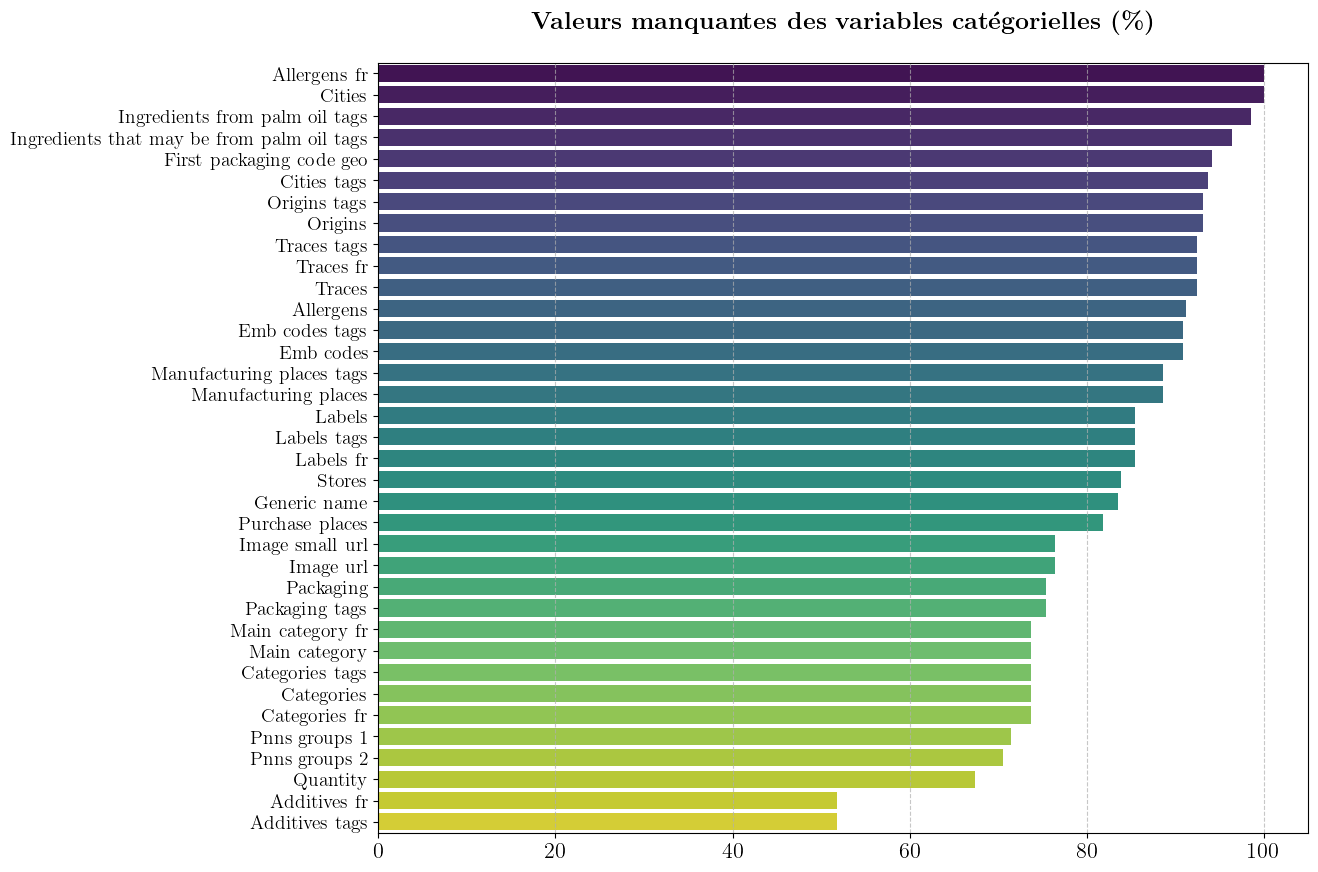

In [8]:
#Affichage des valeurs manquantes pour les features catégorielles > 0.5

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

# Données
missing_values = data[variables_cibles].isnull().mean().sort_values(ascending = False)
# Filtrer les valeurs avec des données manquantes > 50%
missing_values_50 = missing_values[missing_values > 0.5]
# Multiplier les valeurs par 100 pour les afficher de 0 à 100
missing_values_scaled = missing_values_50.values * 100

# Création du graphique avec Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x=missing_values_scaled, y=missing_values_50.index.str.replace('_', ' ').str.capitalize(), palette='viridis')
plt.title('\\textbf{{Valeurs manquantes des variables catégorielles (\%)}}', fontsize = 18, pad = 25)
plt.xlabel('')
plt.ylabel('')
plt.xticks()
plt.yticks(fontsize = 14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.savefig(f"barplot_missingvalues_cibles.pdf", bbox_inches='tight')
plt.show()

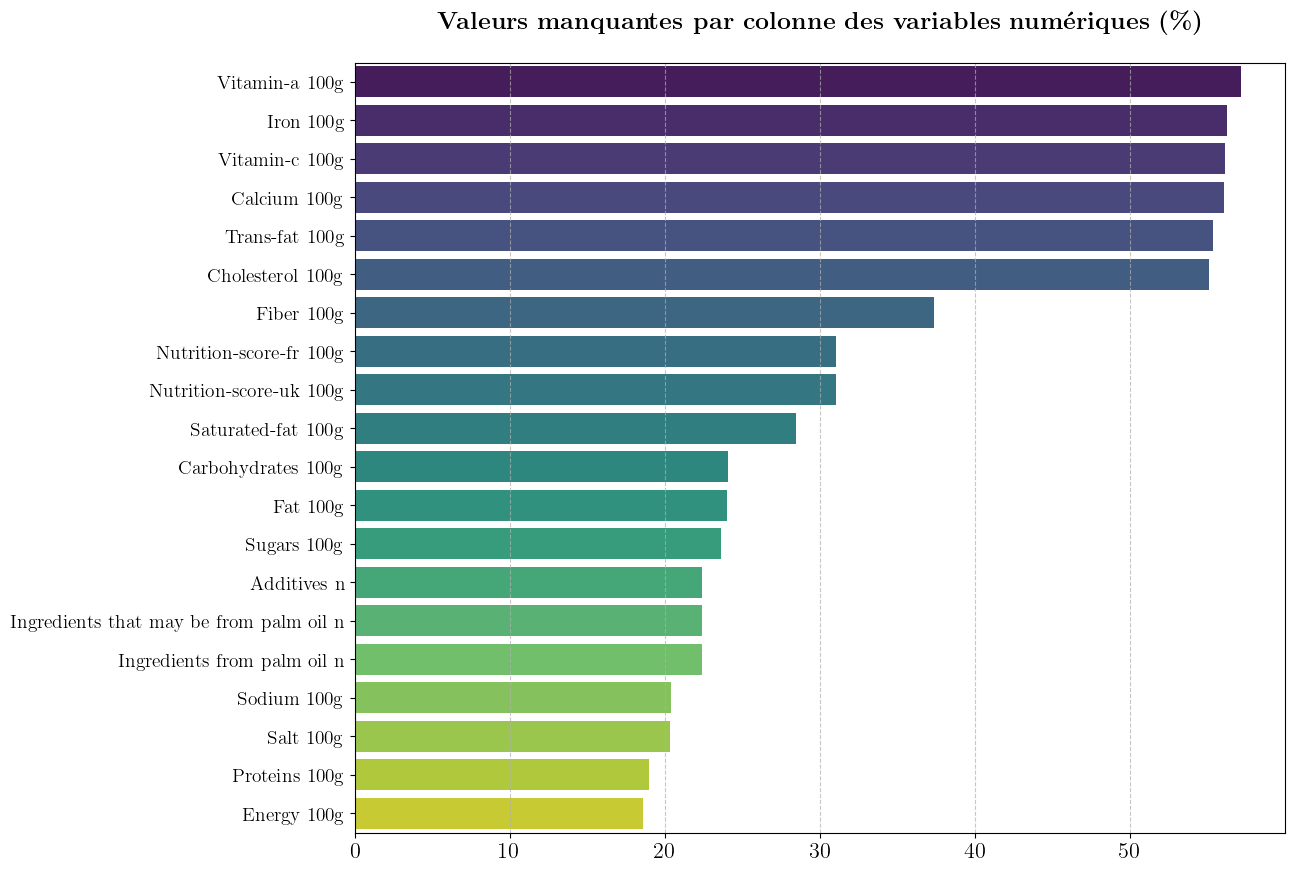

In [9]:
#Affichage des valeurs manquantes pour les features numériques < 90%

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

# Données
missing_values = data[features].isnull().mean().sort_values(ascending = False)
# Filtrer les valeurs avec des données manquantes < 80%
missing_values_50 = missing_values[missing_values < 0.9]
# Multiplier les valeurs par 100 pour les afficher de 0 à 100
missing_values_scaled = missing_values_50.values * 100

# Création du graphique avec Seaborn
plt.figure(figsize=(12, 10))
sns.barplot(x=missing_values_scaled, y=missing_values_50.index.str.replace('_', ' ').str.capitalize(), palette='viridis')
plt.title('\\textbf{{Valeurs manquantes par colonne des variables numériques (\%)}}', fontsize = 18, pad = 25)
plt.xlabel('')
plt.ylabel('')
plt.xticks()
plt.yticks(fontsize = 14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
#plt.savefig(f"barplot_missingvalues_features.pdf", bbox_inches='tight')
plt.show()

In [10]:
#Ici, on supprime les colonnes de type float (indicateurs numériques) trop peu remplis. On supprime les colonnes dont le taux de valeurs manquantes est > 80%

for feature in features:
    if data[feature].isna().mean() > 0.8:
        data.drop(columns = [feature], inplace = True)

features = data.describe().columns.tolist()

***
## 2. Sélection des données
***

### 2.1 Choix de la variable cible
***

In [11]:
df_cible = data[variables_cibles]

In [12]:
#On ne conserve que les colonnes dont le taux de remplissage est compris entre 0.5 et 0.8. La variable cible doit avoir un taux de remplissage > 50%.
#Cependant, s'il est trop élevé, il ne nous restera pas suffisemment de données pour que le projet soit pertinent.

colonnes_drop = df_cible.isna().mean()[(df_cible.isna().mean() < 0.5) | (df_cible.isna().mean() > 0.8)].index
df_cible = df_cible.drop(columns = colonnes_drop)

df_cible.isna().mean()

additives_fr        0.517788
additives_tags      0.517788
categories          0.736854
categories_fr       0.736850
categories_tags     0.736919
image_small_url     0.763583
image_url           0.763583
main_category       0.736991
main_category_fr    0.736991
packaging           0.753844
packaging_tags      0.753841
pnns_groups_1       0.714710
pnns_groups_2       0.705426
quantity            0.673229
dtype: float64

In [13]:
#Un modèle de machine learning sera beaucoup plus efficace sur un nombre de valeurs uniques + faibles. On choisit une limite à 100 ce qui n'en laissera que 2.

for colonne in df_cible.columns:
    if df_cible[colonne].unique().shape[0] > 100:
        df_cible.drop(columns = [colonne], inplace = True)

df_cible.columns

Index(['pnns_groups_1', 'pnns_groups_2'], dtype='object')

In [14]:
#On affiche les valeurs uniques pour chaque variable cible potentielle afin de détecter d'éventuels redondances. On pourra ensuite les corriger.

print('*' *40)
for colonne in df_cible.columns:
    print(f"Valeurs uniques pour {colonne.replace('_',' ').capitalize()} : \n")
    print(f"{df_cible[colonne].unique().tolist()} \n")
    print('*' * 40)

****************************************
Valeurs uniques pour Pnns groups 1 : 

[nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks', 'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs', 'Beverages', 'Fat and sauces', 'fruits-and-vegetables', 'Milk and dairy products', 'Salty snacks', 'sugary-snacks', 'cereals-and-potatoes', 'salty-snacks'] 

****************************************
Valeurs uniques pour Pnns groups 2 : 

[nan, 'unknown', 'Vegetables', 'Biscuits and cakes', 'Bread', 'Legumes', 'Pizza pies and quiche', 'Meat', 'Sweets', 'Non-sugared beverages', 'Sweetened beverages', 'Dressings and sauces', 'One-dish meals', 'vegetables', 'Soups', 'Chocolate products', 'Alcoholic beverages', 'Fruits', 'Sandwich', 'Cereals', 'Milk and yogurt', 'Fats', 'Cheese', 'Appetizers', 'Nuts', 'Breakfast cereals', 'Artificially sweetened beverages', 'Fruit juices', 'Eggs', 'Fish and seafood', 'Dried fruits', 'Ice cream', 'Processed meat', 'Potatoes', 'Dairy desserts', 'Fruit nectars', '

In [15]:
#Correction des redondances. Exemple : 'Cereals and potatoes' & 'cereals-and-potatoes'

data.loc[data['pnns_groups_1'] == 'unknown', 'pnns_groups_1'] = np.nan
data.loc[~data['pnns_groups_1'].isna(), 'pnns_groups_1'] = data['pnns_groups_1'].str.replace('-', ' ')
data.loc[~data['pnns_groups_1'].isna(), 'pnns_groups_1'] = data['pnns_groups_1'].str.capitalize()

data.loc[data['pnns_groups_2'] == 'unknown', 'pnns_groups_2'] = np.nan
data.loc[~data['pnns_groups_2'].isna(), 'pnns_groups_2'] = data['pnns_groups_2'].str.replace('-', ' ')
data.loc[~data['pnns_groups_2'].isna(), 'pnns_groups_2'] = data['pnns_groups_2'].str.capitalize()

In [16]:
#On va maintenant créer un data_choix afin de sélectionner au mieux notre variable cible, en fonction du nombre de lignes restantes, du nombre de valeurs uniques pour la variable cible.
#On prendra également en compte le taux de remplissage des features pour chaque variable cible.

cols = ['code', 'product_name', 'quantity']

In [17]:
#On crée un data pour chaque variable cible potentielle. data_variable contient les features + la variable cible et uniquement les lignes pour lesquelles la variable cible est renseignée.

for colonne in df_cible.columns:
    data_colonne = data.loc[~data[colonne].isna(), cols + [colonne] + features]
    globals()[f"data_{colonne}"] = data_colonne

In [18]:
#Création des colonnes et de l'index de notre data_choix

columns = ['NB_LIGNES', 'TAUX_LIGNE', 'NB_VU']
liste_index = [f"data_{colonne}" for colonne in df_cible.columns] 

In [19]:
#Création de notre data_choix

data_choix = pd.DataFrame()
data_choix['DATA'] = liste_index

taux_lignes = []
shapes = []
nb_val_uniques = []

for colonne in df_cible.columns:
    data_colonne = globals()[f"data_{colonne}"]
    
    shape = data_colonne.shape[0]
    taux = data_colonne[features].notnull().mean(axis = 1).mean().round(2)
    nb_vu = data_colonne[colonne].unique().shape[0]
    
    taux_lignes.append(taux)
    shapes.append(shape)
    nb_val_uniques.append(nb_vu)
    
data_choix['NB_LIGNES'] = shapes
data_choix['TAUX_LIGNES'] = taux_lignes
data_choix['NB_VU'] = nb_val_uniques

data_choix

DATA  NB_LIGNES  TAUX_LIGNES  NB_VU
0  data_pnns_groups_1      68889         0.54      9
1  data_pnns_groups_2      71867         0.52     36

In [20]:
#On choisit la variable cible qui a le moins valeurs uniques, le taux de remplissage le plus élevé et le nombre de lignes le plus élevé.

print('*' *40)
print(data_choix.sort_values(by = 'TAUX_LIGNES', ascending = False).iloc[0,:])
print('*' * 40)
print(data_choix.sort_values(by = 'NB_LIGNES', ascending = False).iloc[0,:])
print('*' *40)
print(data_choix.sort_values(by = 'NB_VU', ascending = True).iloc[0,:])
print('*' *40)

****************************************
DATA           data_pnns_groups_1
NB_LIGNES                   68889
TAUX_LIGNES                  0.54
NB_VU                           9
Name: 0, dtype: object
****************************************
DATA           data_pnns_groups_2
NB_LIGNES                   71867
TAUX_LIGNES                  0.52
NB_VU                          36
Name: 1, dtype: object
****************************************
DATA           data_pnns_groups_1
NB_LIGNES                   68889
TAUX_LIGNES                  0.54
NB_VU                           9
Name: 0, dtype: object
****************************************


In [21]:
#On isole notre variable cible de notre data

data_pnns_1 = data_pnns_groups_1[['code', 'pnns_groups_1']]

In [22]:
#On ne conserve que les lignes pour lesquelles 'pnns_groups_1' est renseignée. On ne conserve que les features sélectionnées et les colonnes utiles ('code', 'product_name', 'quantity') 

data = data.loc[~data['pnns_groups_1'].isna(),:]

In [23]:
data['pnns_groups_1'].value_counts(normalize = True)

pnns_groups_1
Sugary snacks              0.186735
Beverages                  0.131124
Milk and dairy products    0.128105
Cereals and potatoes       0.122777
Fish meat eggs             0.116724
Fruits and vegetables      0.100089
Composite foods            0.097940
Fat and sauces             0.075716
Salty snacks               0.040790
Name: proportion, dtype: float64

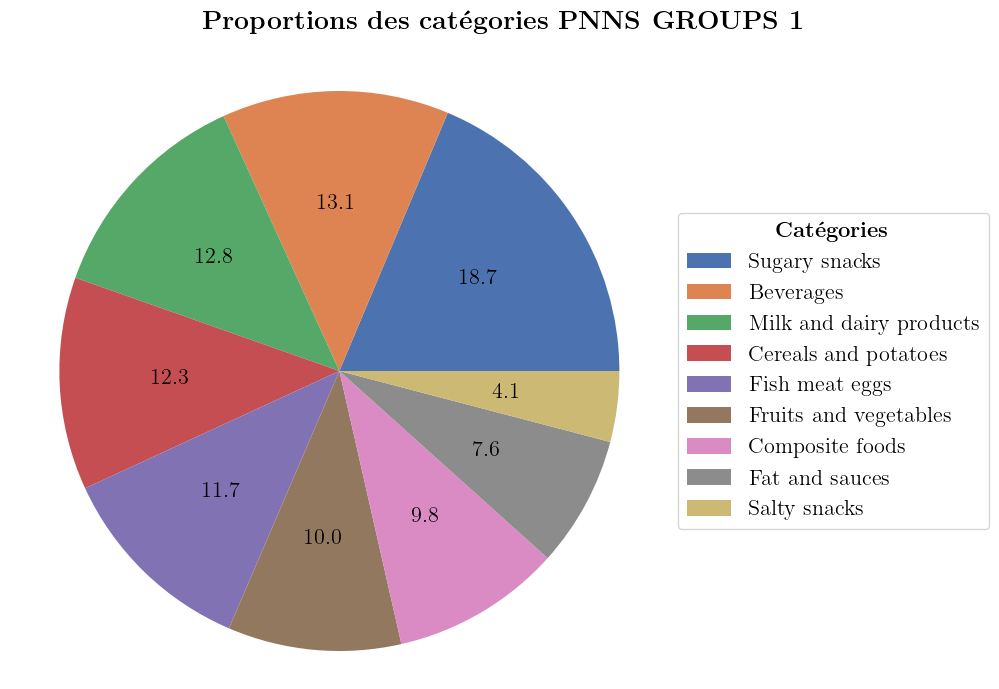

In [24]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)
plt.figure(figsize = (8.5,8))

palette = sns.color_palette('deep')
proportions = data['pnns_groups_1'].value_counts(normalize = True).sort_values(ascending = False)

wedges, texts, autotexts = plt.pie(proportions, labels = None, autopct='%1.1f%%', colors = palette)

plt.legend(wedges, proportions.index, title = '\\textbf{{Catégories}}', loc = 'center', bbox_to_anchor = (1,0,0.5,1))
plt.title('\\textbf{{Proportions des catégories PNNS GROUPS 1}}', pad = 25)
plt.gca().title.set_position([0.75, 1.05])

plt.axis('equal')
#plt.savefig(f"pieplot_pnns1.pdf", bbox_inches='tight')
plt.show()

### 2.2 Sélection des variables numériques
***

In [25]:
data = data[cols + features]

In [26]:
data.isna().mean().sort_values(ascending = False)

trans-fat_100g                             0.981898
cholesterol_100g                           0.979881
vitamin-a_100g                             0.979213
iron_100g                                  0.971737
vitamin-c_100g                             0.968195
calcium_100g                               0.950210
fiber_100g                                 0.518457
nutrition-score-uk_100g                    0.265529
nutrition-score-fr_100g                    0.265529
saturated-fat_100g                         0.250258
sugars_100g                                0.247311
sodium_100g                                0.245104
salt_100g                                  0.245032
carbohydrates_100g                         0.241258
fat_100g                                   0.235292
proteins_100g                              0.208103
energy_100g                                0.201179
ingredients_that_may_be_from_palm_oil_n    0.160461
ingredients_from_palm_oil_n                0.160461
additives_n 

In [27]:
#On va retrier nos features et supprimer celles qui ont un taux de valeur manquantes > 0.9

for feature in features:
    if data[feature].isna().mean() > 0.9:
        data.drop(columns = [feature], inplace = True)

In [28]:
#En regardant comment est calculé le nutriscore, on réalise que les colonnes 'additives_n', 'ingredients_from_palm_oil_n' sont inutiles. On va donc les supprimer.

for feature in features[0:3]:
    data.drop(columns = [feature], inplace = True)

data.head()

code                    product_name  quantity  energy_100g  \
174  0000000290616                    Salade Cesar  0.980 kg       1210.0   
175  0000000394710  Danoises à la cannelle roulées  1.150 kg       1520.0   
177  0000001071894                           Flute       NaN          NaN   
180  0000001938067    Chaussons tressés aux pommes  1.200 kg       1090.0   
182  0000005200016               lentilles vertes      1 kg           NaN   

     fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  \
174      12.0                 7.0                23.0          0.0   
175      14.4                 NaN                54.1         28.1   
177       NaN                 NaN                 NaN          NaN   
180      10.7                 2.0                38.7         24.7   
182       NaN                 NaN                 NaN          NaN   

     fiber_100g  proteins_100g  salt_100g  sodium_100g  \
174        2.00          22.00      2.160        0.850   
175        2.05           4.79      0.922        0.363   
177         NaN            NaN        NaN          NaN   
180        2.00           3.33      0.647        0.255   
182         NaN            NaN        NaN          NaN   

     nutrition-score-fr_100g  nutrition-score-uk_100g  
174                      6.0                      6.0  
175                      NaN                      NaN  
177                      NaN                      NaN  
180                      9.0                      9.0  
182                      NaN                      NaN

In [29]:
data.describe().columns.shape[0]

11

In [30]:
features = data.describe().columns

lignes_suppr = data[features].isna().all(axis = 1)

print('Nombre de lignes à supprimer :', data[lignes_suppr].shape[0], 'sur', data.shape[0])                    

Nombre de lignes à supprimer : 13022 sur 68889


In [31]:
# Pour ne pas polluer nos données, on supprime les lignes non remplies

data = data[~lignes_suppr]

In [32]:
(data.isna().mean() * 100).round(2)

code                        0.00
product_name                0.49
quantity                    4.14
energy_100g                 1.50
fat_100g                    5.70
saturated-fat_100g          7.55
carbohydrates_100g          6.44
sugars_100g                 7.19
fiber_100g                 40.62
proteins_100g               2.35
salt_100g                   6.91
sodium_100g                 6.91
nutrition-score-fr_100g     9.43
nutrition-score-uk_100g     9.43
dtype: float64

In [33]:
### Pour des questions de praticité et de confort d'affichage on va renommer les colonnes nutrition-score-fr_100g et nutrition-score-uk_100g

data.rename(columns = {'nutrition-score-fr_100g' : 'ns-fr_100g', 'nutrition-score-uk_100g' : 'ns-uk_100g'}, inplace = True)

***
## 3. Nettoyage des données
***

### 3.1 Réglage des valeurs aberrantes
***

In [34]:
#On met en mémoire la colonne quantité associé au code produit

memoire_quantity = data[['code','quantity']]

In [35]:
#Afin de créer 2 sous dataframes afin de séparer la nourriture et les boissons, on va filtrer sur le contenu de la colonne quantity (unité) 
#ainsi que sur le nom du produit

data['quantity'] = data['quantity'].str.replace(' ', '')
data['quantity'] = data['quantity'].str.lower()
data['quantity'] = data['quantity'].fillna('')

In [36]:
cond_1 = (data['quantity'].str.contains('[0-9]m?l|[0-9]c?l|floz')) & (~data['quantity'].str.contains('[0-9]g')) & (~data['product_name'].str.contains('sauce|Sauce').fillna(False))
cond_2 = data['product_name'].str.contains('Perrier-soda|drink')
cond_3 = (data['product_name'].str.contains('juice|boisson')) & (~data['quantity'].str.contains('[a-z]'))

masque = cond_1 | cond_2 | cond_3

In [37]:
data_food = data[~masque]
data_drink = data[masque]

In [38]:
data_food = pd.merge(data_food, memoire_quantity, on = 'code', how = 'left')
data_food['quantity_x'] = data_food['quantity_y']
data_food.drop(columns = ['quantity_y'], inplace = True)
data_food.rename(columns = {'quantity_x' : 'quantity'}, inplace = True)

data_drink = pd.merge(data_drink, memoire_quantity, on = 'code', how = 'left')
data_drink['quantity_x'] = data_drink['quantity_y']
data_drink.drop(columns = ['quantity_y'], inplace = True)
data_drink.rename(columns = {'quantity_x' : 'quantity'}, inplace = True)

In [39]:
a,b = data_food.shape
c,d = data_drink.shape

print('Nourriture :', a,'lignes et', b,'colonnes')
print('Boissons :', c,'lignes et', d,'colonnes')

Nourriture : 48068 lignes et 14 colonnes
Boissons : 7799 lignes et 14 colonnes


In [40]:
#On détermine les bornes de l'IQR

iqr_energy_food = np.nanquantile(data_food['energy_100g'], q=[0.25, 0.75])
iqr_energy_drink = np.nanquantile(data_drink['energy_100g'], q=[0.25, 0.75])

lim_basse_food = iqr_energy_food[0] - 1.5*(iqr_energy_food[1] - iqr_energy_food[0])
lim_haute_food = iqr_energy_food[1] + 1.5*(iqr_energy_food[1] - iqr_energy_food[0])

lim_basse_drink = iqr_energy_drink[0] - 1.5*(iqr_energy_drink[1] - iqr_energy_drink[0])
lim_haute_drink = iqr_energy_drink[1] + 1.5*(iqr_energy_drink[1] - iqr_energy_drink[0])

print(f"IQR : Pour la nourriture : entre {lim_basse_food} et {lim_haute_food}")
print(f"IQR : Pour la boisson : entre {lim_basse_drink} et {lim_haute_drink}")

IQR : Pour la nourriture : entre -1328.5 et 3539.5
IQR : Pour la boisson : entre -50.0 et 494.0


In [41]:
#On considère que le maximum en énergie pour 100g pour un produit est 4000kj pour la nourriture, et 1200kj pour les boissons.

data_food.loc[data_food['energy_100g'] > 4000, 'energy_100g'] = np.nan
data_drink.loc[data_drink['energy_100g'] > 1200, 'energy_100g'] = np.nan

In [42]:
data_food.loc[data_food['energy_100g'] > lim_haute_food, :]

code                             product_name  \
563    0051500239131          Crisco All-Vegetable Shortening   
1291   0411015621416                       extra virgin cocos   
1520   0859702003099                             Lemon Ginger   
1768   2000000014970                                Coconpure   
2281        20022082                        Frites & Fritures   
...              ...                                      ...   
42536  7617300720809                           Beurre à rôtir   
44610  8410179009391               Hulle d'olive vierge extra   
45850  8437005613140                                      Oro   
46904  8710472001741                        Saindoux pur porc   
47530  8719153009892  Huile de coco inodore - BioWise - 400 g   

                         quantity  energy_100g  fat_100g  saturated-fat_100g  \
563                         16 oz       3830.0     100.0                29.2   
1291   100% raw, bio, 0% gluten n       3768.0     100.0                92.1   
1520                        397 g       3740.0     100.0                78.6   
1768                        460 g       3760.0     100.0                 NaN   
2281             4 * 250 g (1 kg)       3700.0     100.0               100.0   
...                           ...          ...       ...                 ...   
42536                       450 g       3690.0      99.8                59.9   
44610                         NaN       3766.0     100.0                16.0   
45850                         NaN       3700.0     100.0                13.0   
46904                       500 g       3700.0     100.0                45.0   
47530                       400 g       3766.0     100.0                86.0   

       carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  \
563                   0.0          NaN         NaN            0.0        0.0   
1291                  0.0          0.0         0.0            0.0        0.0   
1520                  0.0          0.0         NaN            0.0        NaN   
1768                  0.0          0.0         0.0            0.0        0.0   
2281                  0.0          0.0         NaN            0.0        0.0   
...                   ...          ...         ...            ...        ...   
42536                 0.1          0.1         0.0            0.1        0.0   
44610                 0.0          0.0         0.0            0.0        0.0   
45850                 0.0          0.0         0.0            0.0        0.0   
46904                 0.0          0.0         0.0            0.0        0.0   
47530                 0.0          0.0         0.0            0.0        0.0   

       sodium_100g  ns-fr_100g  ns-uk_100g  
563            0.0         NaN         NaN  
1291           0.0        15.0        15.0  
1520           NaN         NaN         NaN  
1768           0.0         NaN         NaN  
2281           0.0        20.0        20.0  
...            ...         ...         ...  
42536          0.0        19.0        20.0  
44610          0.0        12.0        20.0  
45850          0.0        11.0        20.0  
46904          0.0        16.0        20.0  
47530          0.0        15.0        15.0  

[71 rows x 14 columns]

In [43]:
data_drink.loc[data_drink['energy_100g'] > lim_haute_drink, :]

code                         product_name  \
20    0016229001919                         Lait de coco   
22    0016229006099                         Lait de coco   
36    0020735420959            Dutch Chocolate Ice Cream   
38    0021000026494       Miracle Whip Dressing Original   
41    0021000642731    Thousand Island Dressing Fat Free   
...             ...                                  ...   
7645  8886303870838             Lait de coco UHT CLASSIC   
7718  9100000716572                   Veganes Nougat-Eis   
7740  9310016801609  Streets Blue Ribbon Classic Vanilla   
7789  9556041608251                         Lait de Coco   
7798       96092521    Santa Cruz Chilli & Lime Dressing   

                               quantity  energy_100g  fat_100g  \
20                               400 ml        774.0       NaN   
22                                165ml        746.0      19.0   
36                             48 FL OZ        952.0      10.6   
38    1 pt 14 fl. oz (30 fl. oz) 887 mL       1110.0      23.3   
41                             16 fl oz        565.0       0.0   
...                                 ...          ...       ...   
7645                             200 ml        724.0      17.6   
7718                             480 ml        775.0       5.6   
7740                            2 Litre        787.0       7.1   
7789                             200 ml        862.0      20.0   
7798                              250ml        660.0       6.9   

      saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
20                 17.00                 NaN         2.00        0.00   
22                 17.00                 2.0         2.00         NaN   
36                  6.82                28.8        21.20        1.52   
38                  3.33                13.3         6.67        0.00   
41                  0.00                29.7        16.20        0.00   
...                  ...                 ...          ...         ...   
7645               15.70                 2.1         1.80        0.20   
7718                1.50                31.0        22.00        1.10   
7740                5.10                27.3        19.00         NaN   
7789               18.00                 3.4         2.70        0.50   
7798                0.50                23.1        16.70        0.60   

      proteins_100g  salt_100g  sodium_100g  ns-fr_100g  ns-uk_100g  
20             1.60   0.050000     0.019685        12.0        12.0  
22             1.60   0.050000     0.019685        12.0        12.0  
36             3.03   0.212000     0.083300        10.0        10.0  
38             0.00   1.690000     0.667000        14.0        14.0  
41             0.00   1.780000     0.703000        11.0        11.0  
...             ...        ...          ...         ...         ...  
7645           1.60   0.019558     0.007700        12.0        12.0  
7718           2.00   0.070000     0.027559         5.0         5.0  
7740           3.40   0.127000     0.050000        11.0        11.0  
7789           2.10   0.050038     0.019700        12.0        12.0  
7798           0.30   0.541020     0.213000         6.0         6.0  

[509 rows x 14 columns]

In [44]:
data_food.describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  47432.000000  45536.000000        44630.000000        45026.000000   
mean    1176.617474     14.142417            5.911109           30.147725   
std      742.543354     16.069940            8.662888           27.985839   
min        0.000000      0.000000            0.000000            0.000000   
25%      497.000000      1.900000            0.400000            4.000000   
50%     1118.000000      8.100000            2.300000           18.200000   
75%     1712.000000     23.000000            8.500000           56.700000   
max     4000.000000    380.000000          210.000000          190.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  44686.000000  28924.000000   47136.000000  44768.000000  44764.000000   
mean      13.698112      3.058868       8.504126      0.977468      0.384862   
std       19.271207      4.100463       7.340239      2.731750      1.075430   
min       -0.100000      0.000000       0.000000      0.000000      0.000000   
25%        1.000000      0.500000       3.100000      0.100000      0.039370   
50%        3.700000      2.000000       6.700000      0.660400      0.260000   
75%       20.000000      3.900000      12.000000      1.300000      0.511811   
max      134.000000     94.800000      86.000000    297.600000    117.165354   

         ns-fr_100g    ns-uk_100g  
count  43737.000000  43737.000000  
mean       8.538057      8.664563  
std        9.535330      9.828623  
min      -15.000000    -15.000000  
25%        1.000000      0.000000  
50%        9.000000      8.000000  
75%       16.000000     17.000000  
max       40.000000     35.000000

In [45]:
data_drink.describe()

energy_100g     fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  6576.000000  7144.000000         7019.000000         7243.000000   
mean    228.502491     9.790216            2.338836           10.176186   
std     204.616657    25.695896            6.810545           14.239516   
min       0.000000     0.000000            0.000000            0.000000   
25%     141.000000     0.000000            0.000000            4.300000   
50%     188.000000     0.200000            0.100000            7.800000   
75%     226.000000     2.100000            1.000000           11.000000   
max    1200.000000   101.000000           99.000000          105.000000   

       sugars_100g   fiber_100g  proteins_100g    salt_100g  sodium_100g  \
count  7166.000000  4249.000000    7417.000000  7241.000000  7240.000000   
mean      9.297779     0.422514       0.982534     0.267231     0.105222   
std      13.903034     0.792195       1.580452     1.863199     0.733591   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       2.500000     0.000000       0.000000     0.000000     0.000000   
50%       6.900000     0.100000       0.500000     0.025400     0.010000   
75%      10.500000     0.500000       1.000000     0.114300     0.045069   
max     105.000000    20.000000      26.000000    76.200000    30.000000   

        ns-fr_100g   ns-uk_100g  
count  6860.000000  6860.000000  
mean      7.049563     2.844898  
std       6.382304     6.702529  
min     -10.000000   -10.000000  
25%       1.000000    -1.000000  
50%       6.000000     1.000000  
75%      12.000000     2.000000  
max      30.000000    29.000000

In [46]:
for col in features[1:-2]:
    #On remplace les valeurs > 100 par une valeur manquante
    data_food.loc[data_food[col] > 100, col] = np.nan
    data_drink.loc[data_drink[col] > 100, col] = np.nan
    
    #On remplace les valeurs négatives par 0
    data_food.loc[data_food[col] < 0, col] = 0
    data_drink.loc[data_drink[col] < 0, col] = 0

In [47]:
data_food.describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  47432.000000  45534.000000        44629.000000        45022.000000   
mean    1176.617474     14.132387            5.906536           30.137720   
std      742.543354     15.972891            8.608947           27.965501   
min        0.000000      0.000000            0.000000            0.000000   
25%      497.000000      1.900000            0.400000            4.000000   
50%     1118.000000      8.100000            2.300000           18.200000   
75%     1712.000000     23.000000            8.500000           56.700000   
max     4000.000000    100.000000          100.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  44685.000000  28924.000000   47136.000000  44765.000000  44762.000000   
mean      13.695422      3.058868       8.504126      0.959987      0.379826   
std       19.263016      4.100463       7.340239      1.676744      0.767031   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        1.000000      0.500000       3.100000      0.100000      0.039370   
50%        3.700000      2.000000       6.700000      0.660400      0.260000   
75%       20.000000      3.900000      12.000000      1.300000      0.511811   
max      100.000000     94.800000      86.000000     88.900000     83.000000   

         ns-fr_100g    ns-uk_100g  
count  43737.000000  43737.000000  
mean       8.538057      8.664563  
std        9.535330      9.828623  
min      -15.000000    -15.000000  
25%        1.000000      0.000000  
50%        9.000000      8.000000  
75%       16.000000     17.000000  
max       40.000000     35.000000

In [48]:
data_drink.describe()

energy_100g     fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  6576.000000  7143.000000         7019.000000         7242.000000   
mean    228.502491     9.777447            2.338836           10.163092   
std     204.616657    25.675017            6.810545           14.196827   
min       0.000000     0.000000            0.000000            0.000000   
25%     141.000000     0.000000            0.000000            4.300000   
50%     188.000000     0.200000            0.100000            7.800000   
75%     226.000000     2.090000            1.000000           11.000000   
max    1200.000000   100.000000           99.000000          100.000000   

       sugars_100g   fiber_100g  proteins_100g    salt_100g  sodium_100g  \
count  7165.000000  4249.000000    7417.000000  7241.000000  7240.000000   
mean      9.284422     0.422514       0.982534     0.267231     0.105222   
std      13.857947     0.792195       1.580452     1.863199     0.733591   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       2.500000     0.000000       0.000000     0.000000     0.000000   
50%       6.900000     0.100000       0.500000     0.025400     0.010000   
75%      10.500000     0.500000       1.000000     0.114300     0.045069   
max     100.000000    20.000000      26.000000    76.200000    30.000000   

        ns-fr_100g   ns-uk_100g  
count  6860.000000  6860.000000  
mean      7.049563     2.844898  
std       6.382304     6.702529  
min     -10.000000   -10.000000  
25%       1.000000    -1.000000  
50%       6.000000     1.000000  
75%      12.000000     2.000000  
max      30.000000    29.000000

### 3.2 Cohérence des données
***

In [49]:
data_food.reset_index(drop = True, inplace = True)
data_drink.reset_index(drop = True, inplace = True)

In [50]:
#On ne peut pas avoir plus d'acides gras saturés que de graisses.
#idem pour les sucres et les glucides, ainsi que pour le sodium et le sel.

for index, row in data_food.iterrows():
    if row['saturated-fat_100g'] > row['fat_100g']:
        data_food.at[index, 'saturated-fat_100g'] = row['fat_100g']
    if row['sugars_100g'] > row['carbohydrates_100g']:
        data_food.at[index, 'sugars_100g'] = row['carbohydrates_100g']
    if row['sodium_100g'] > row['salt_100g']:
        data_food.at[index, 'sodium_100g'] = row['salt_100g']

In [51]:
#Même chose pour data_drink

for index, row in data_drink.iterrows():
    if row['saturated-fat_100g'] > row['fat_100g']:
        data_drink.at[index, 'saturated-fat_100g'] = row['fat_100g']
    if row['sugars_100g'] > row['carbohydrates_100g']:
        data_drink.at[index, 'sugars_100g'] = row['carbohydrates_100g']
    if row['sodium_100g'] > row['salt_100g']:
        data_drink.at[index, 'sodium_100g'] = row['salt_100g']

### 3.3 Réglage des valeurs manquantes
***

In [52]:
from matplotlib.ticker import ScalarFormatter
from scipy.spatial import distance

In [53]:
features = data.describe().columns

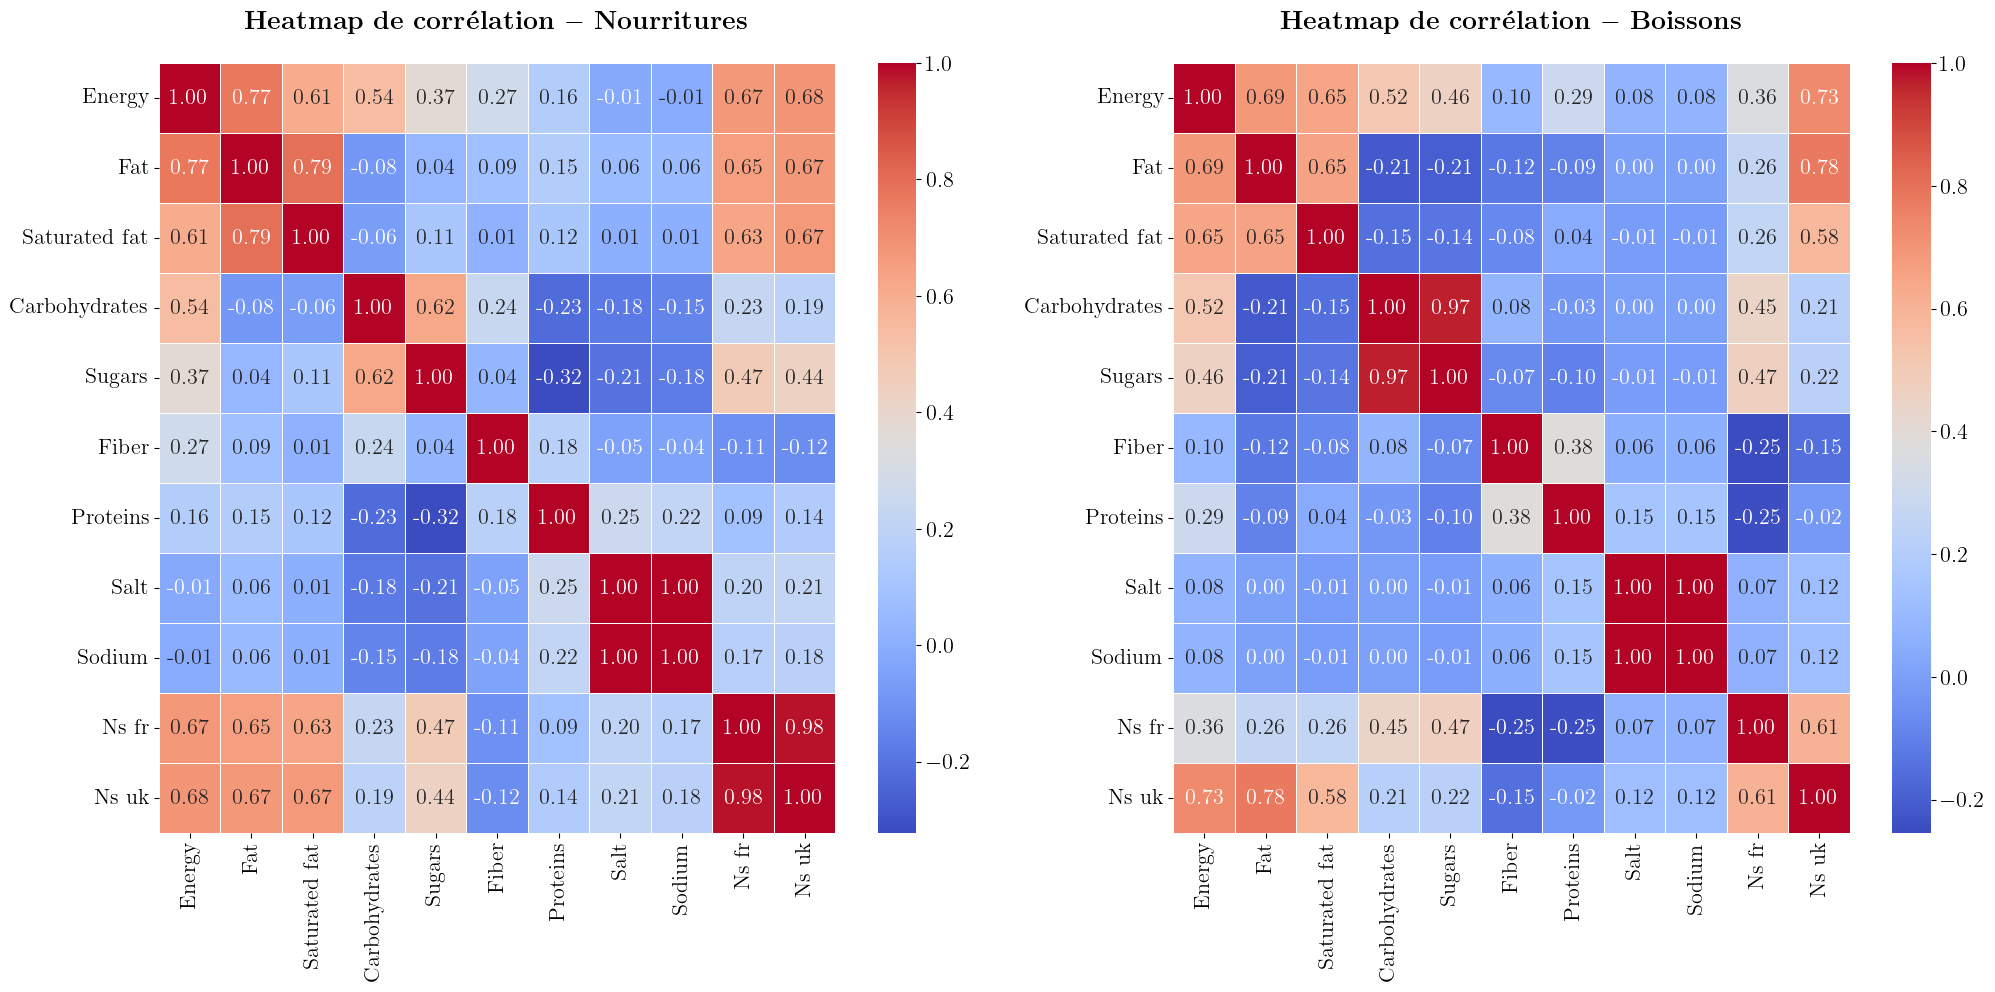

In [54]:
#On affiche la matrice de corrélation des features

fig, axes = plt.subplots(1,2, figsize = (24,10))

new_labels = features.str.replace('_100g', '')
new_labels = new_labels.str.replace('-', ' ')
new_labels = new_labels.str.capitalize()

heatmap_food = sns.heatmap(data_food[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax = axes[0])
heatmap_food.set_xticklabels(new_labels)
heatmap_food.set_yticklabels(new_labels)
heatmap_food.set_title(f"\\textbf{{Heatmap de corrélation $-$ Nourritures}}", pad = 25)

heatmap_drink = sns.heatmap(data_drink[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax = axes[1])
heatmap_drink.set_xticklabels(new_labels)
heatmap_drink.set_yticklabels(new_labels)
heatmap_drink.set_title(f"\\textbf{{Heatmap de corrélation $-$ Boissons}}", pad = 25)

#plt.savefig(f"heatmaps_food_drink_original.pdf", bbox_inches='tight')
plt.show()

In [55]:
#Pour différencier la méthode d'imputation (moyenne ou médiane), on crée un dataframe avec 2 colonnes contenant la moyenne des différences des corrélations entre données imputées (moyenne ou médiane)

data_corr_imputation_food = pd.DataFrame()
data_corr_imputation_food['FEATURES'] = features[:-2]

liste_corr_mean = []
liste_corr_median = []

for feature in features[:-2]:
    data = data_food[feature]
    data_mean = data.fillna(data.mean())
    data_median = data.fillna(data.median())
    
    somme_corr_mean = 0
    somme_corr_median = 0
    
    for colonne in features[:-2]:
        corr = abs(data.corr(data_food[colonne]))
        corr_mean = abs(data_mean.corr(data_food[colonne]))
        corr_median = abs(data_median.corr(data_food[colonne]))
        
        diff_mean = abs(corr_mean - corr)
        diff_median = abs(corr_median - corr)
        
        somme_corr_mean += diff_mean
        somme_corr_median += diff_median
    
    moyenne_corr_mean = round(somme_corr_mean / len(features[:-2]), 4)
    moyenne_corr_median = round(somme_corr_median / len(features[:-2]), 4)
    
    liste_corr_mean.append(moyenne_corr_mean)
    liste_corr_median.append(moyenne_corr_median)

data_corr_imputation_food['SCORE_MEAN'] = liste_corr_mean
data_corr_imputation_food['SCORE_MEDIAN'] = liste_corr_median

data_corr_imputation_food = data_corr_imputation_food.copy()
data_corr_imputation_food

FEATURES  SCORE_MEAN  SCORE_MEDIAN
0         energy_100g      0.0012        0.0013
1            fat_100g      0.0067        0.0062
2  saturated-fat_100g      0.0065        0.0072
3  carbohydrates_100g      0.0074        0.0090
4         sugars_100g      0.0055        0.0056
5          fiber_100g      0.0237        0.0256
6       proteins_100g      0.0009        0.0011
7           salt_100g      0.0177        0.0178
8         sodium_100g      0.0019        0.0019

Distribution des variables pour les nourritures
________________________________________________________________________________




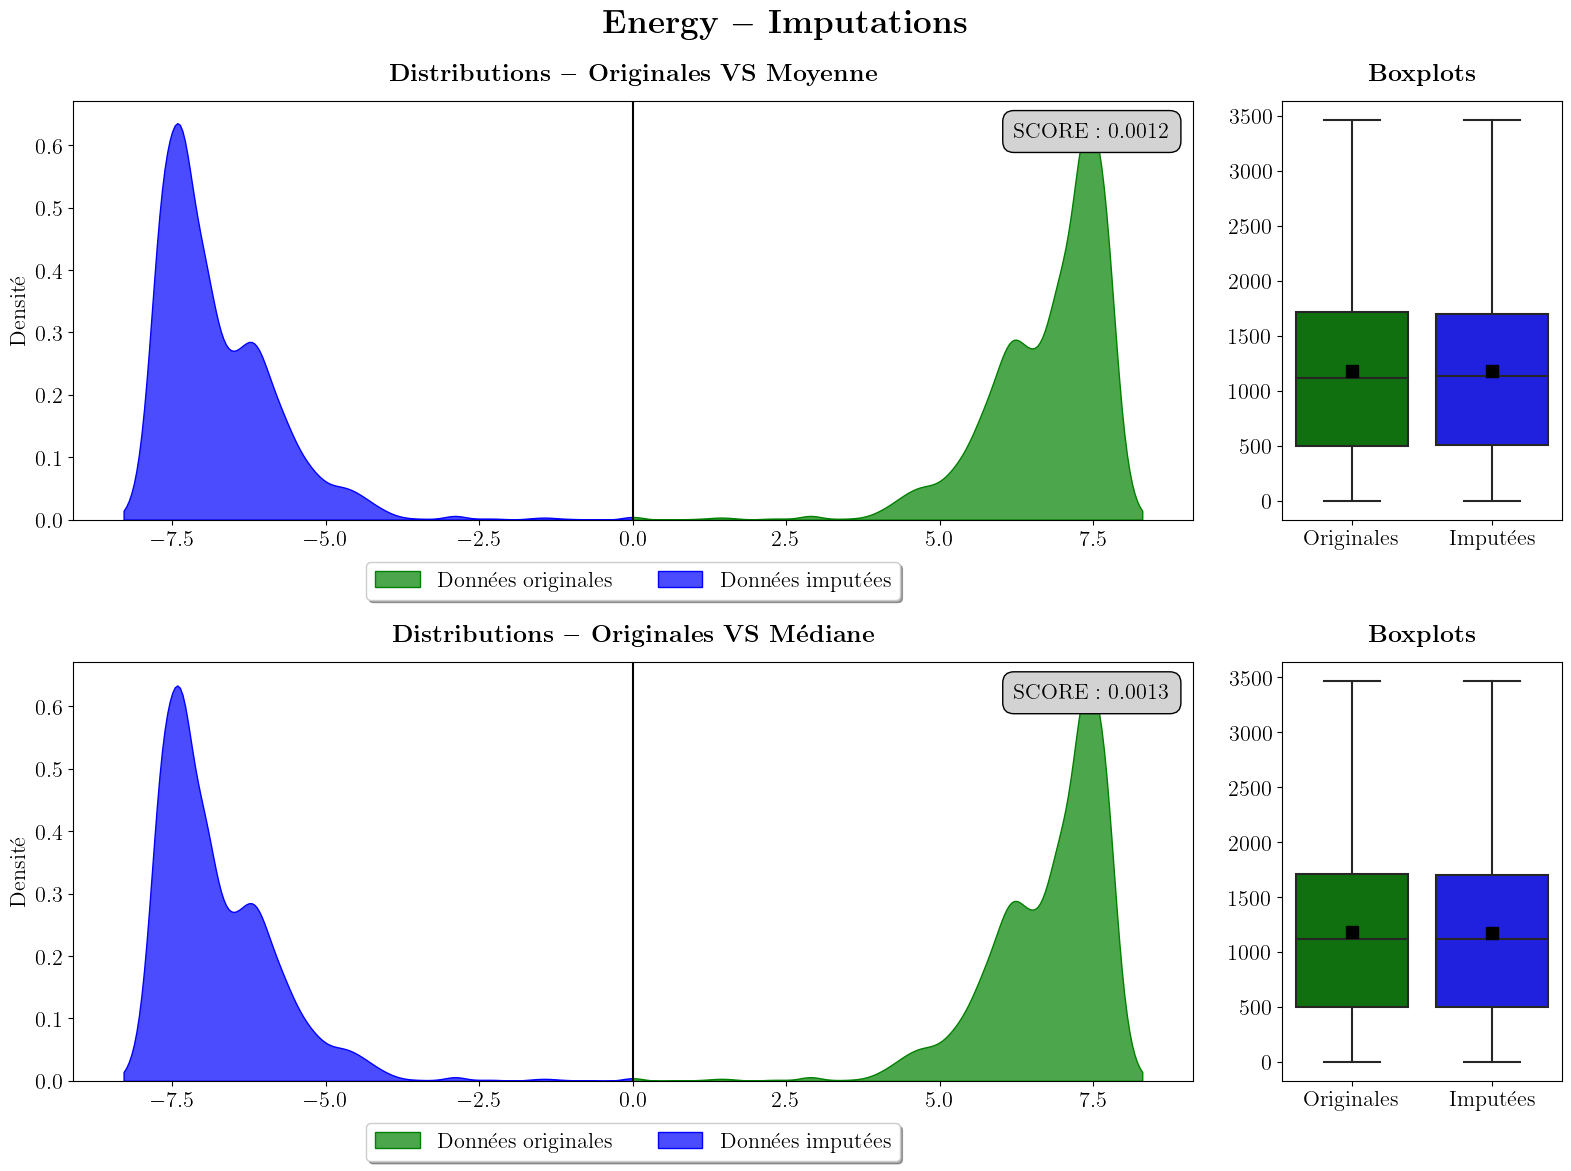



____________________________________________________________________________________________________________________________________________________________________________________




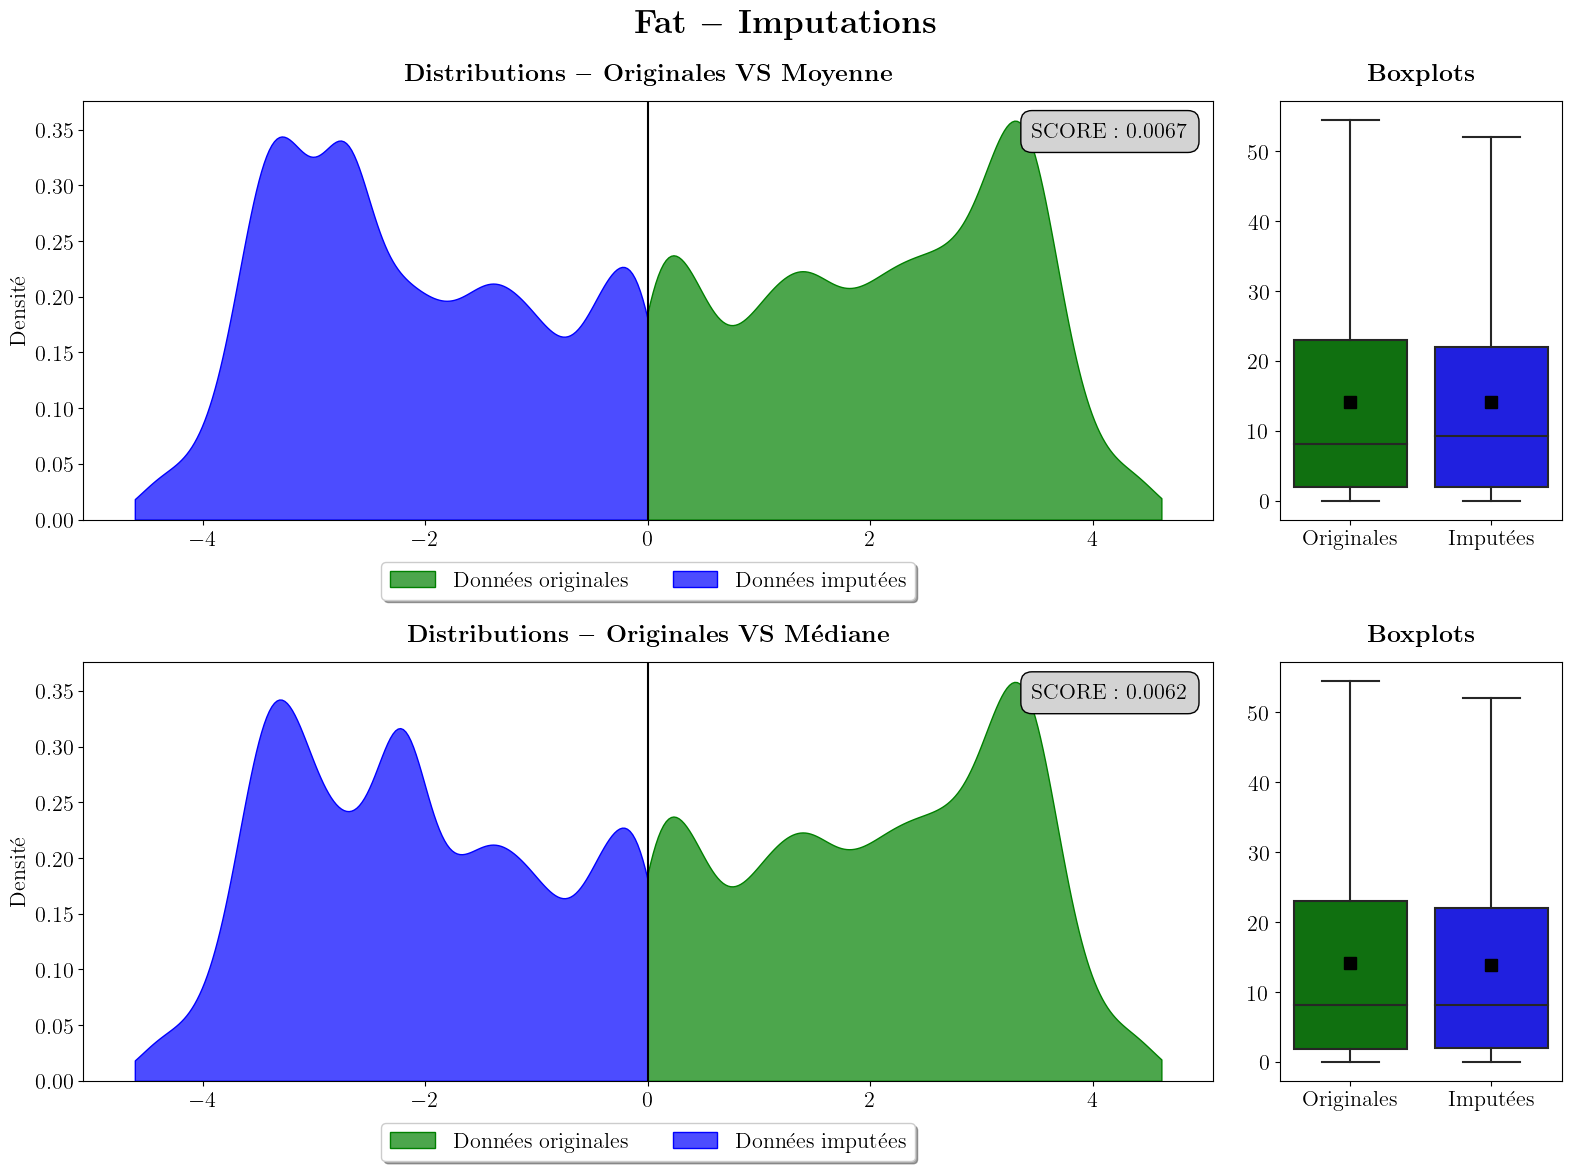



____________________________________________________________________________________________________________________________________________________________________________________




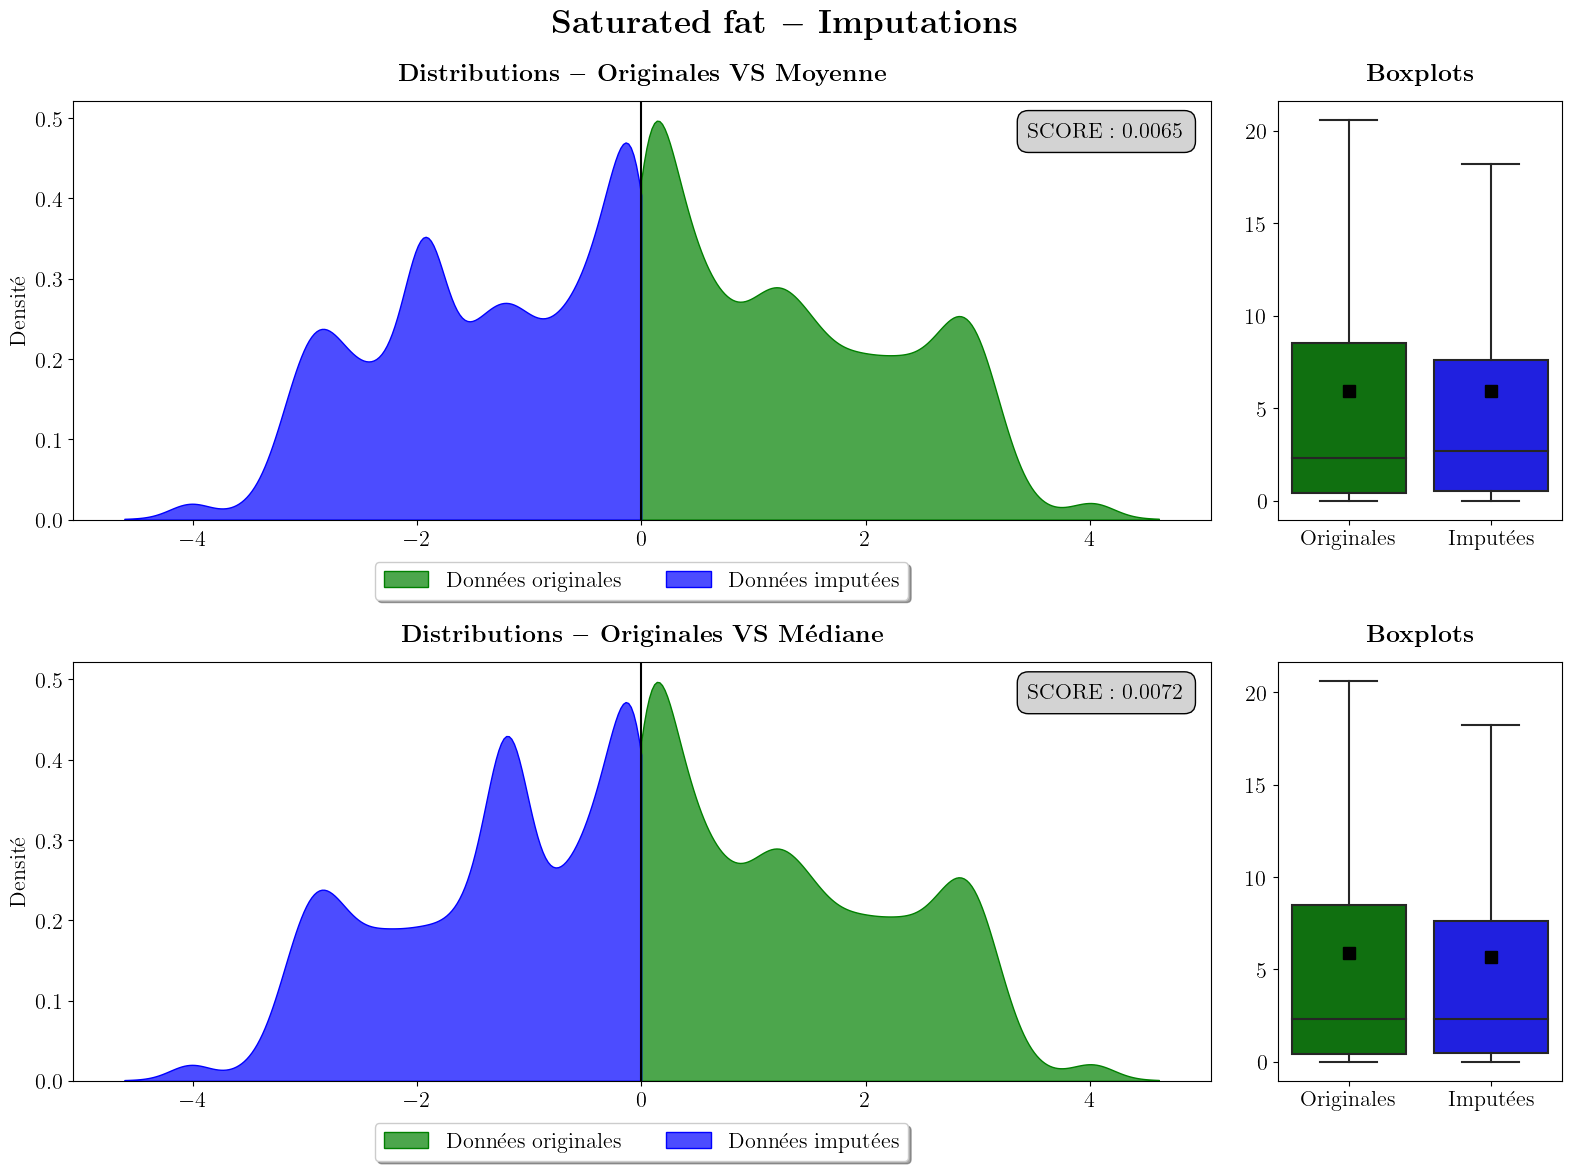



____________________________________________________________________________________________________________________________________________________________________________________




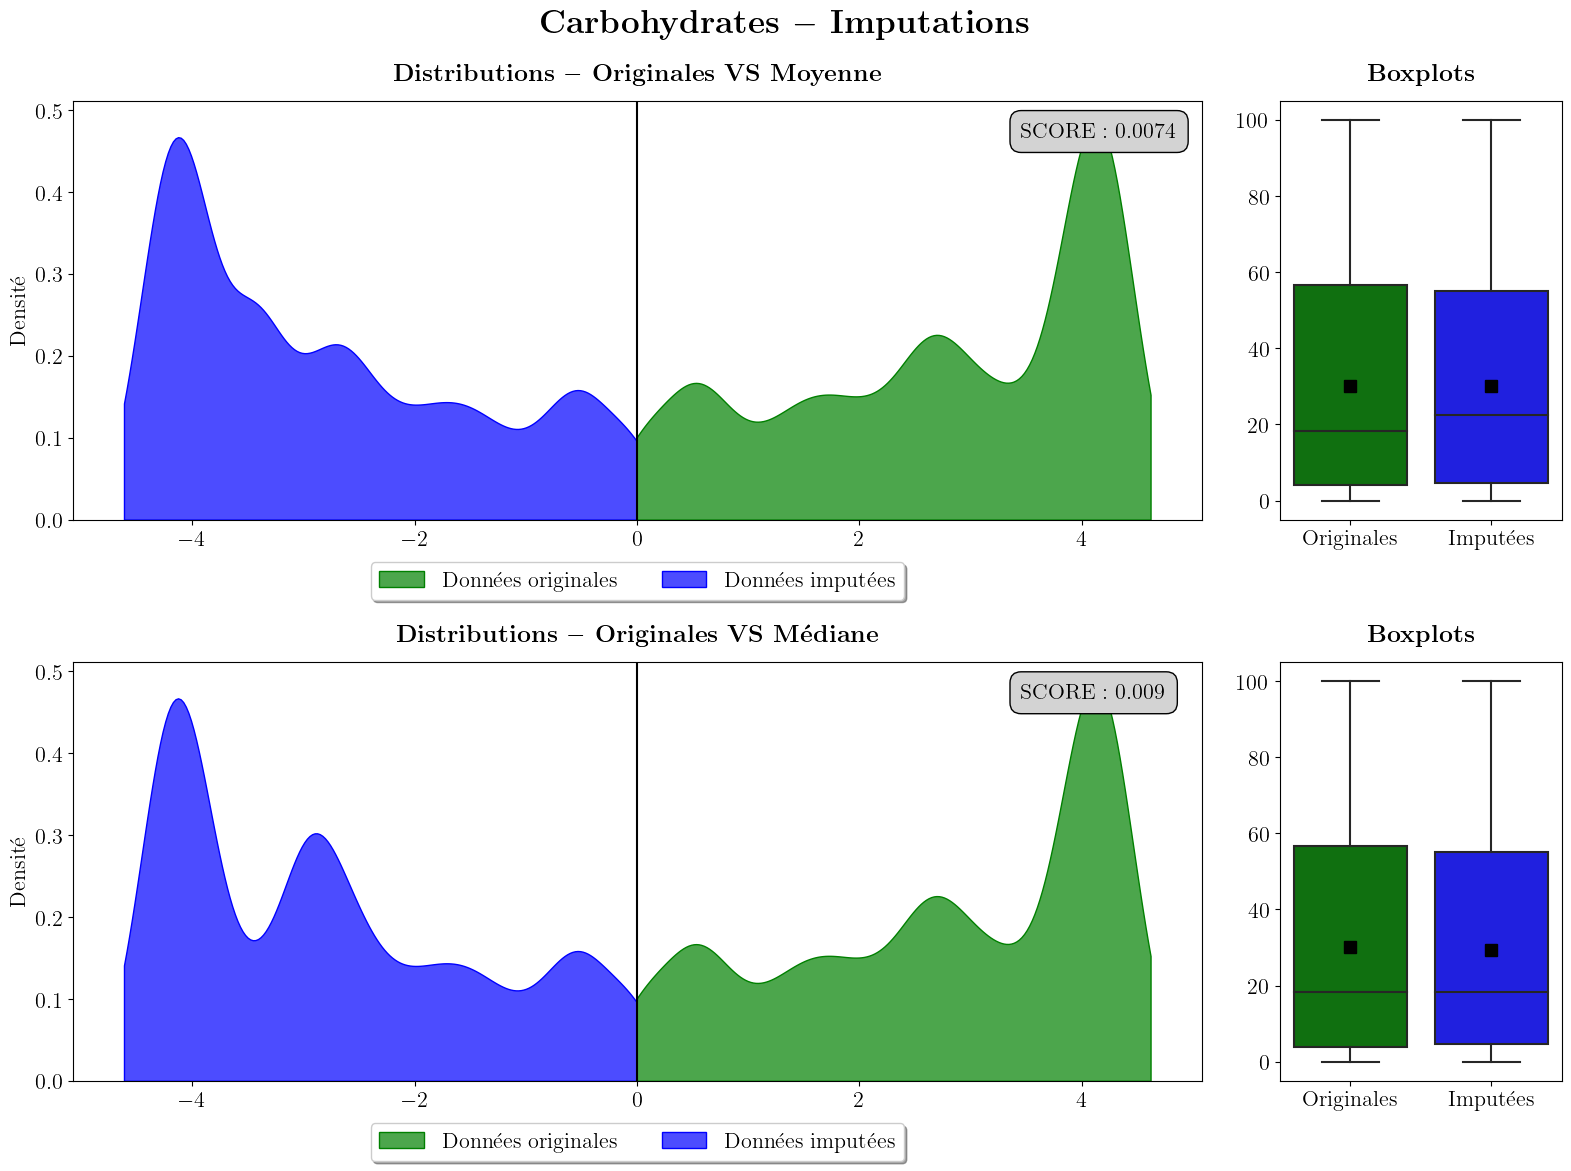



____________________________________________________________________________________________________________________________________________________________________________________




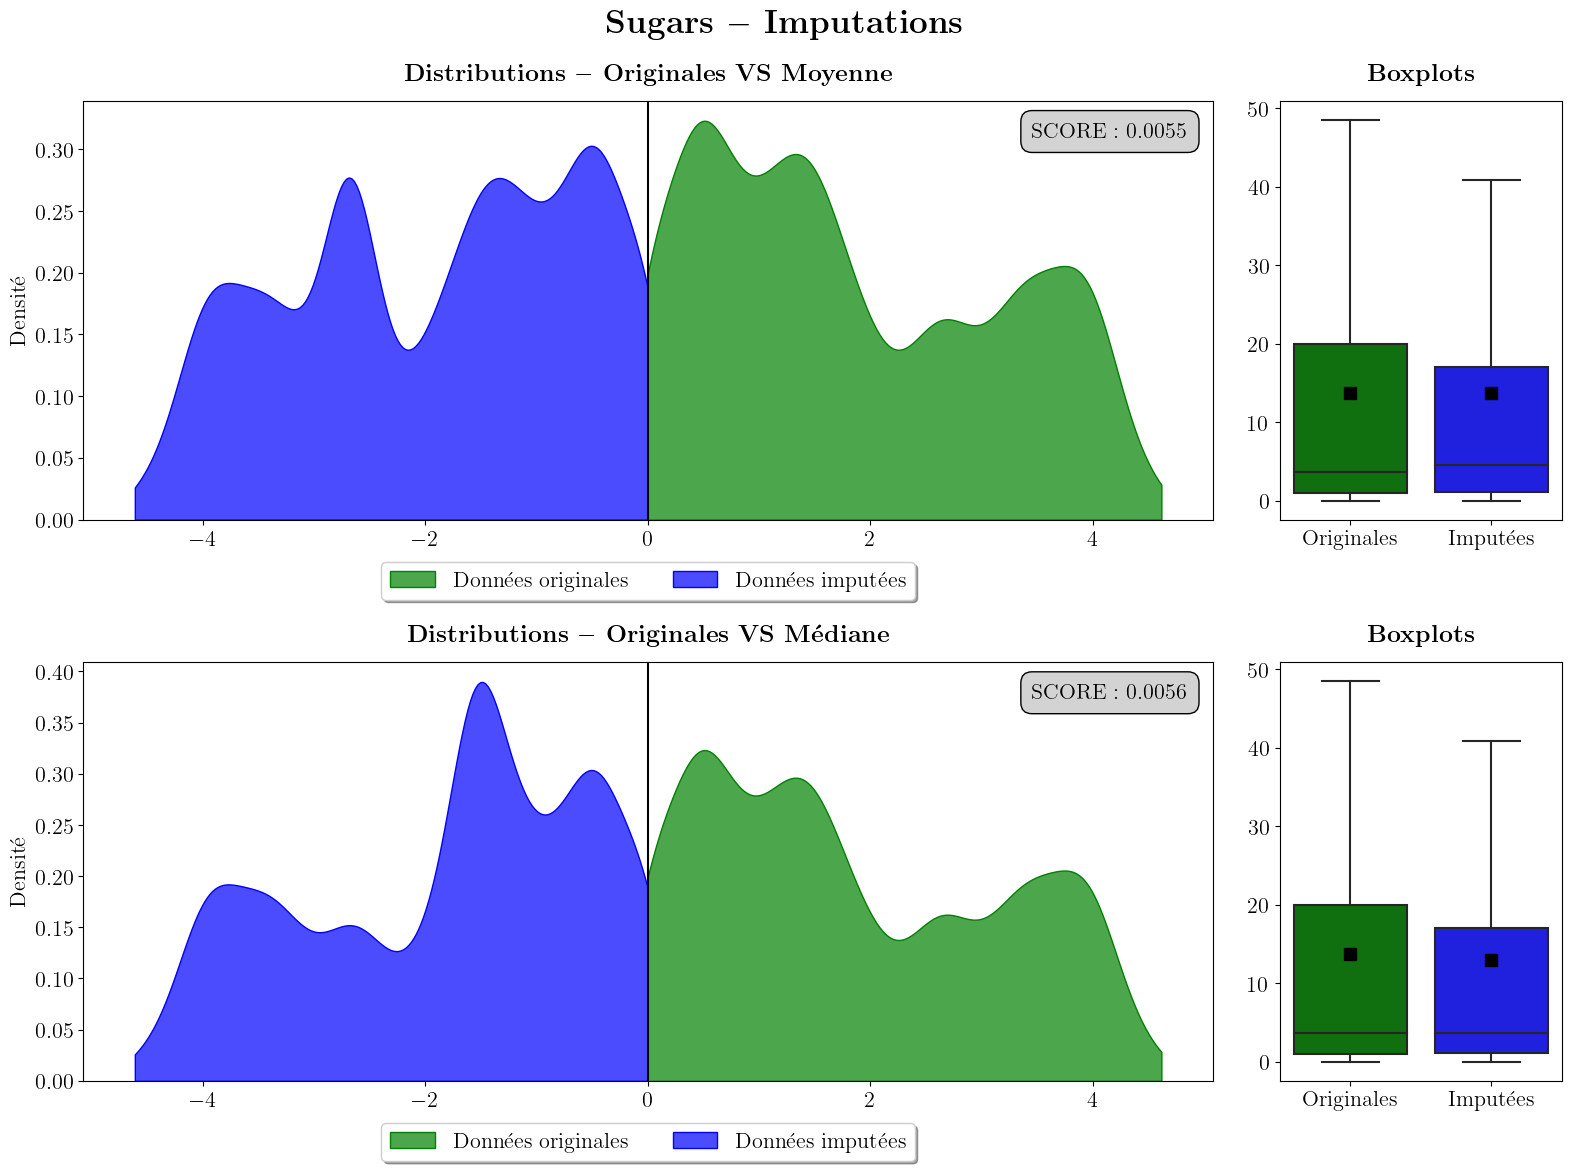



____________________________________________________________________________________________________________________________________________________________________________________




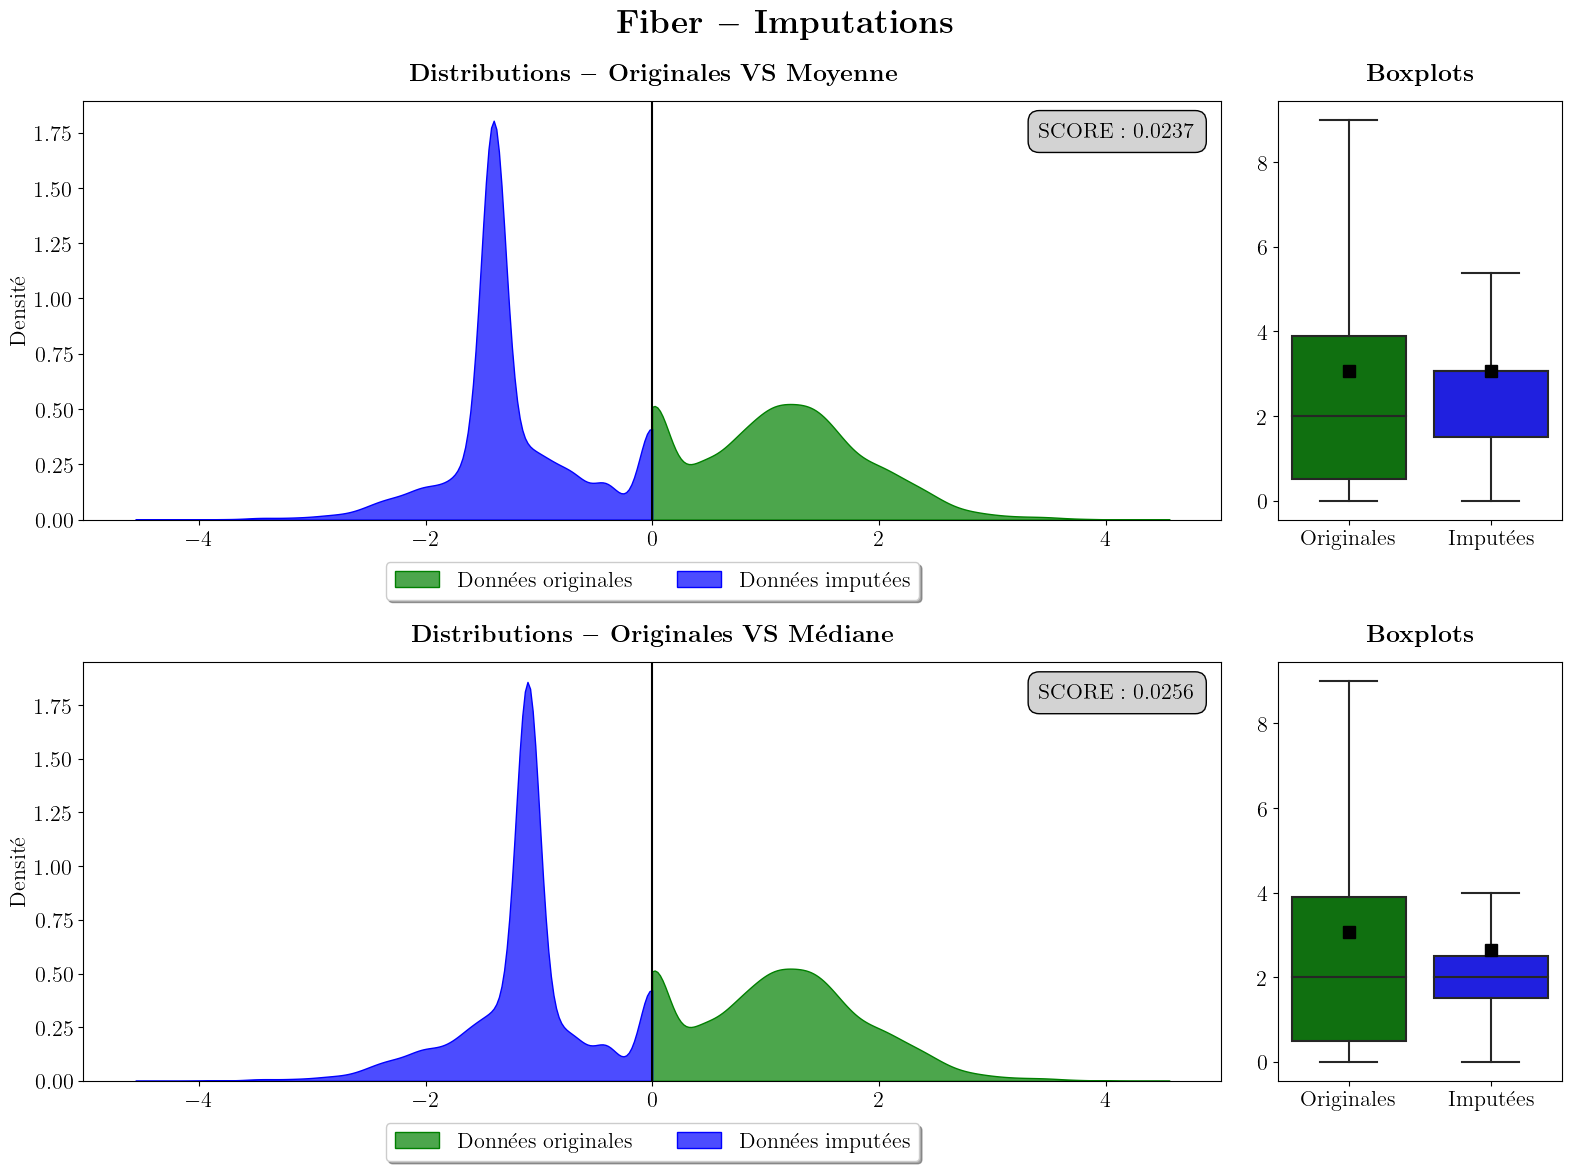



____________________________________________________________________________________________________________________________________________________________________________________




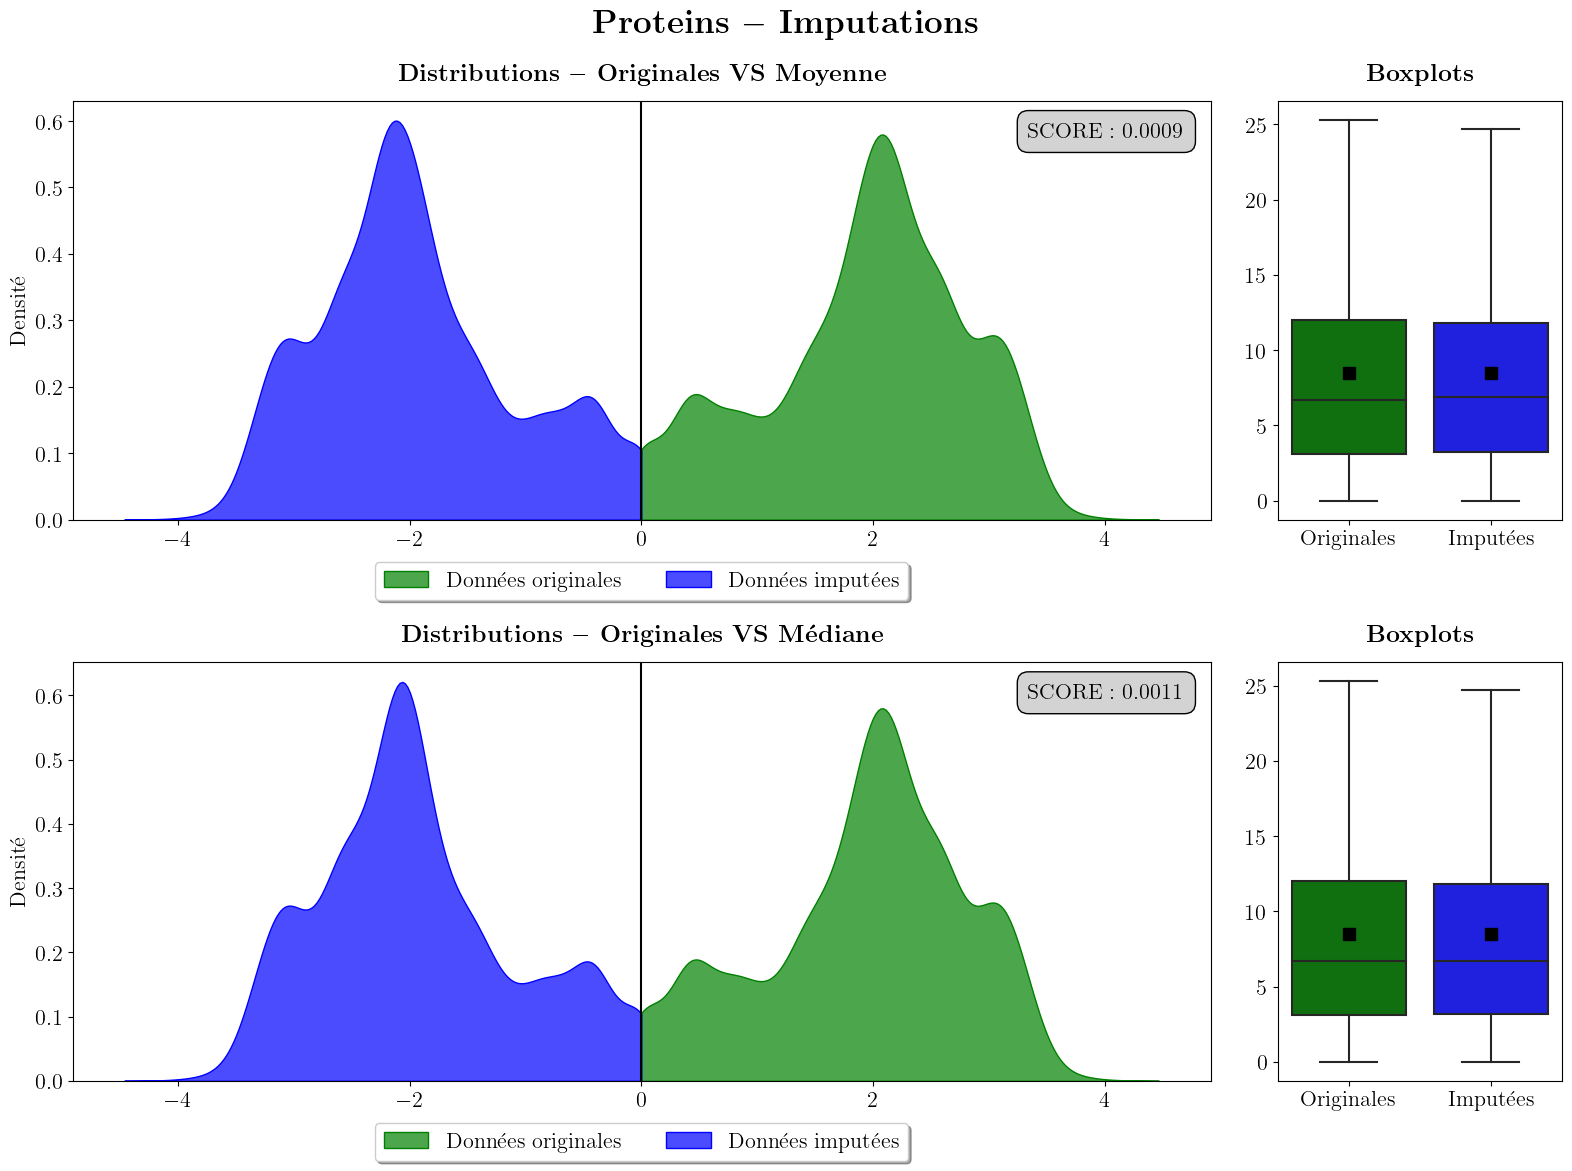



____________________________________________________________________________________________________________________________________________________________________________________




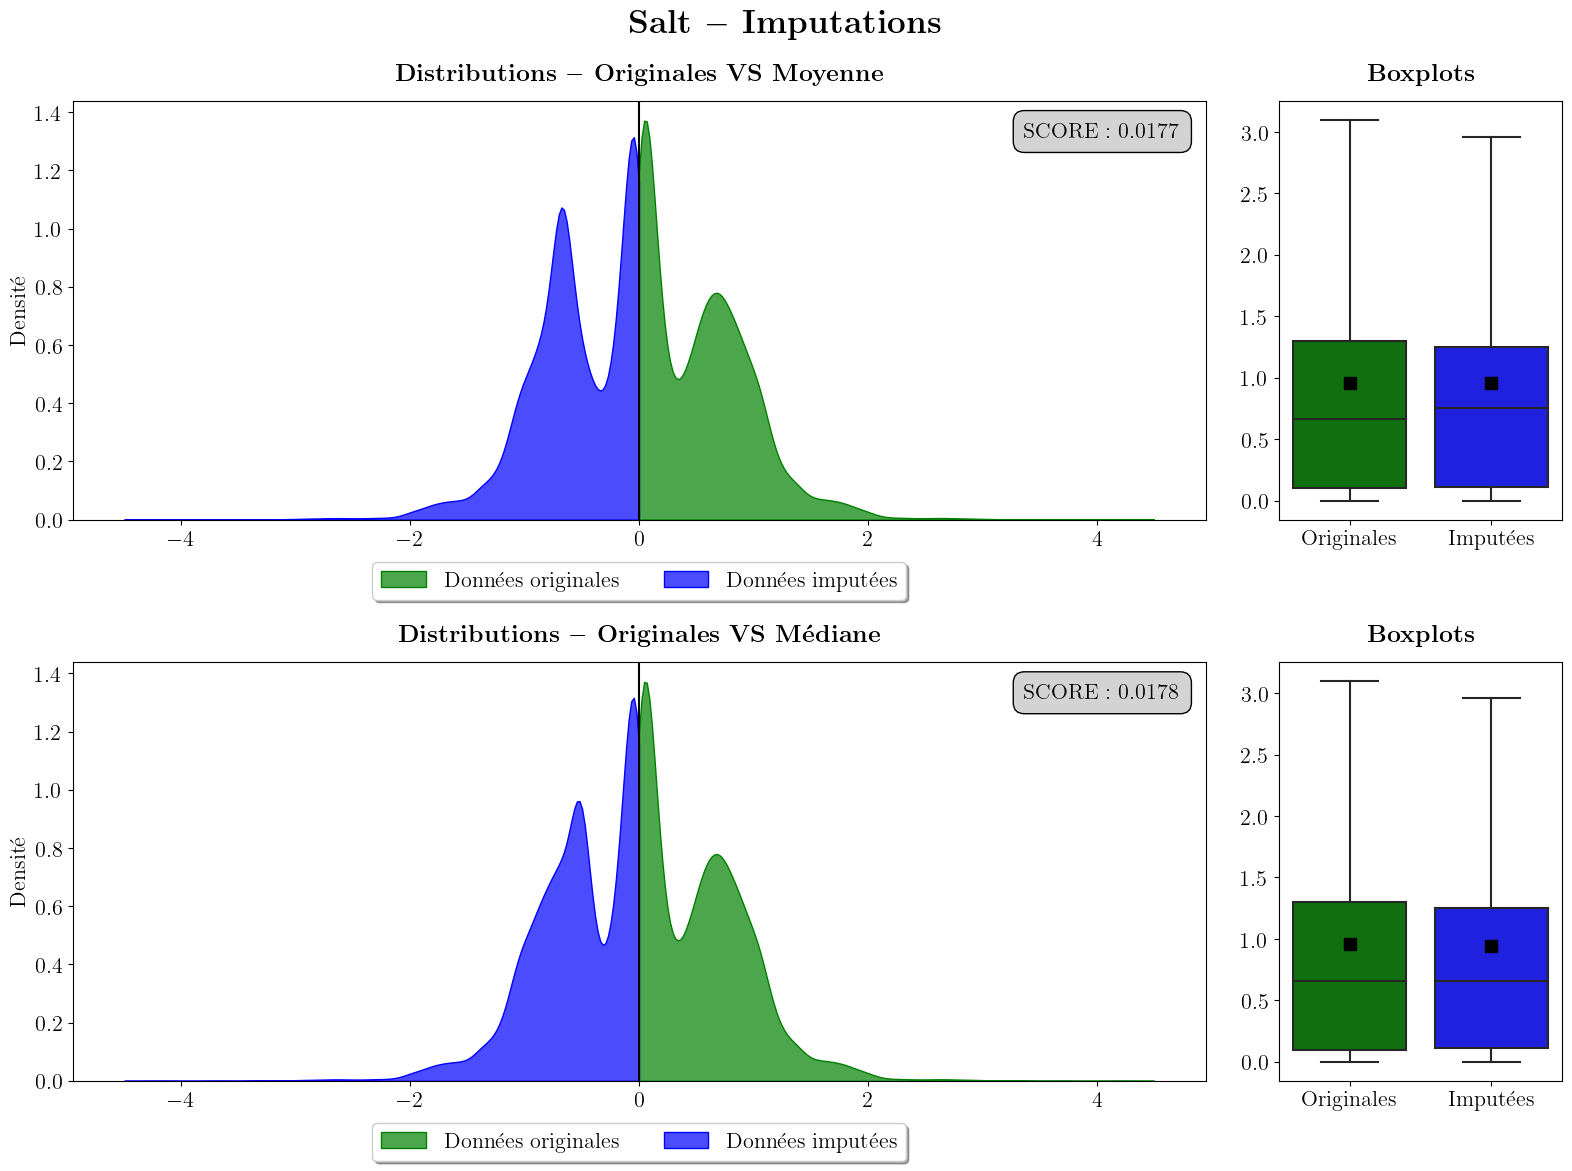



____________________________________________________________________________________________________________________________________________________________________________________




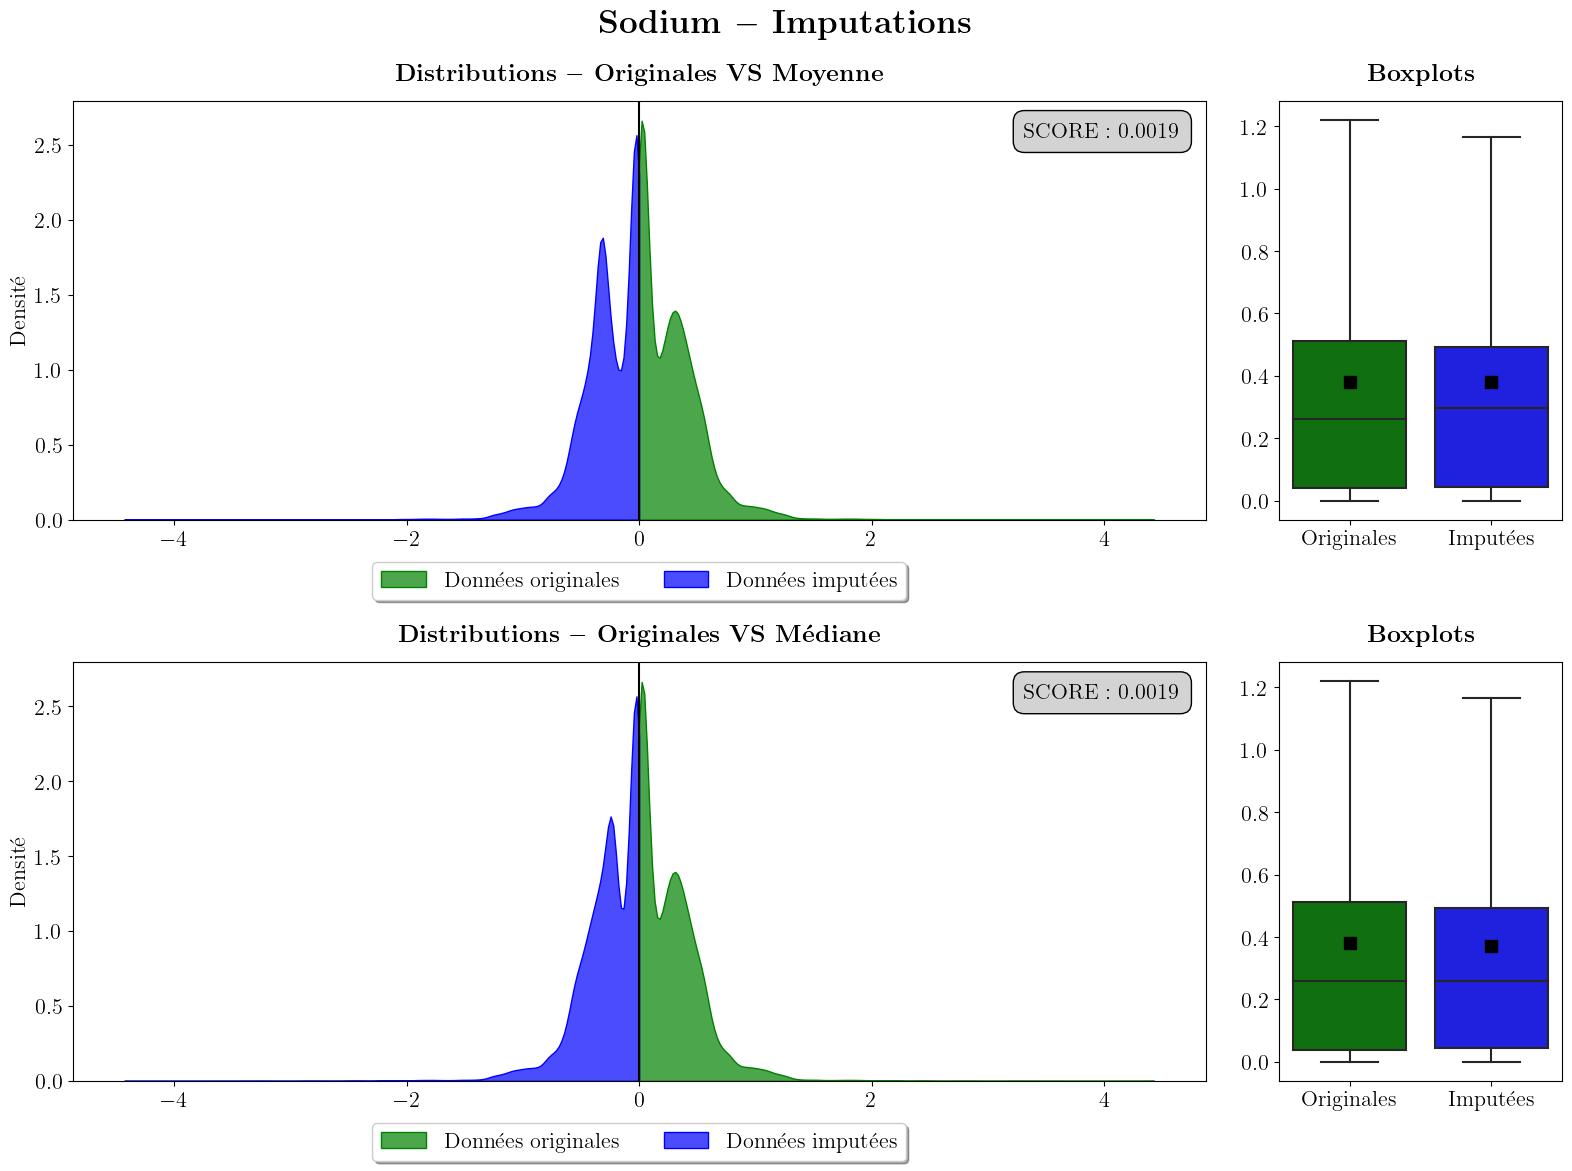



____________________________________________________________________________________________________________________________________________________________________________________




In [56]:
print(f"Distribution des variables pour les nourritures")
print('_'*80)
print('\n')
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)
#sns.set_style('white', {"grid":False})
palette = ['green', 'blue']
mean_marker_props = {'marker': 's', 'markerfacecolor': 'black', 'markeredgecolor': 'black', 'markersize': 8}

for i,col in enumerate(features[:-2]):
    fig, axes = plt.subplots(2,2, figsize = (16,12), gridspec_kw={'width_ratios':[4,1]})
    #fig, axes = plt.subplots(1,2, figsize = (20,6))
    data = data_food[col]
    data_original = (data + 1).apply(np.log)
    mean_imputed_data = data.fillna(data.mean())
    median_imputed_data = data.fillna(data.median())
    mean_mirrored_data = (mean_imputed_data + 1).apply(np.log)
    median_mirrored_data = (median_imputed_data + 1).apply(np.log)
    
    dict_type_mean = {'Originales' : data, 'Imputées' : mean_imputed_data}
    dict_type_median = {'Originales' : data, 'Imputées' : median_imputed_data}
    df_boxplot_food_mean = pd.DataFrame(dict_type_mean)
    df_boxplot_food_median = pd.DataFrame(dict_type_median)
    
    score_mean = data_corr_imputation_food.iloc[i, 1]
    score_median = data_corr_imputation_food.iloc[i, 2]
    
    title = col.replace('-', ' ').replace('_100g', '').capitalize()
    #plt.figure(figsize=(12,6))
    
    #Moyenne
    sns.kdeplot(data = data_original, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'green', cut = 0.01, label = 'Données originales', ax = axes[0,0])  
    sns.kdeplot(data = -mean_mirrored_data, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'blue', cut = -0.01, label = 'Données imputées', ax = axes[0,0])
    axes[0,0].axvline(x = 0, color = 'black', linestyle='-')
    axes[0,0].set_title(f"\\textbf{{Distributions $-$ Originales VS Moyenne}}", pad = 15, size = 18)  
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylabel('Densité')
    axes[0,0].text(0.68 * axes[0,0].get_xlim()[1],
                   0.95 * axes[0,0].get_ylim()[1],
                   f"SCORE : {score_mean}",
                   ha = 'left', va = 'top',
                   fontsize = 16,
                   bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    axes[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), shadow=True, ncol=2)
    
    sns.boxplot(data = df_boxplot_food_mean, showfliers = False, width = 0.8, palette = palette, ax = axes[0,1], showmeans = True, meanprops = mean_marker_props)
    axes[0,1].set_title(f"\\textbf{{Boxplots}}", pad = 15, size = 18)
    
    #Mediane
    sns.kdeplot(data = data_original, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'green', cut = 0.01, label = 'Données originales', ax = axes[1,0])  
    sns.kdeplot(data = -median_mirrored_data, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'blue', cut = -0.01, label = 'Données imputées', ax = axes[1,0])
    axes[1,0].axvline(x = 0, color = 'black', linestyle='-')
    axes[1,0].set_title(f"\\textbf{{Distributions $-$ Originales VS Médiane}}", pad = 15, size = 18)  
    axes[1,0].set_xlabel('')
    axes[1,0].set_ylabel('Densité')
    axes[1,0].text(0.68 * axes[1,0].get_xlim()[1],
                   0.95 * axes[1,0].get_ylim()[1],
                   f"SCORE : {score_median}",
                   ha = 'left', va = 'top',
                   fontsize = 16,
                   bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    axes[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), shadow=True, ncol=2)
    
    sns.boxplot(data = df_boxplot_food_median, showfliers = False, width = 0.8, palette = palette, ax = axes[1,1], showmeans = True, meanprops = mean_marker_props)
    axes[1,1].set_title(f"\\textbf{{Boxplots}}", pad = 15, size = 18)
    
    fig.suptitle(f"\\textbf{{{title} $-$ Imputations}}", fontsize = 24)
    plt.tight_layout()
    #plt.savefig(f"kde_food_{col}.pdf", bbox_inches='tight')
    plt.show()
    
    print('\n')
    print('_' * 180)
    print("\n")

In [57]:
#Idem avec les features pour data_drink

data_corr_imputation_drink = pd.DataFrame()
data_corr_imputation_drink['FEATURES'] = features[:-2]

liste_corr_mean = []
liste_corr_median = []

for feature in features[:-2]:
    data = data_drink[feature]
    data_mean = data.fillna(data.mean())
    data_median = data.fillna(data.median())
    
    somme_corr_mean = 0
    somme_corr_median = 0
    
    for colonne in features[:-2]:
        corr = abs(data.corr(data_drink[colonne]))
        corr_mean = abs(data_mean.corr(data_drink[colonne]))
        corr_median = abs(data_median.corr(data_drink[colonne]))
        
        diff_mean = abs(corr_mean - corr)
        diff_median = abs(corr_median - corr)
        
        somme_corr_mean += diff_mean
        somme_corr_median += diff_median
    
    moyenne_corr_mean = round(somme_corr_mean / len(features[:-2]), 4)
    moyenne_corr_median = round(somme_corr_median / len(features[:-2]), 4)
    
    liste_corr_mean.append(moyenne_corr_mean)
    liste_corr_median.append(moyenne_corr_median)

data_corr_imputation_drink['SCORE_MEAN'] = liste_corr_mean
data_corr_imputation_drink['SCORE_MEDIAN'] = liste_corr_median

data_corr_imputation_drink = data_corr_imputation_drink.copy()

In [58]:
data_corr_imputation_drink

FEATURES  SCORE_MEAN  SCORE_MEDIAN
0         energy_100g      0.1706        0.1850
1            fat_100g      0.0118        0.0081
2  saturated-fat_100g      0.0069        0.0047
3  carbohydrates_100g      0.0079        0.0081
4         sugars_100g      0.0081        0.0070
5          fiber_100g      0.0268        0.0250
6       proteins_100g      0.0034        0.0035
7           salt_100g      0.0010        0.0016
8         sodium_100g      0.0010        0.0016

Distribution des variables pour les boissons
________________________________________________________________________________




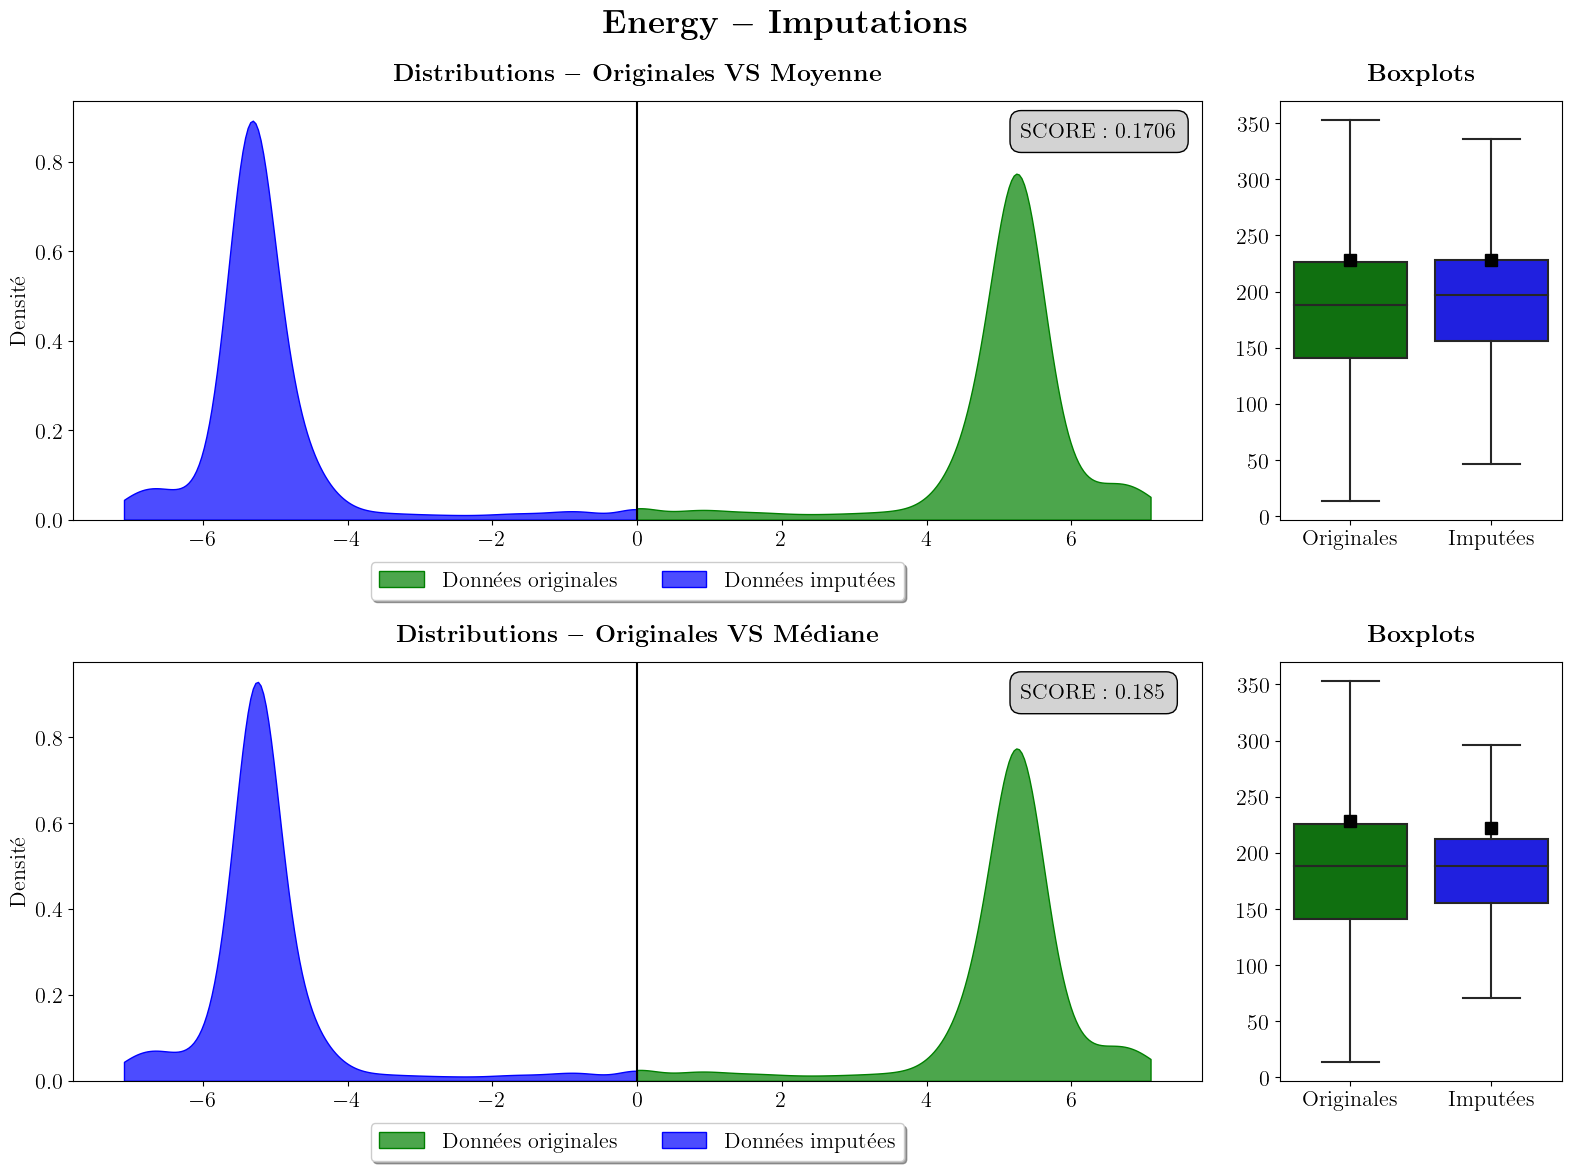



______________________________________________________________________________________________________________________________________________________




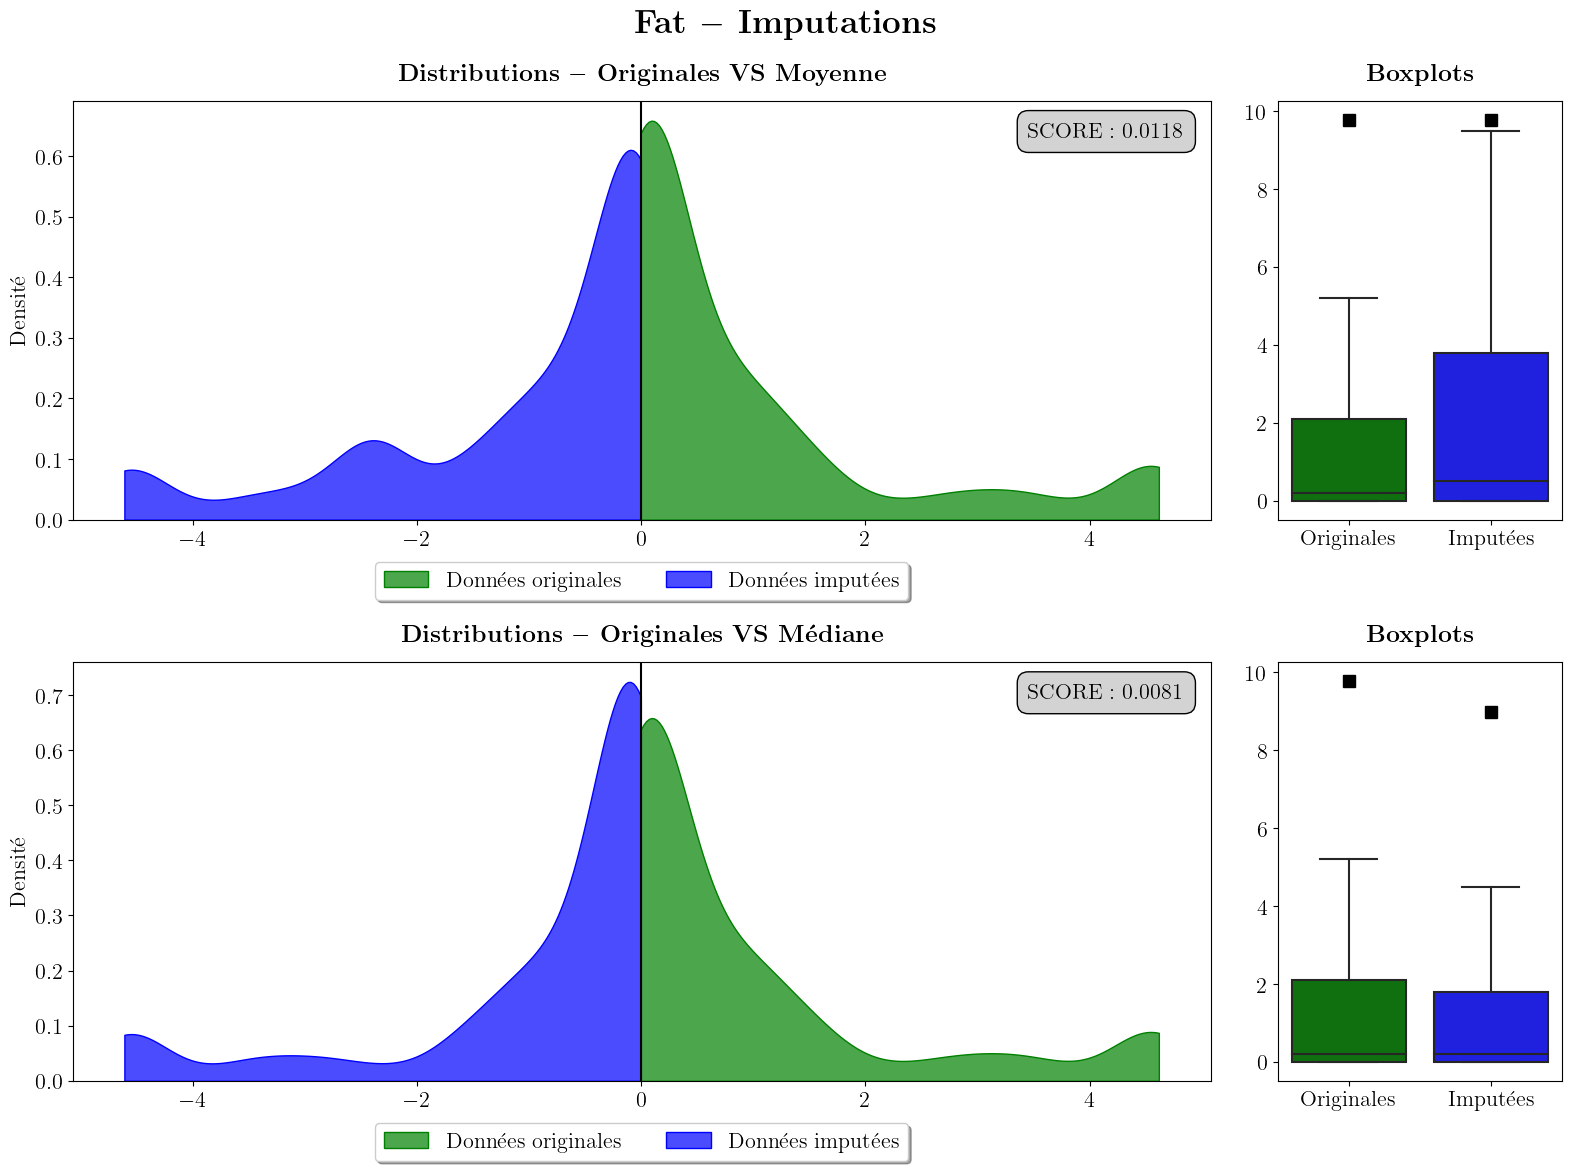



______________________________________________________________________________________________________________________________________________________




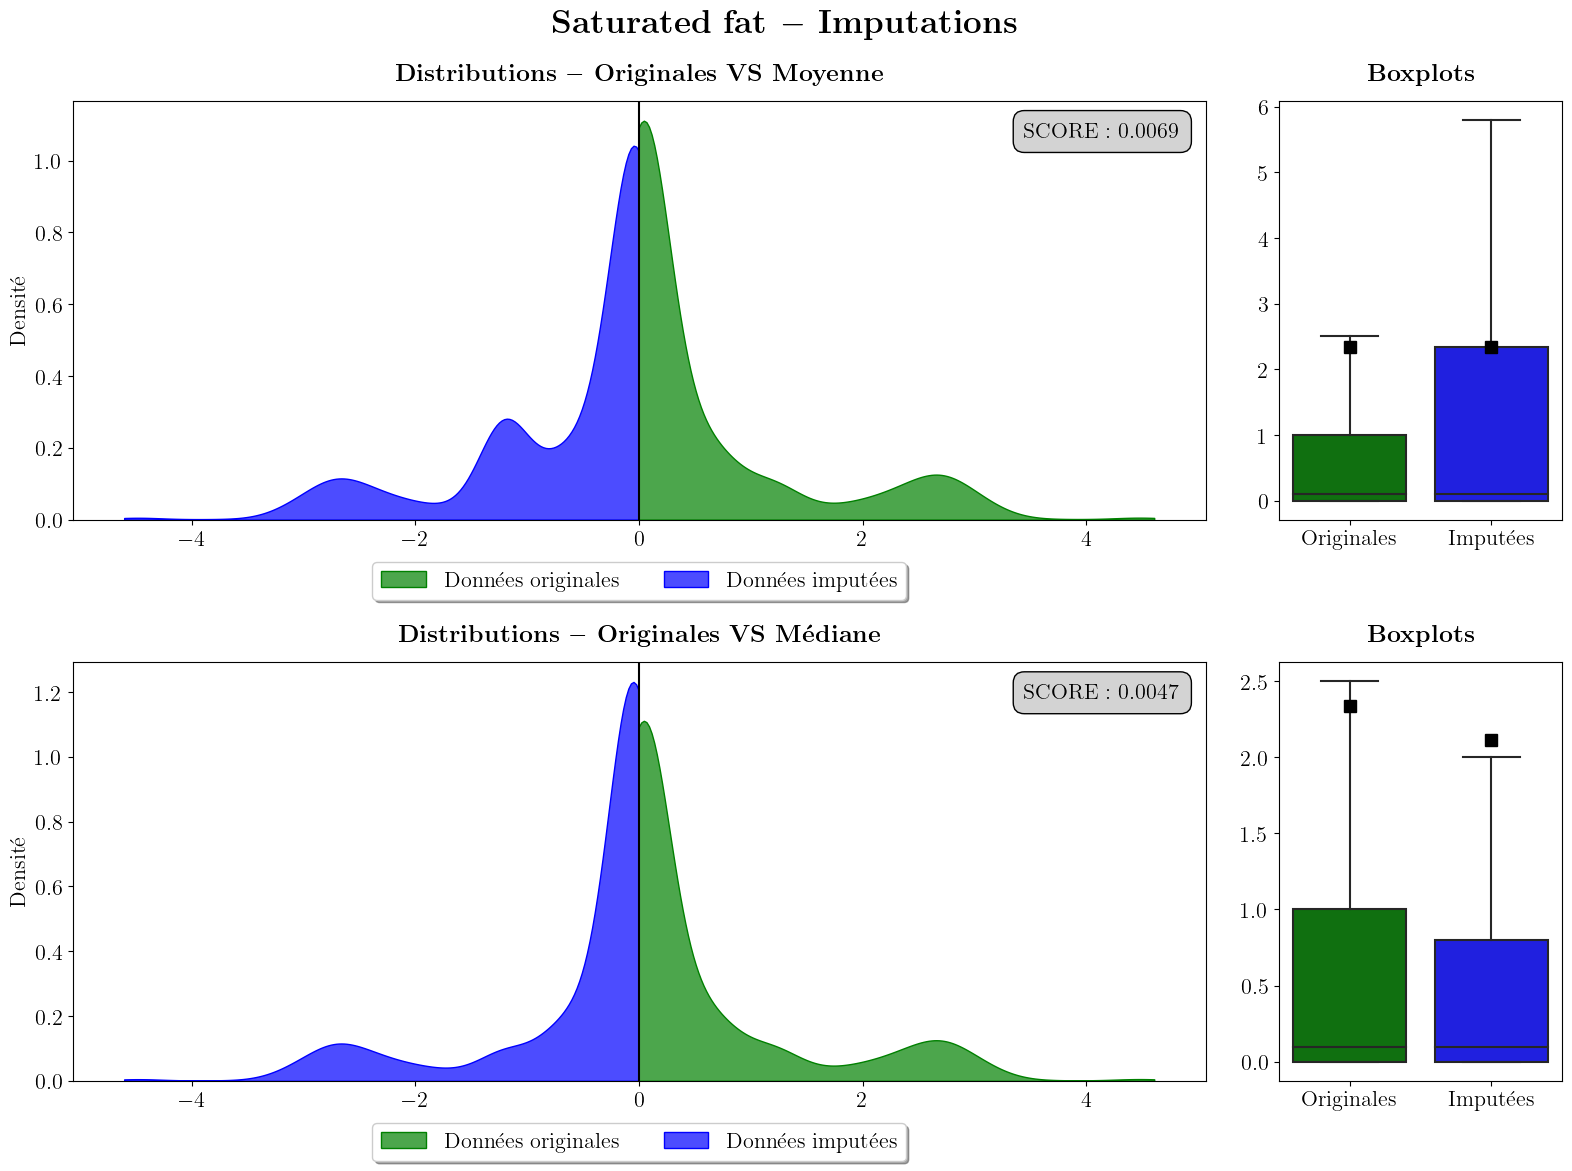



______________________________________________________________________________________________________________________________________________________




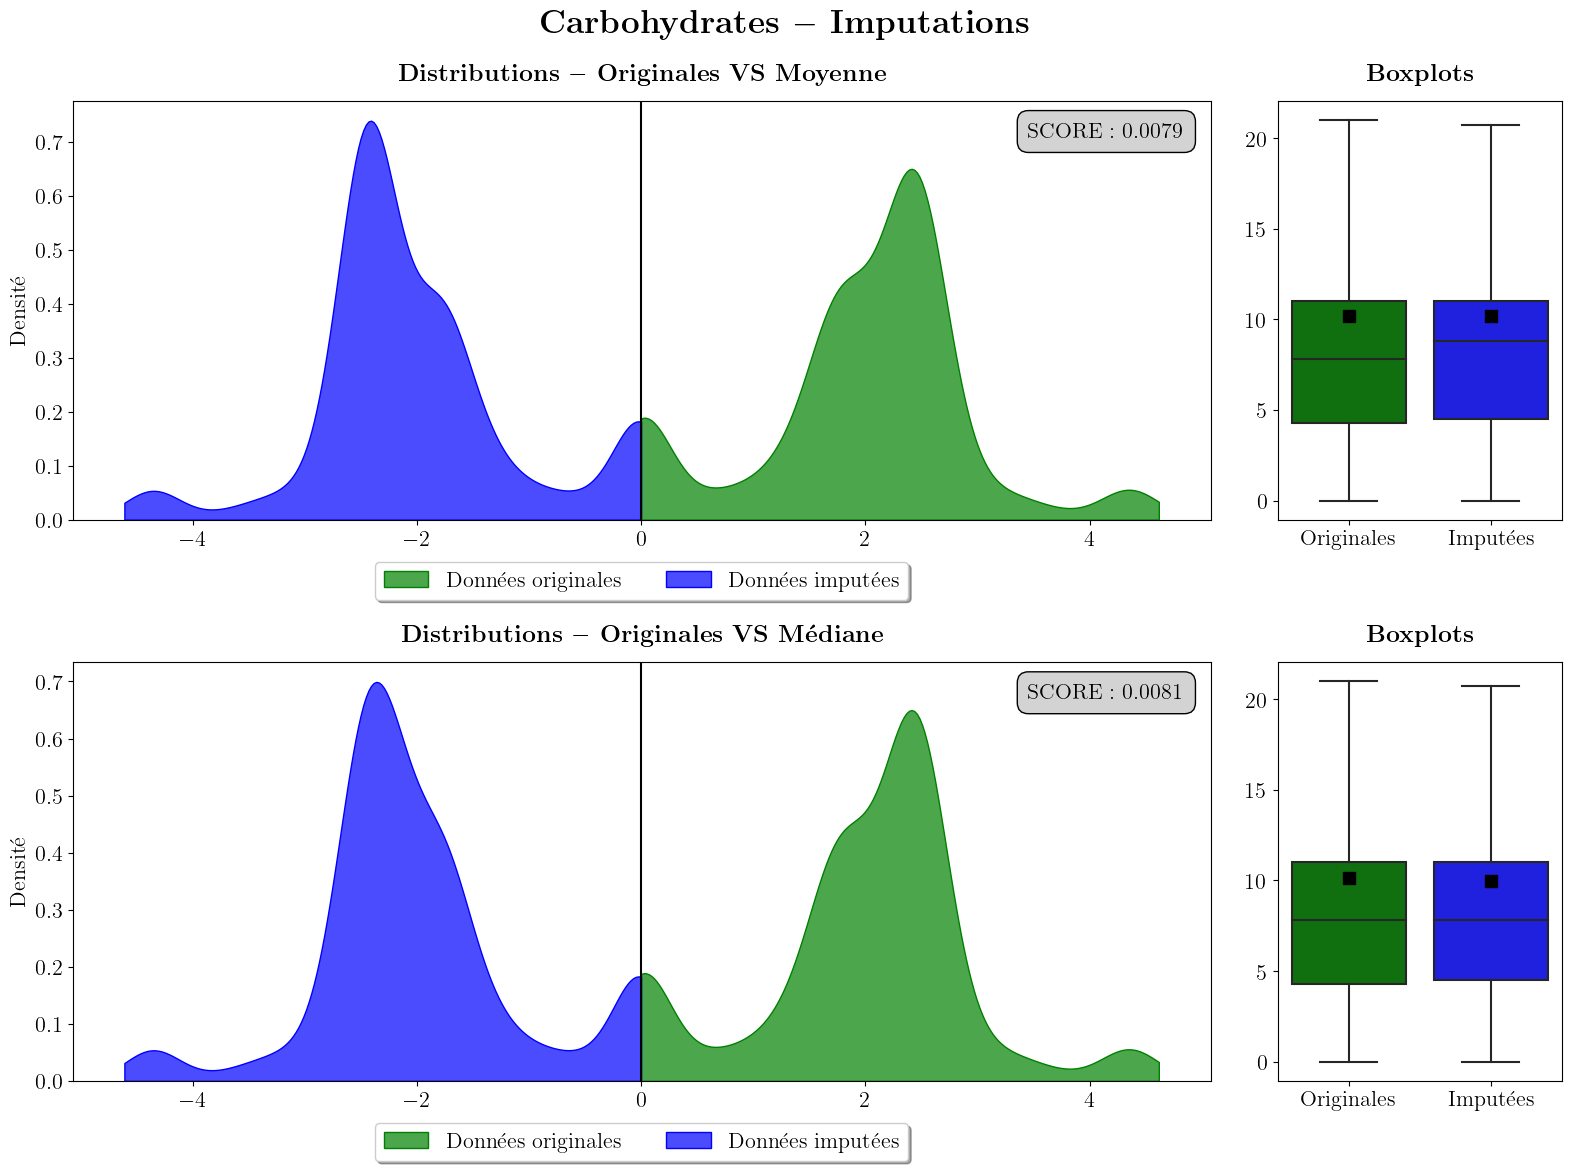



______________________________________________________________________________________________________________________________________________________




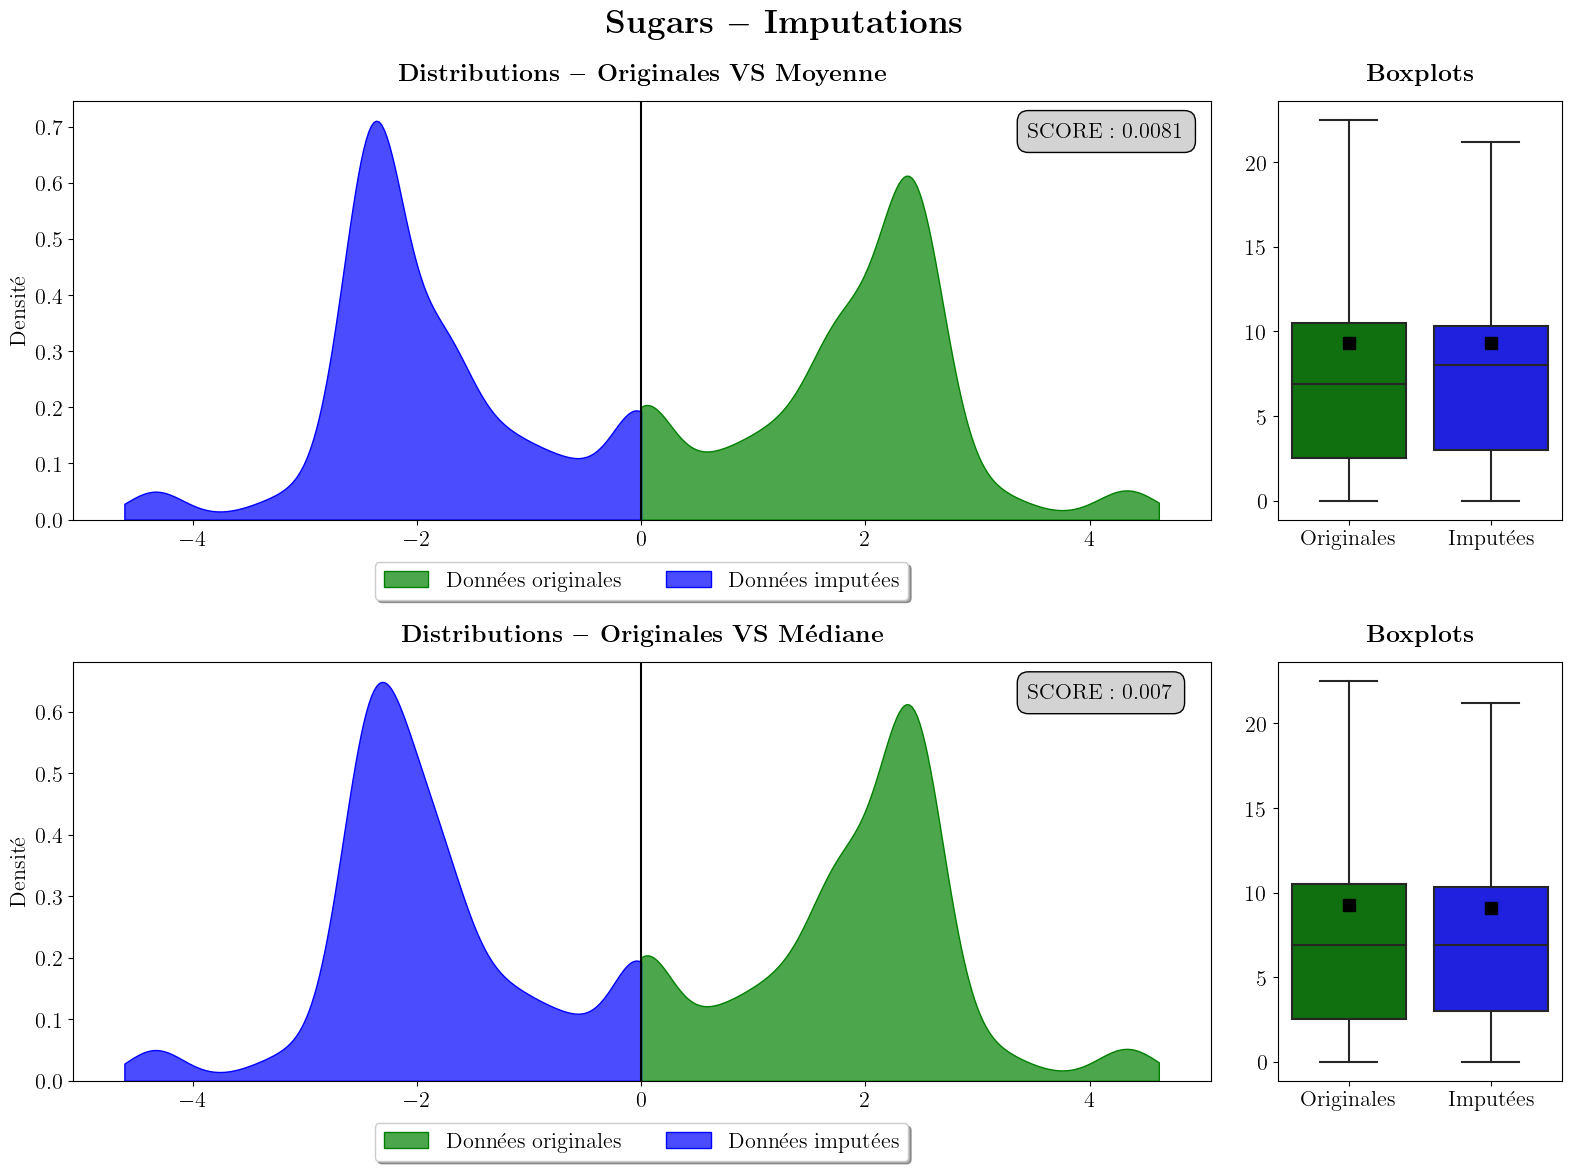



______________________________________________________________________________________________________________________________________________________




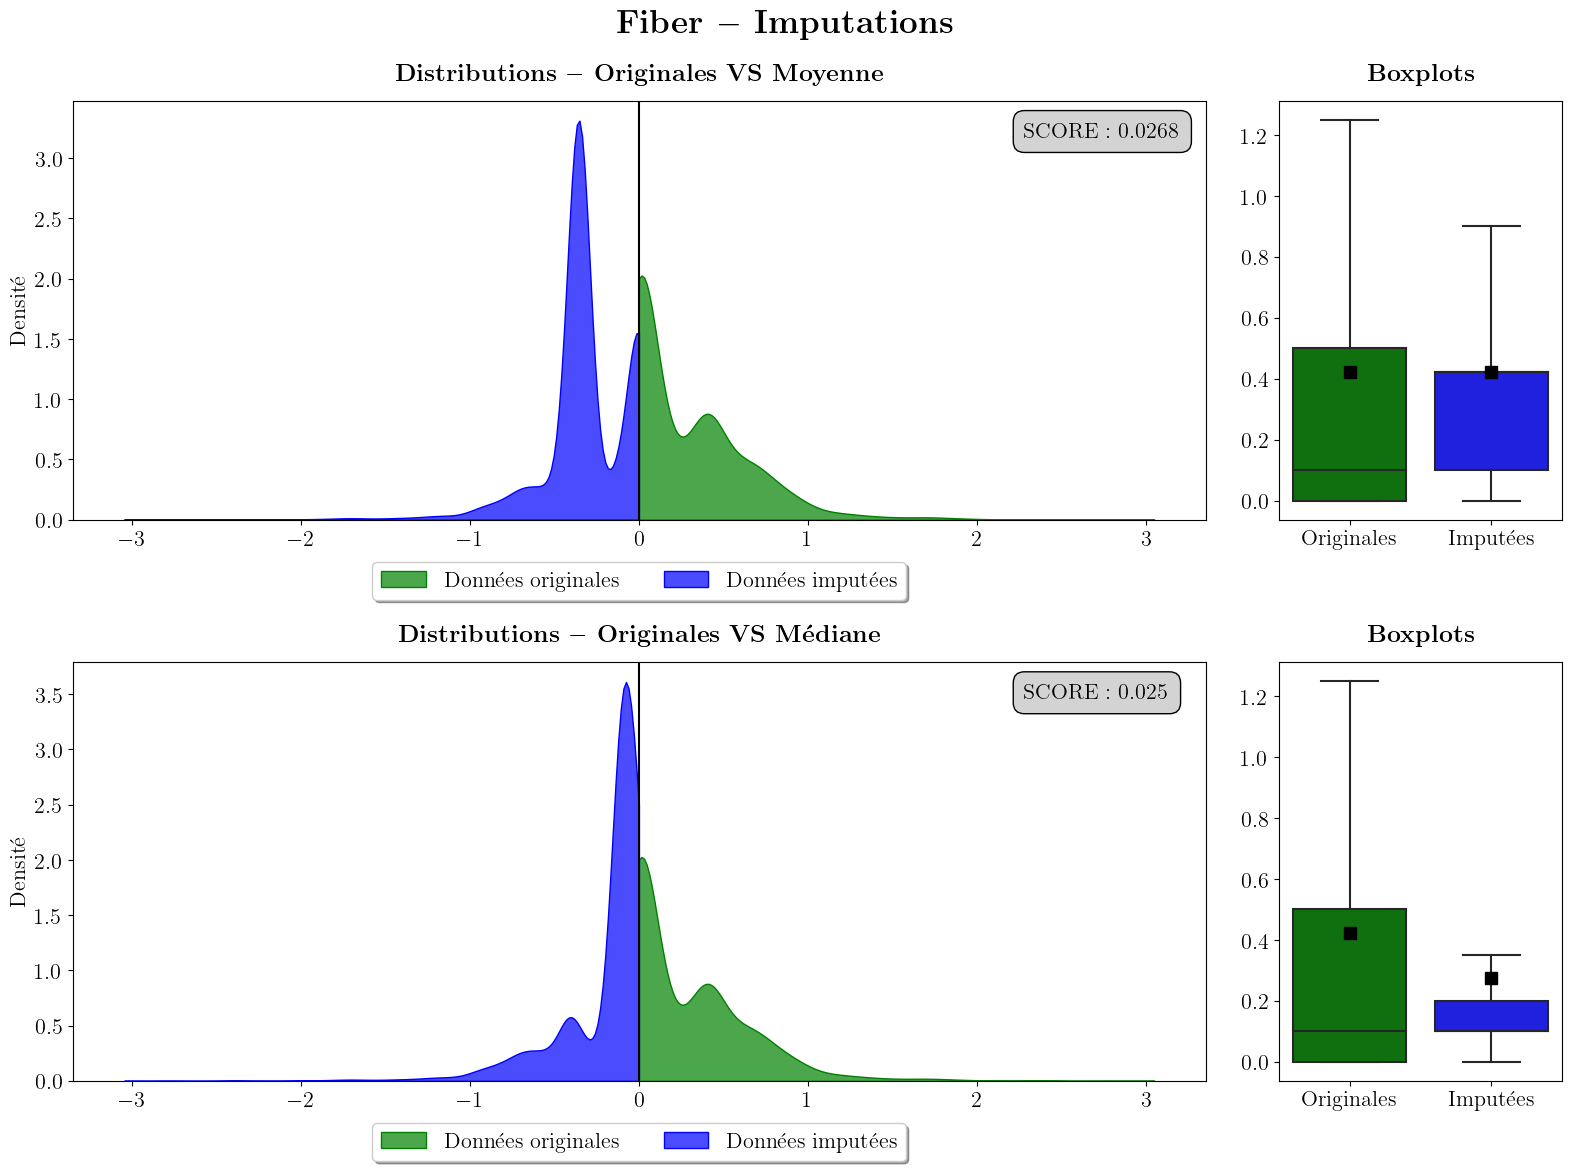



______________________________________________________________________________________________________________________________________________________




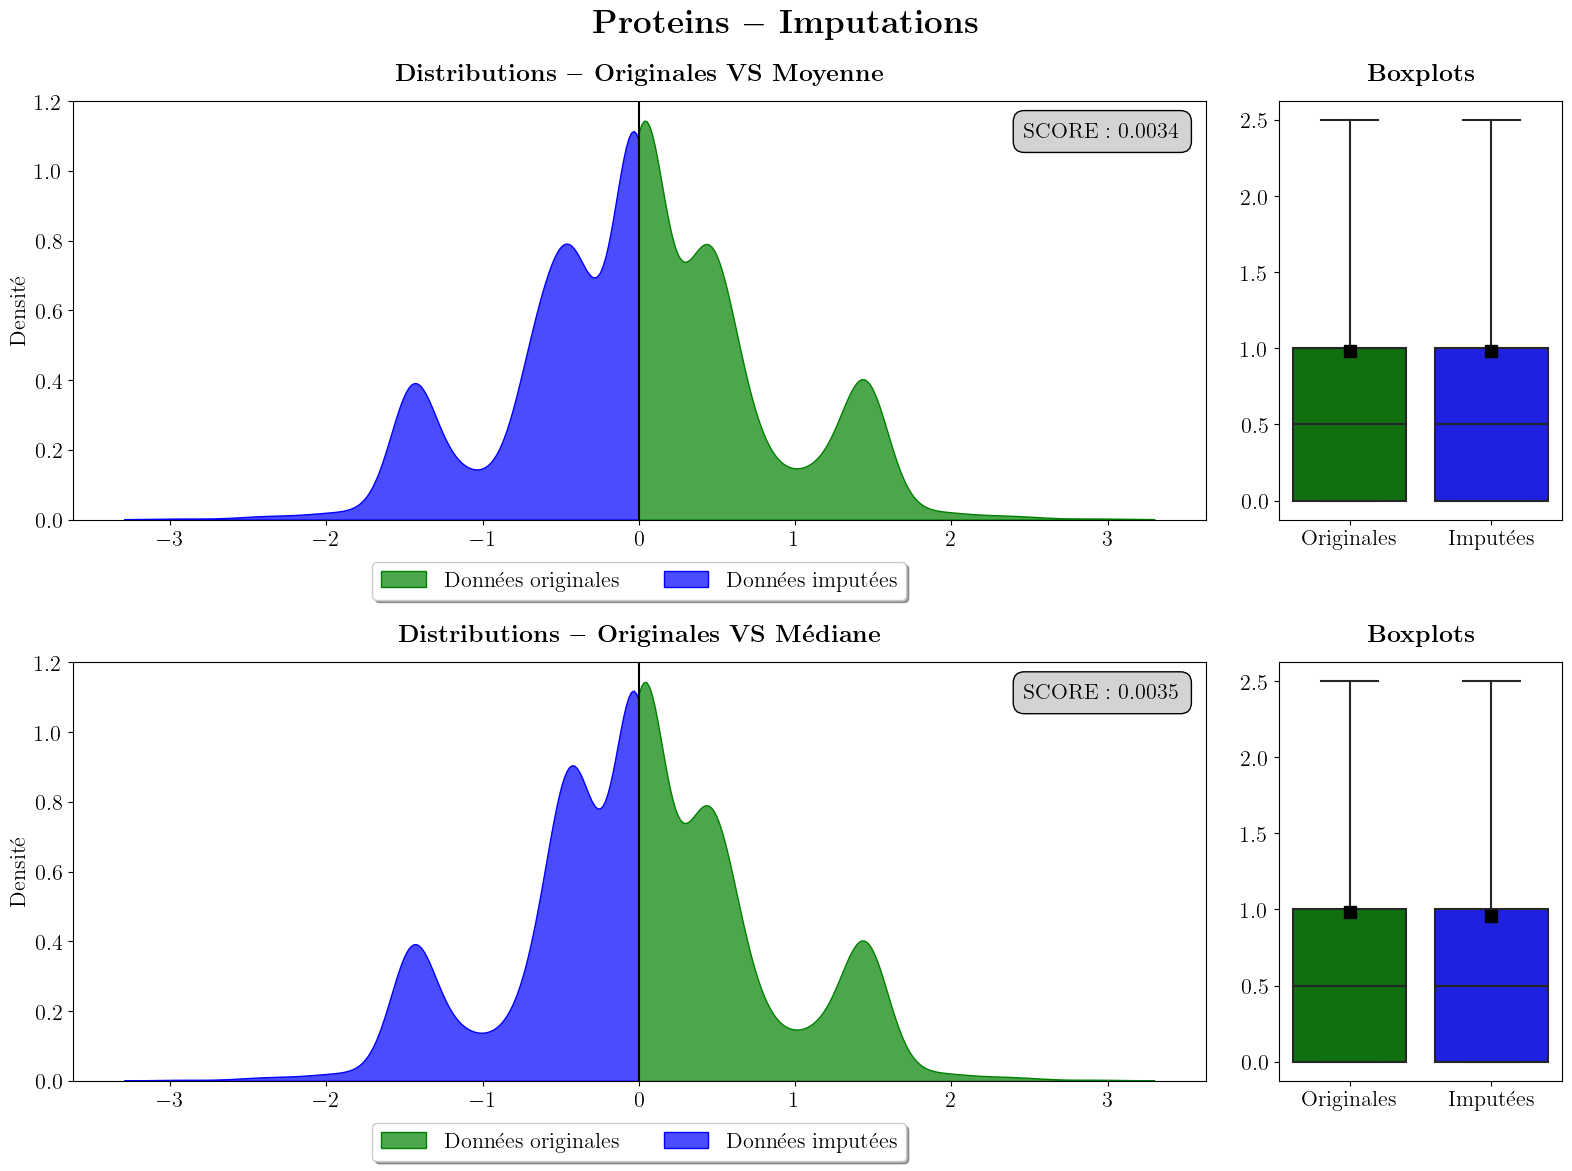



______________________________________________________________________________________________________________________________________________________




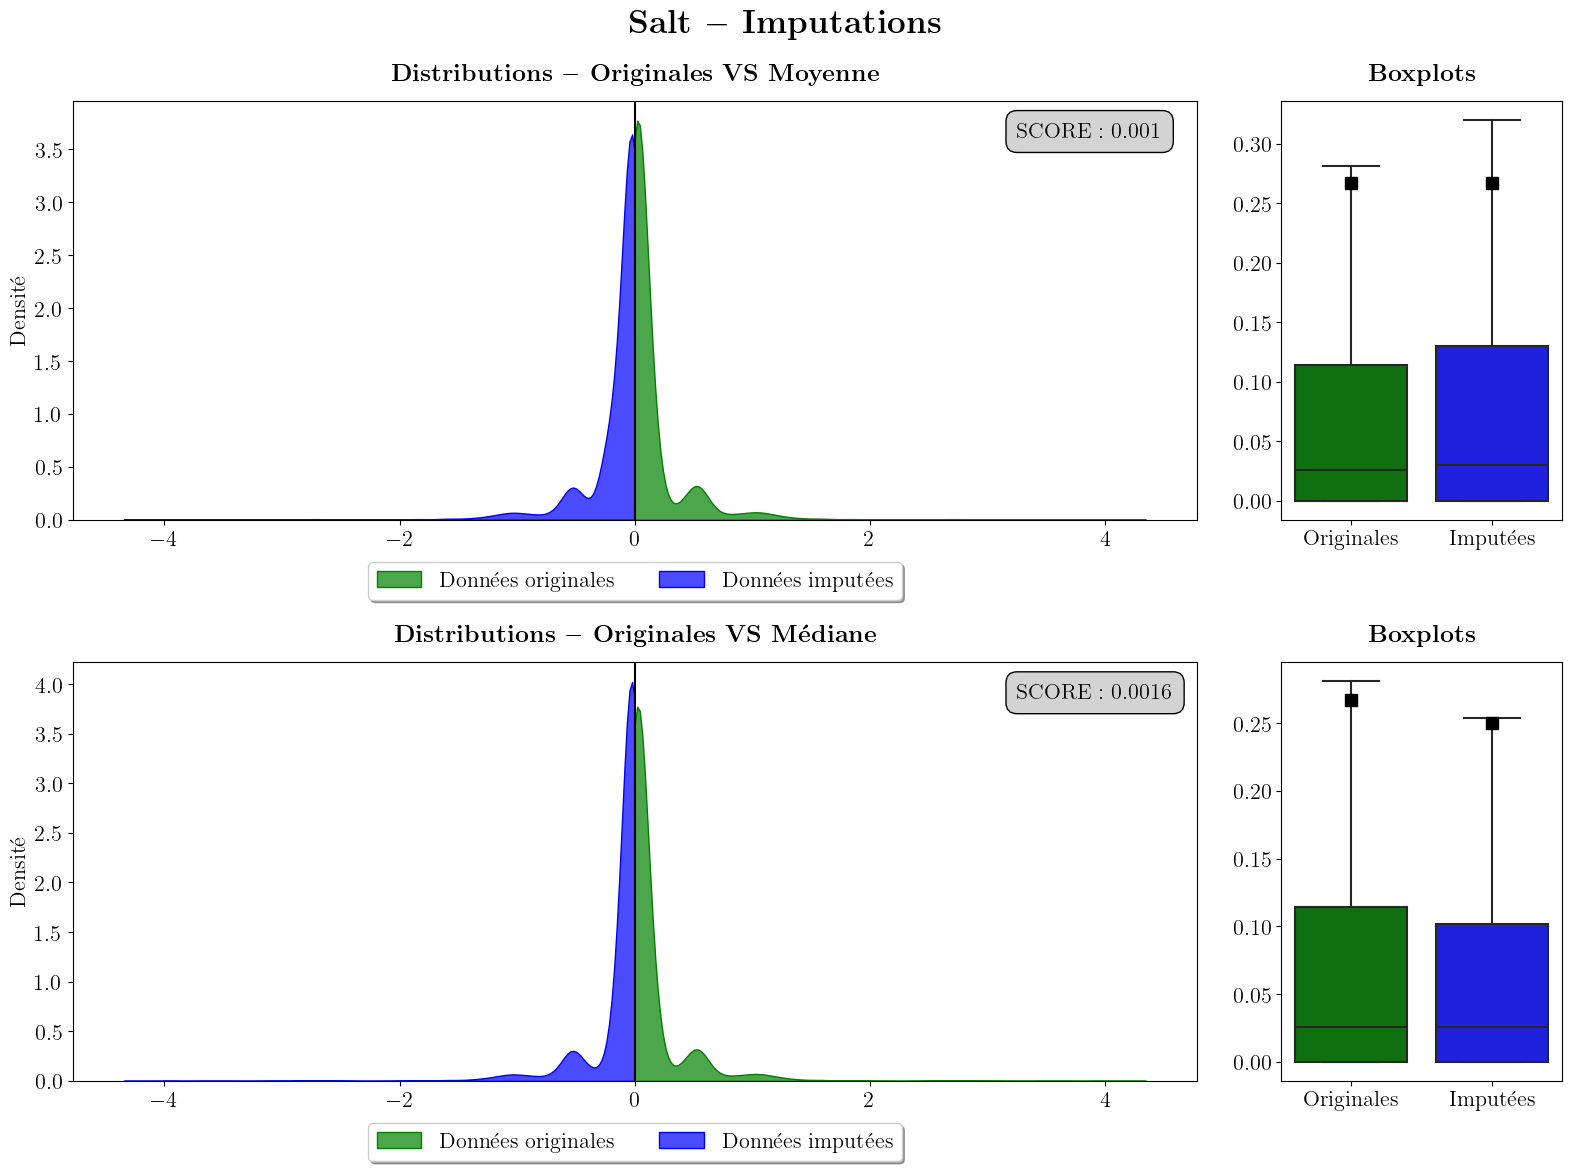



______________________________________________________________________________________________________________________________________________________




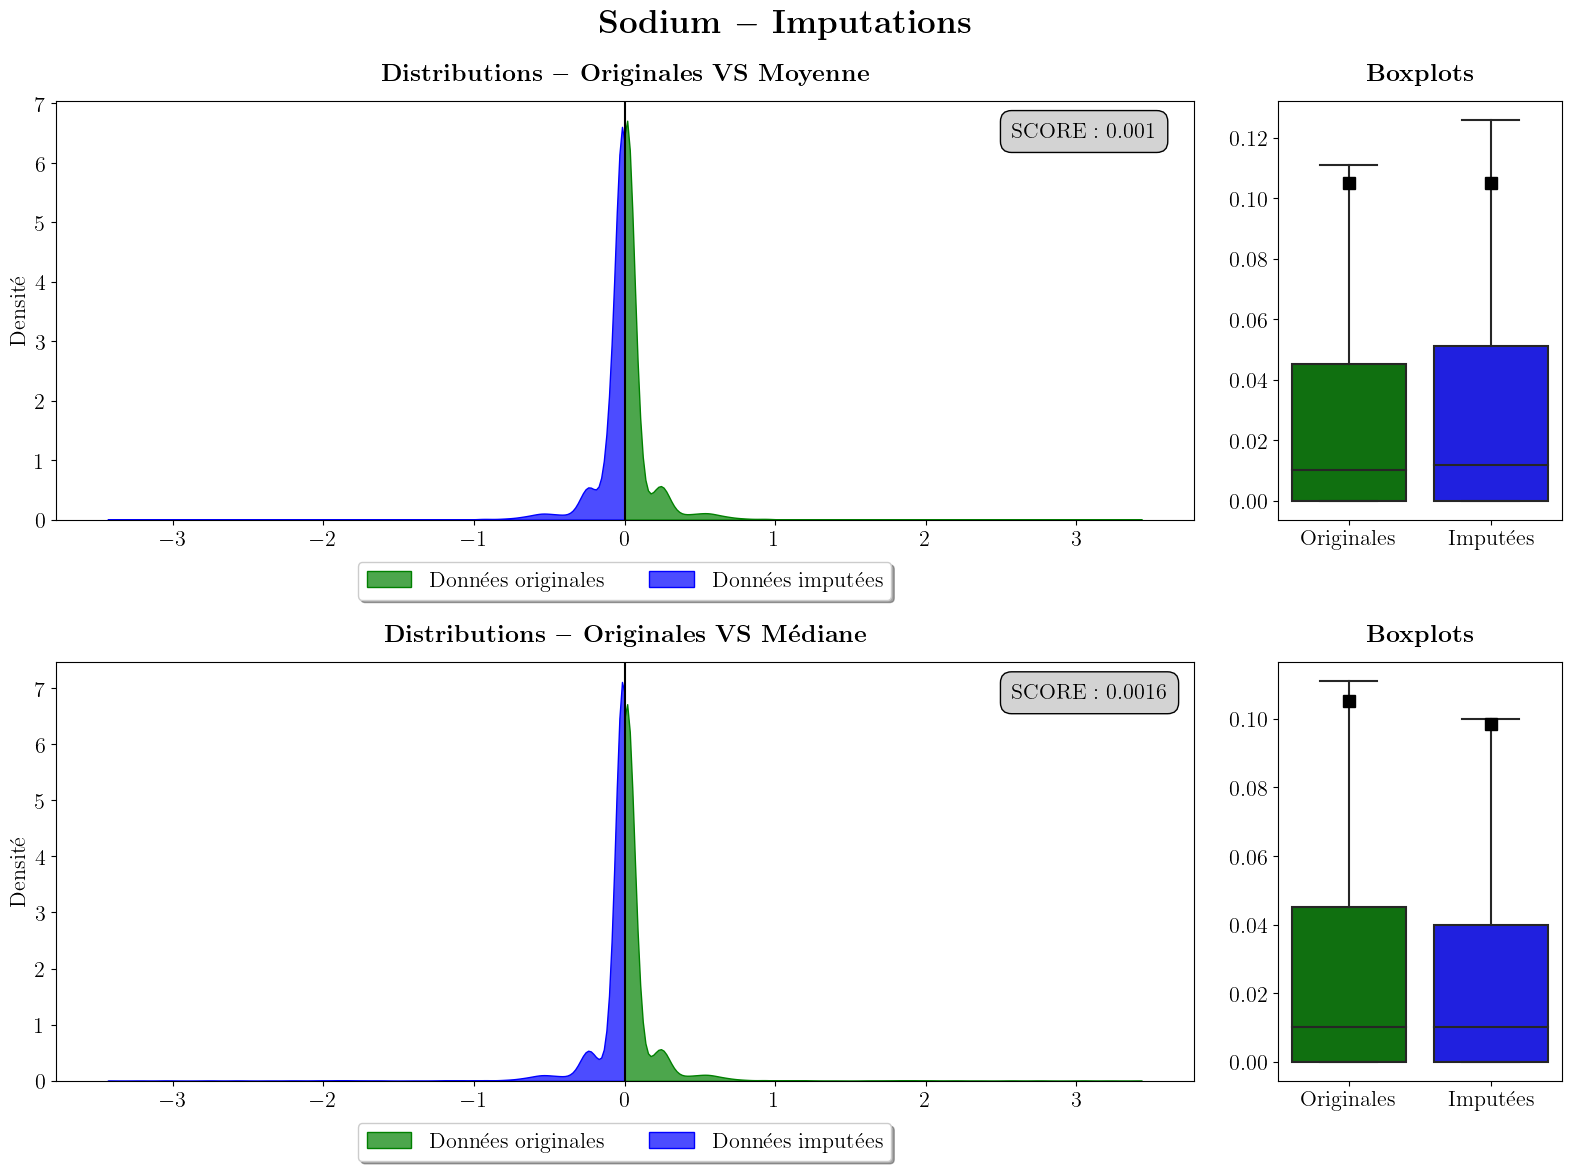



______________________________________________________________________________________________________________________________________________________




In [59]:
print(f"Distribution des variables pour les boissons")
print('_'*80)
print('\n')
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)
#sns.set_style('white', {"grid":False})
palette = ['green', 'blue']
mean_marker_props = {'marker': 's', 'markerfacecolor': 'black', 'markeredgecolor': 'black', 'markersize': 8}

for i,col in enumerate(features[:-2]):
    fig, axes = plt.subplots(2,2, figsize = (16,12), gridspec_kw={'width_ratios':[4,1]})
    #fig, axes = plt.subplots(1,2, figsize = (20,6))
    data = data_drink[col]
    data_original = (data + 1).apply(np.log)
    mean_imputed_data = data.fillna(data.mean())
    median_imputed_data = data.fillna(data.median())
    mean_mirrored_data = (mean_imputed_data + 1).apply(np.log)
    median_mirrored_data = (median_imputed_data + 1).apply(np.log)
    
    dict_type_mean = {'Originales' : data, 'Imputées' : mean_imputed_data}
    dict_type_median = {'Originales' : data, 'Imputées' : median_imputed_data}
    df_boxplot_drink_mean = pd.DataFrame(dict_type_mean)
    df_boxplot_drink_median = pd.DataFrame(dict_type_median)
    
    score_mean = data_corr_imputation_drink.iloc[i, 1]
    score_median = data_corr_imputation_drink.iloc[i, 2]
    
    title = col.replace('-', ' ').replace('_100g', '').capitalize()
    #plt.figure(figsize=(12,6))
    
    #Moyenne
    sns.kdeplot(data = data_original, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'green', cut = 0.01, label = 'Données originales', ax = axes[0,0])  
    sns.kdeplot(data = -mean_mirrored_data, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'blue', cut = -0.01, label = 'Données imputées', ax = axes[0,0])
    axes[0,0].axvline(x = 0, color = 'black', linestyle='-')
    axes[0,0].set_title(f"\\textbf{{Distributions $-$ Originales VS Moyenne}}", pad = 15, size = 18)  
    axes[0,0].set_xlabel('')
    axes[0,0].set_ylabel('Densité')
    axes[0,0].text(0.68 * axes[0,0].get_xlim()[1],
                   0.95 * axes[0,0].get_ylim()[1],
                   f"SCORE : {score_mean}",
                   ha = 'left', va = 'top',
                   fontsize = 16, 
                   bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    axes[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), shadow=True, ncol=2)
    
    sns.boxplot(data = df_boxplot_drink_mean, showfliers = False, width = 0.8, palette = palette, ax = axes[0,1], showmeans = True, meanprops = mean_marker_props)
    axes[0,1].set_title(f"\\textbf{{Boxplots}}", pad = 15, size = 18)
    
    #Mediane
    sns.kdeplot(data = data_original, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'green', cut = 0.01, label = 'Données originales', ax = axes[1,0])  
    sns.kdeplot(data = -median_mirrored_data, fill = True , alpha = 0.7, bw_adjust = 1.5, color = 'blue', cut = -0.01, label = 'Données imputées', ax = axes[1,0])
    axes[1,0].axvline(x = 0, color = 'black', linestyle='-')
    axes[1,0].set_title(f"\\textbf{{Distributions $-$ Originales VS Médiane}}", pad = 15, size = 18)  
    axes[1,0].set_xlabel('')
    axes[1,0].set_ylabel('Densité')
    axes[1,0].text(0.68 * axes[1,0].get_xlim()[1],
                   0.95 * axes[1,0].get_ylim()[1],
                   f"SCORE : {score_median}",
                   ha = 'left', va = 'top',
                   fontsize = 16,
                   bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    axes[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.075), shadow=True, ncol=2)
    
    sns.boxplot(data = df_boxplot_drink_median, showfliers = False, width = 0.8, palette = palette, ax = axes[1,1], showmeans = True, meanprops = mean_marker_props)
    axes[1,1].set_title(f"\\textbf{{Boxplots}}", pad = 15, size = 18)
    
    fig.suptitle(f"\\textbf{{{title} $-$ Imputations}}", fontsize = 24)
    plt.tight_layout()
    #plt.savefig(f"kde_drink_{col}.pdf", bbox_inches='tight')
    plt.show()
    
    print('\n')
    print('_' * 150)
    print("\n")

In [60]:
#On va imputer certaines features en fonction de la pertinence de la méthode d'imputation

liste_mean_food = ['energy_100g', 'proteins_100g', 'carbohydrates_100g']
liste_median_food = ['fat_100g', 'salt_100g', 'sodium_100g']
liste_mean_drink = ['carbohydrates_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']
liste_median_drink = ['fat_100g', 'saturated-fat_100g', 'sugars_100g']

#Pour les nourritures, on remplace les valeurs manquantes de ces features par la moyenne
for feature in liste_mean_food:
    data_food.loc[data_food[feature].isna(), feature] = data_food[feature].mean()

#Pour les nourritures, on remplace les valeurs manquantes de ces features par la médiane
for feature in liste_median_food:
    data_food.loc[data_food[feature].isna(), feature] = data_food[feature].median()

#Pour les boissons, on remplace les valeurs manquantes de ces features par la moyenne
for feature in liste_mean_drink:
    data_drink.loc[data_drink[feature].isna(), feature] = data_drink[feature].mean()

#Pour les boissons, on remplace les valeurs manquantes de ces features par la médiane
for feature in liste_median_drink:
    data_drink.loc[data_drink[feature].isna(), feature] = data_drink[feature].median()

In [61]:
#On rerègle les incohérences 

for index, row in data_food.iterrows():
    if row['saturated-fat_100g'] > row['fat_100g']:
        data_food.at[index, 'saturated-fat_100g'] = row['fat_100g']
    if row['sugars_100g'] > row['carbohydrates_100g']:
        data_food.at[index, 'sugars_100g'] = row['carbohydrates_100g']
    if row['sodium_100g'] > row['salt_100g']:
        data_food.at[index, 'sodium_100g'] = row['salt_100g']

for index, row in data_drink.iterrows():
    if row['saturated-fat_100g'] > row['fat_100g']:
        data_drink.at[index, 'saturated-fat_100g'] = row['fat_100g']
    if row['sugars_100g'] > row['carbohydrates_100g']:
        data_drink.at[index, 'sugars_100g'] = row['carbohydrates_100g']
    if row['sodium_100g'] > row['salt_100g']:
        data_drink.at[index, 'sodium_100g'] = row['salt_100g']

In [62]:
#On impute les features fiber par 0 pour les 2 datas (nourritures et boissons)

data_food.loc[data_food['fiber_100g'].isna(), 'fiber_100g']  = 0
data_drink.loc[data_drink['fiber_100g'].isna(), 'fiber_100g'] = 0

In [63]:
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [64]:
#Pour le reste des features, nous allons imputer à l'aide du KNN. D'abord, création d'une fonction pour déterminer la valeur de n la plus optimale pour imputer, puis on impute avec le n optimal.


def knn_k_optimal(dataframe, varcible, features, n_lim):
    dataframe_name = [name for name, df in globals().items() if id(df) == id(dataframe)][0]
    #On rassemble les features et la cible en mettant la cible en dernière colonne
    colonnes = features
    colonnes.append(varcible)
    dataframe_knn = dataframe[colonnes]
    X = dataframe_knn.values

    #On cree un data_train en ne gardant que les lignes ou la cible est remplie
    dataframe_train = dataframe_knn.loc[~dataframe_knn[varcible].isna(),:]
    X_train = dataframe_train.values
    
    #On sauvegarde les valeurs réelles de la cible dans y_true
    y_true = X_train[:,-1].copy()

    #On supprime au hasard la moitié des valeurs de la cible
    indices_suppr = np.random.choice(X_train.shape[0], size=round(X_train.shape[0]/2), replace=False)
    X_train[indices_suppr, -1] = np.nan


    n_neighbors_list = [i for i in range(1, n_lim+1)]
    
    rmse_scores = []
    #mape_scores = []
    
    print('-' * 40)
    for n in n_neighbors_list:
        imputer = KNNImputer(n_neighbors=n)

        #On impute notre jeu d'entrainement dans lequel on a supprimé la moitié des valeurs
        X_imputed = imputer.fit_transform(X_train) 
        
        #On sauvegarde les valeurs prédites dans la variable y_pred
        y_pred = X_imputed[:,-1]

        #On calcule les scores pour différencier les vraies valeurs des valeurs prédites
        rmse = np.sqrt(mean_squared_error(y_true, y_pred)).round(3)
        #mape = mean_absolute_percentage_error(y_true, y_pred)
        
        #On affiche les scores
        print(f"Pour n = {n}, on a RMSE = {rmse}")
        print('-' * 40)
        #On sauvegarde ces scores dans une liste (un score par valeur de n)
        rmse_scores.append(rmse)
        #mape_scores.append(mape)
    
    #Représentation graphique avec n en abscisse, mape_score en ordonnée et rmse_score en texte sur le graphique
    plt.figure(figsize=(12, 6))
    sns.barplot(x=n_neighbors_list, y=rmse_scores, palette='deep')
    
    for i, score in enumerate(rmse_scores):
        plt.text(i, 0.4 * plt.ylim()[1], f'{score}', ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
    
    sns.lineplot(x=[x - 1 for x in n_neighbors_list], y=rmse_scores, marker = 'o', color = 'black')
    plt.title(f"\\textbf{{Histogramme des $n$ voisins}}", pad=20, size=20)
    plt.xlabel(f"Valeur de $n$")
    plt.ylabel(f"RMSE Score", labelpad=15)
    #plt.text(0.95 * plt.xlim()[1], 0.95 * plt.ylim()[1], f"MAPE : {round(min(mape_scores),2)}", ha = 'right', va = 'top', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    #plt.savefig(f"knn_{dataframe_name}_{varcible}.pdf", bbox_inches='tight')
    plt.show()
    
    #On capture les places des scores minimaux
    #min_rmse_index = np.argmin(rmse_scores)
    #min_mape_index = np.argmin(mape_scores)
    
    print('_' * 40)
    print('\n')

In [65]:
def knn_imputation(dataframe, varcible, features, n_optimal):
    
    #On rassemble les features et la cible en mettant la cible en dernière colonne
    colonnes = features
    colonnes.append(varcible)
    X = dataframe[colonnes].values
    
    #On définit l'imputer
    imputer = KNNImputer(n_neighbors=n_optimal)
    X_imputed = imputer.fit_transform(X)
    
    #On remplace la colonne varcible du dataframe par la derniere colonne de X_imputed
    dataframe.loc[:,varcible] = X_imputed[:,-1]

----------------------------------------
Pour n = 1, on a RMSE = 3.909
----------------------------------------
Pour n = 2, on a RMSE = 3.423
----------------------------------------
Pour n = 3, on a RMSE = 3.278
----------------------------------------
Pour n = 4, on a RMSE = 3.254
----------------------------------------
Pour n = 5, on a RMSE = 3.236
----------------------------------------


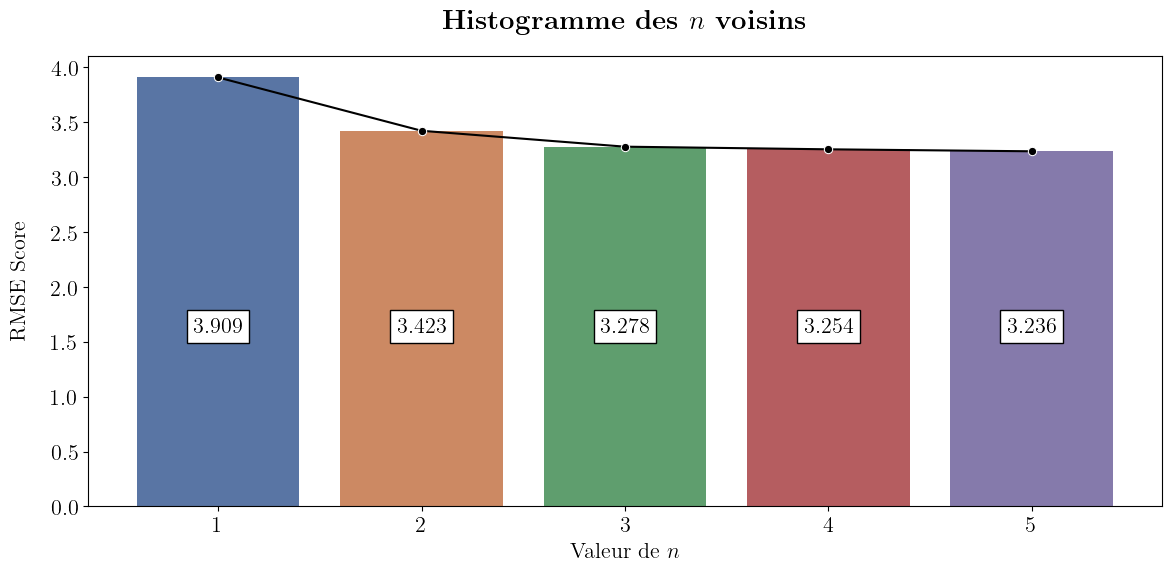

________________________________________




In [66]:
#On va imputer la feature 'saturated-fat_100g' à l'aide de features qui sont relativement corrélées avec elle soit 'energy_100g' et 'fat_100g'

knn_k_optimal(data_food, 'saturated-fat_100g', ['energy_100g', 'fat_100g'], 5)

In [66]:
#On impute donc avec n = 3

knn_imputation(data_food, 'saturated-fat_100g', ['energy_100g', 'fat_100g'], 3)

----------------------------------------
Pour n = 1, on a RMSE = 7.802
----------------------------------------
Pour n = 2, on a RMSE = 7.159
----------------------------------------
Pour n = 3, on a RMSE = 6.998
----------------------------------------
Pour n = 4, on a RMSE = 6.907
----------------------------------------
Pour n = 5, on a RMSE = 6.916
----------------------------------------


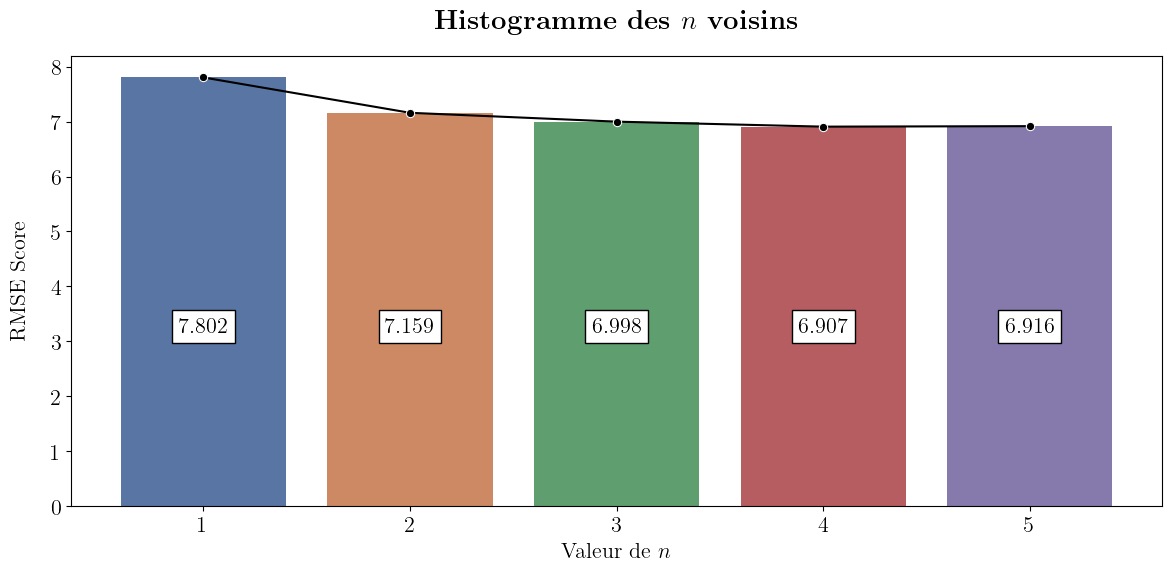

________________________________________




In [68]:
#De même pour la feature 'sugars_100g', que l'on va imputer à l'aide des features 'energy_100g', 'proteins_100g' et 'carbohydrates_100g'

knn_k_optimal(data_food, 'sugars_100g', ['energy_100g', 'proteins_100g', 'carbohydrates_100g'], 5)

In [67]:
#On impute donc avec n = 2

knn_imputation(data_food, 'sugars_100g', ['energy_100g', 'proteins_100g', 'carbohydrates_100g'], 2)

----------------------------------------
Pour n = 1, on a RMSE = 3.569
----------------------------------------
Pour n = 2, on a RMSE = 3.238
----------------------------------------
Pour n = 3, on a RMSE = 3.14
----------------------------------------
Pour n = 4, on a RMSE = 3.098
----------------------------------------
Pour n = 5, on a RMSE = 3.077
----------------------------------------


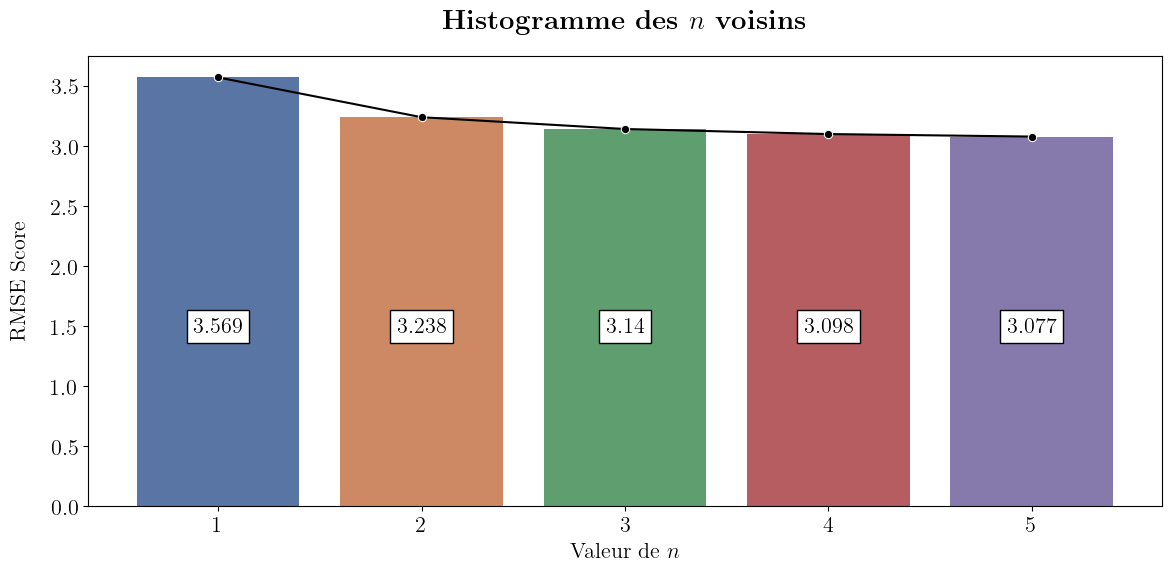

________________________________________




In [70]:
#Reste les nutriscores ! Pareil, un KNN.

knn_k_optimal(data_food, 'ns-fr_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g'], 5)

In [68]:
#On impute avec k = 2

knn_imputation(data_food, 'ns-fr_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g'], 2)

----------------------------------------
Pour n = 1, on a RMSE = 1.271
----------------------------------------
Pour n = 2, on a RMSE = 1.193
----------------------------------------
Pour n = 3, on a RMSE = 1.202
----------------------------------------
Pour n = 4, on a RMSE = 1.217
----------------------------------------
Pour n = 5, on a RMSE = 1.229
----------------------------------------


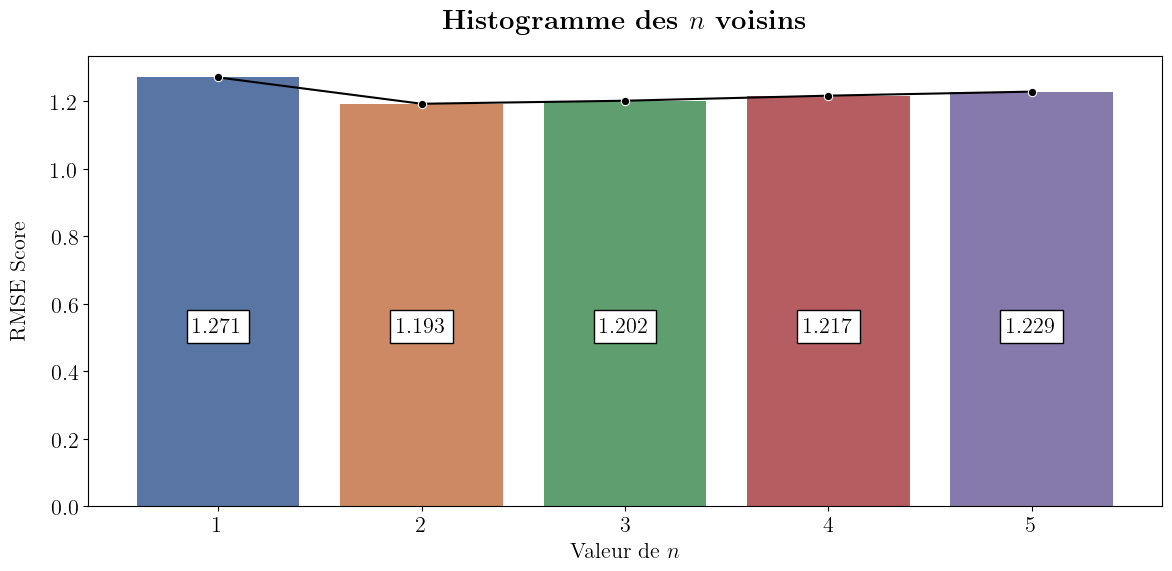

________________________________________




In [72]:
#Et enfin, on va imputer 'ns-uk_100g', à l'aide de 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'ns-fr_100g'

knn_k_optimal(data_food, 'ns-uk_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'ns-fr_100g'], 5)

In [69]:
#On va donc imputer avec k = 2

knn_imputation(data_food, 'ns-uk_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'ns-fr_100g'], 2)

In [70]:
#Dernier réglage, le nutriscore est forcément une valeur entière

data_food.loc[:, 'ns-fr_100g'] = data_food['ns-fr_100g'].round()
data_food.loc[:, 'ns-uk_100g'] = data_food['ns-uk_100g'].round()

----------------------------------------
Pour n = 1, on a RMSE = 114.914
----------------------------------------
Pour n = 2, on a RMSE = 103.113
----------------------------------------
Pour n = 3, on a RMSE = 97.852
----------------------------------------
Pour n = 4, on a RMSE = 94.475
----------------------------------------
Pour n = 5, on a RMSE = 94.958
----------------------------------------


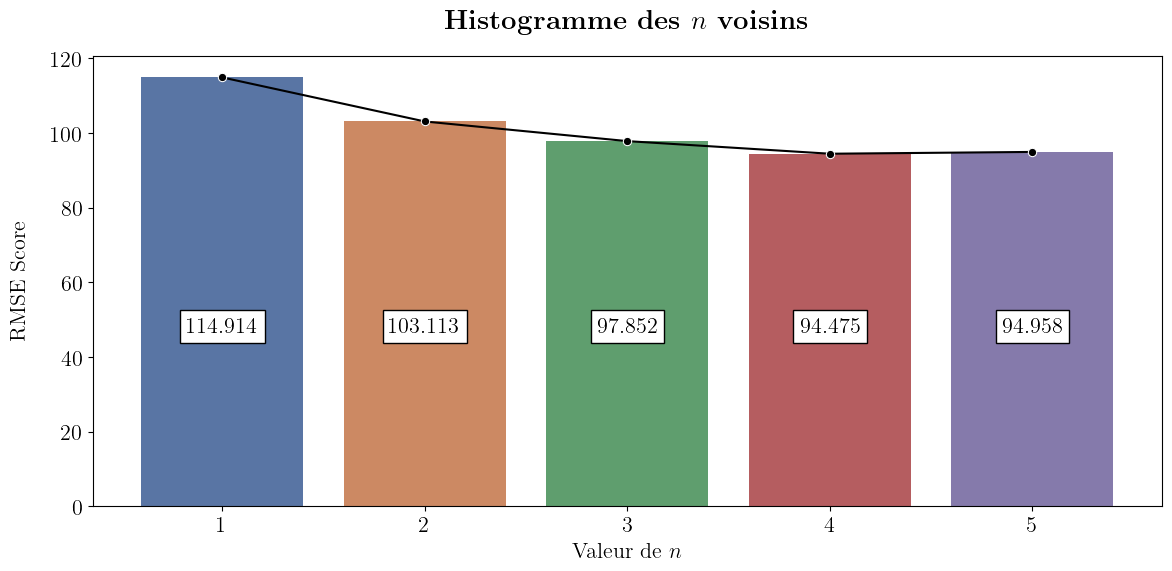

________________________________________




In [75]:
#Au tour de data_drink. Reste à imputer 'fat_100g', et les nutriscores.

#On va imputer 'energy_100g' à l'aide de 'fat_100g' et 'saturated-fat_100g'

knn_k_optimal(data_drink, 'energy_100g', ['fat_100g', 'saturated-fat_100g'], 5)

In [71]:
#Avec les valeurs de RMSE score, on impute avec k = 4

knn_imputation(data_drink, 'energy_100g', ['fat_100g', 'saturated-fat_100g'], 4)

----------------------------------------
Pour n = 1, on a RMSE = 2.419
----------------------------------------
Pour n = 2, on a RMSE = 2.192
----------------------------------------
Pour n = 3, on a RMSE = 2.121
----------------------------------------
Pour n = 4, on a RMSE = 2.032
----------------------------------------
Pour n = 5, on a RMSE = 2.013
----------------------------------------


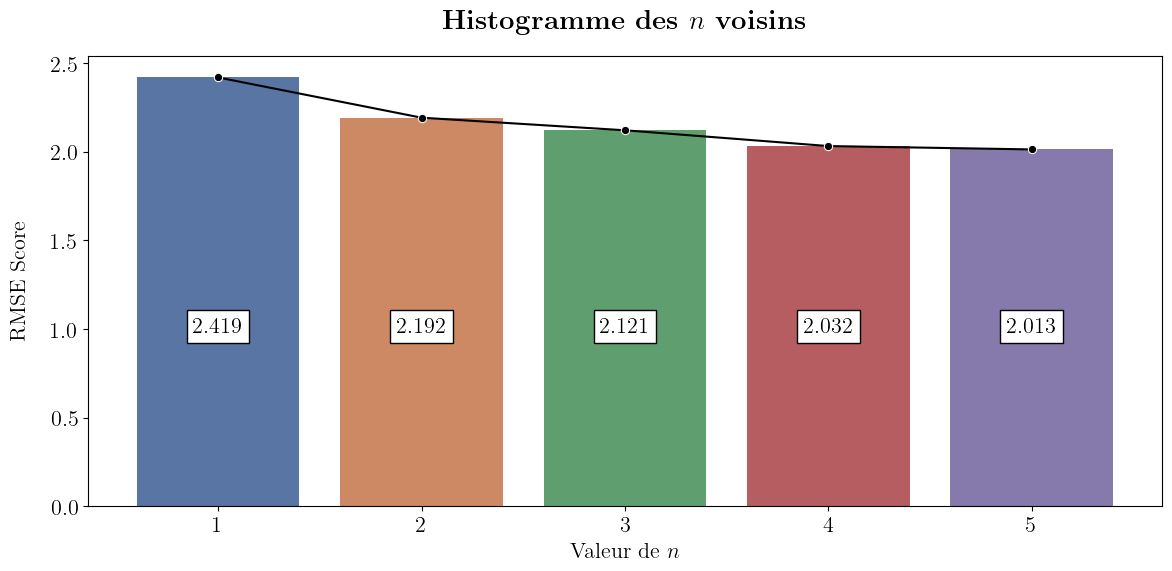

________________________________________




In [77]:
#On va commencer par 'ns-uk_100g' à l'aide de 'energy_100g', 'fat_100g' et 'saturated-fat_100g'

knn_k_optimal(data_drink, 'ns-uk_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g'], 5)

In [72]:
#On impute avec k = 4

knn_imputation(data_drink, 'ns-uk_100g', ['energy_100g', 'fat_100g', 'saturated-fat_100g'], 4)

----------------------------------------
Pour n = 1, on a RMSE = 2.078
----------------------------------------
Pour n = 2, on a RMSE = 1.884
----------------------------------------
Pour n = 3, on a RMSE = 1.812
----------------------------------------
Pour n = 4, on a RMSE = 1.752
----------------------------------------
Pour n = 5, on a RMSE = 1.727
----------------------------------------


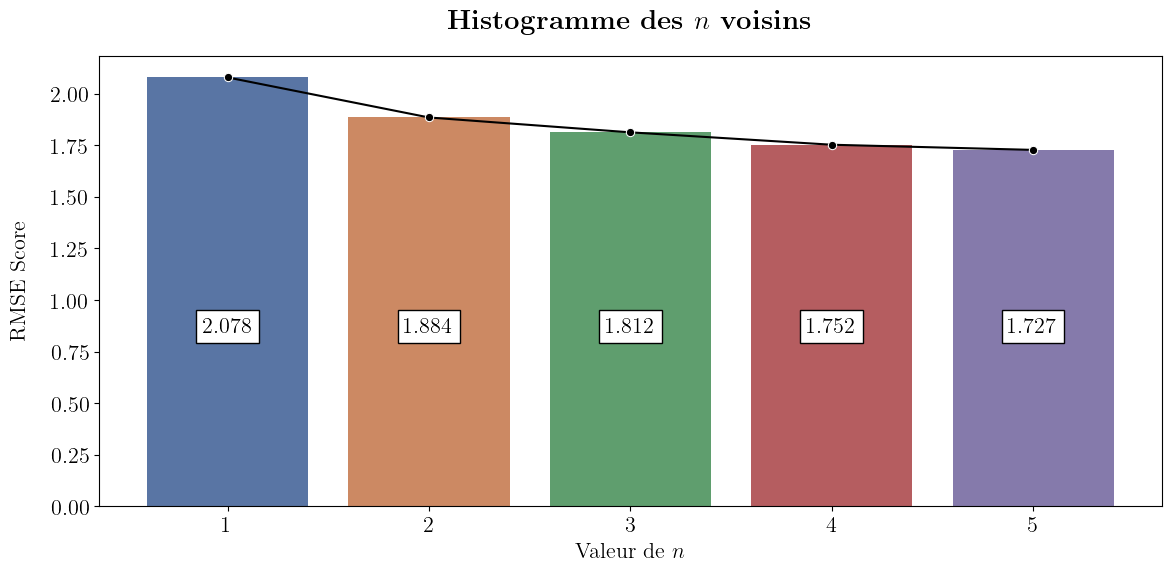

________________________________________




In [79]:
#Et enfin, on impute 'ns-fr_100g' à l'aide de 'carbohydrates_100g', 'sugars_100g' et 'ns-uk_100g'

knn_k_optimal(data_drink, 'ns-fr_100g', ['carbohydrates_100g', 'sugars_100g', 'ns-uk_100g'], 5)

In [73]:
#On impute avec k = 4

knn_imputation(data_drink, 'ns-fr_100g', ['carbohydrates_100g', 'sugars_100g', 'ns-uk_100g'], 4)

In [74]:
#Dernier réglage, le nutriscore est forcément une valeur entière

data_drink.loc[:, 'ns-fr_100g'] = data_drink['ns-fr_100g'].round()
data_drink.loc[:, 'ns-uk_100g'] = data_drink['ns-uk_100g'].round()

In [75]:
#Derniers réglages pour palier aux limites du KNN. KNN ne prend pas en compte qu'il est impossible d'avoir + de sucres que de glucides, ou + d'acides gras saturés que de graisses. Idem pour Sel et Sodium.

#On règle pour data_food
data_food.loc[data_food['sugars_100g'] > data_food['carbohydrates_100g'], 'sugars_100g'] = data_food['carbohydrates_100g']
data_food.loc[data_food['saturated-fat_100g'] > data_food['fat_100g'], 'saturated-fat_100g'] = data_food['fat_100g']
data_food.loc[data_food['sodium_100g'] > data_food['salt_100g'], 'sodium_100g'] = data_food['salt_100g']

#Et on règle pour data_drink
data_drink.loc[data_drink['sugars_100g'] > data_drink['carbohydrates_100g'], 'sugars_100g'] = data_drink['carbohydrates_100g']
data_drink.loc[data_drink['saturated-fat_100g'] > data_drink['fat_100g'], 'saturated-fat_100g'] = data_drink['fat_100g']
data_drink.loc[data_drink['sodium_100g'] > data_drink['salt_100g'], 'sodium_100g'] = data_drink['salt_100g']

In [97]:
#Nous n'avons plus aucune valeur manquantes

print('Valeurs manquantes pour data_food :', data_food[features].isna().mean().mean())
print('Valeurs manquantes pour data_drink :', data_drink[features].isna().mean().mean())

Valeurs manquantes pour data_food : 0.0
Valeurs manquantes pour data_drink : 0.0


***
## 4. Analyse des données
***

### 4.1 Analyse univariée
***

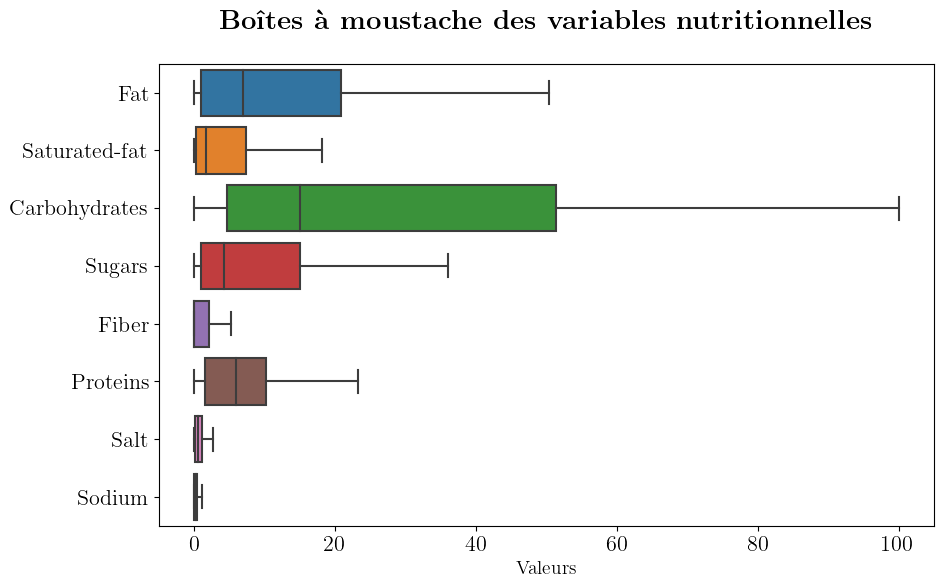

In [100]:
#On affiche les boxplots des features sauf energy

new_colonnes = data_global[features[1:-2]].columns.str.replace('_100g', '')
new_colonnes = new_colonnes.str.capitalize()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_global[features[1:-2]], orient = 'h', showfliers = False, palette = 'tab10')
plt.title(f"\\textbf{{Boîtes à moustache des variables nutritionnelles}}", fontsize=20, pad = 25)
plt.xlabel('Valeurs', fontsize=14)
plt.yticks(range(len(new_colonnes)), new_colonnes)
#plt.savefig(f"boxplot_features_global.pdf", bbox_inches='tight')
plt.show()

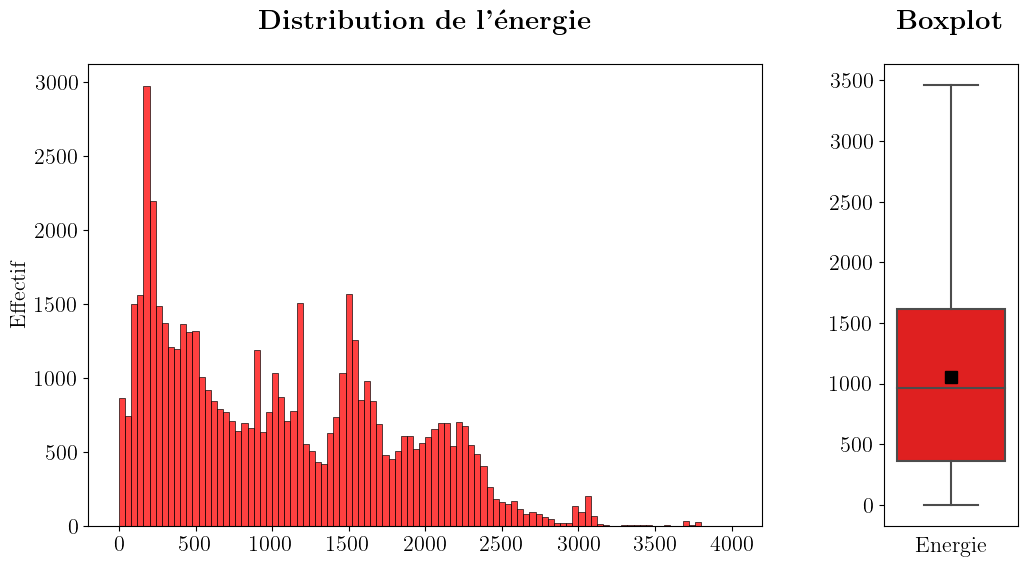

In [101]:
fig, (ax_hist, ax_box) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [5, 1]})

# Histogramme sur le sous-graphique de gauche
sns.histplot(data=data_global['energy_100g'], kde=False, color='red', bins=100, ax=ax_hist)
ax_hist.set_title(f"\\textbf{{Distribution de l'énergie}}", fontsize=20, pad=25)
ax_hist.set_ylabel('Effectif')
ax_hist.set_xlabel('')

# Boîte à moustaches sur le sous-graphique de droite
sns.boxplot(data=data_global['energy_100g'], showfliers = False, showmeans = True, 
            meanprops={'marker':'s', 'markerfacecolor':'black', 'markeredgecolor':'black', 'markersize':8},
            color='red', ax=ax_box)
ax_box.set_title(f"\\textbf{{Boxplot}}", fontsize=20, pad=25)
ax_box.set_ylabel('')
ax_box.set_xlabel('Energie')
ax_box.xaxis.set_label_coords(0.5, -0.025)
ax_box.set_xticks([])

# Ajuster l'espace entre les sous-graphiques
#plt.savefig("histplot_boxplot_distrib_energy_global.pdf", bbox_inches='tight')
plt.subplots_adjust(wspace=0.3)
plt.show()

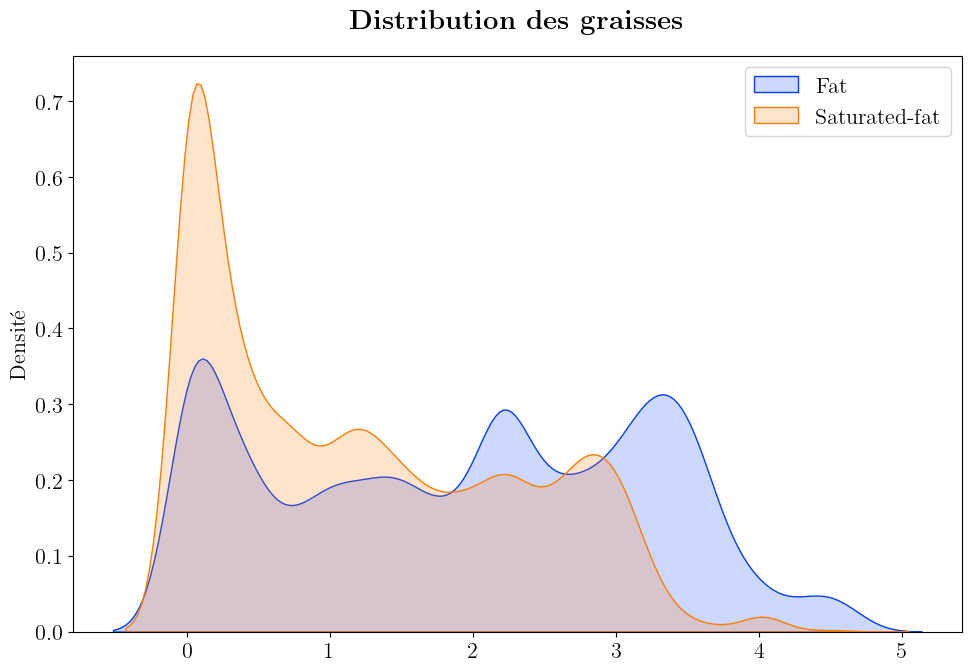

In [102]:
plt.figure(figsize = (10,7))
colors = sns.color_palette("bright", len(features[1:3]))
for idx, feature in enumerate(features[1:3]):
    label_feature = feature.replace('_100g', '').capitalize()
    
    data_log = (data_global[feature] + 1).apply(np.log)
    sns.kdeplot(data=data_log, color=colors[idx], fill = True, alpha = 0.2, bw_adjust = 1.2, label = label_feature)
    plt.xlabel('')
    plt.ylabel('Densité')
    plt.title(f"\\textbf{{Distribution des graisses}}", fontsize = 20, pad = 20)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.legend()
#plt.savefig(f"distrib_fat_sat-fat.pdf", bbox_inches='tight')
# Afficher le graphique
plt.show()

In [99]:
#On rassemble les deux datas

data_global = pd.concat([data_food, data_drink], ignore_index = True)

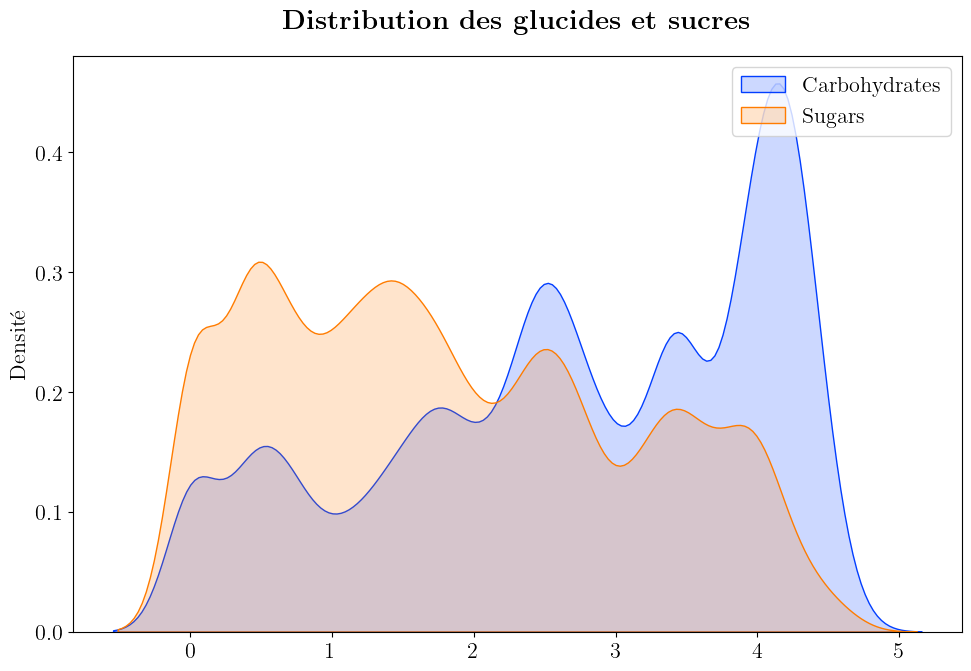

In [103]:
plt.figure(figsize = (10,7))
colors = sns.color_palette("bright", len(features[3:5]))
for idx, feature in enumerate(features[3:5]):
    label_feature = feature.replace('_100g', '').capitalize()
    
    data_log = (data_global[feature] + 1).apply(np.log)
    sns.kdeplot(data=data_log, color=colors[idx], fill = True, alpha = 0.2, bw_adjust = 1.2, label = label_feature)
    plt.xlabel('')
    plt.ylabel('Densité')
    plt.title(f"\\textbf{{Distribution des glucides et sucres}}", fontsize = 20, pad = 20)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.legend()
#plt.savefig(f"distrib_carbo_sugars.pdf", bbox_inches='tight')
# Afficher le graphique
plt.show()

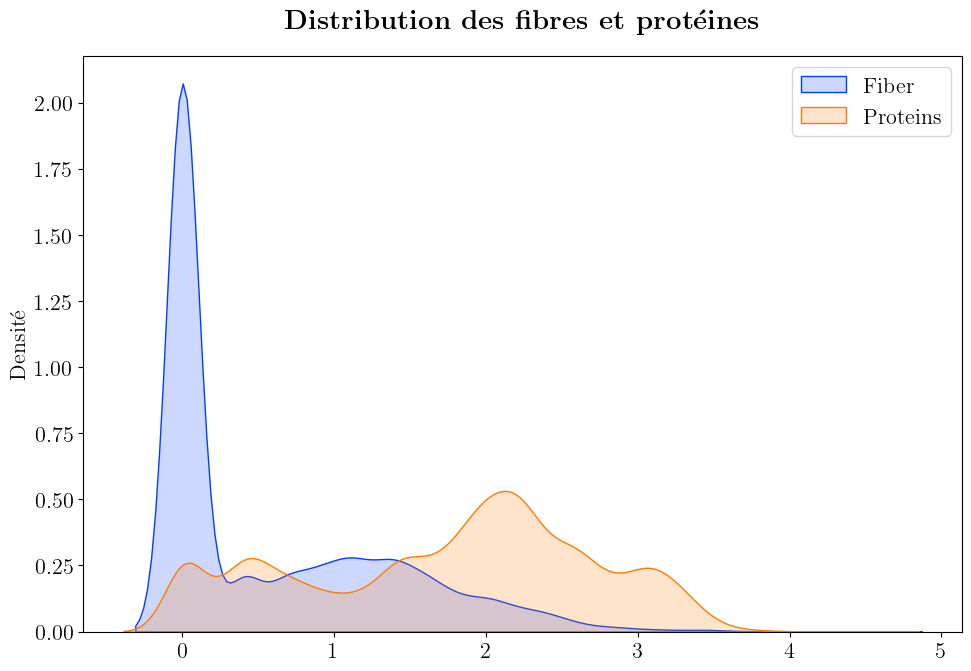

In [104]:
plt.figure(figsize = (10,7))
colors = sns.color_palette("bright", len(features[5:7]))
for idx, feature in enumerate(features[5:7]):
    label_feature = feature.replace('_100g', '').capitalize()
    
    data_log = (data_global[feature] + 1).apply(np.log)
    sns.kdeplot(data=data_log, color=colors[idx], fill = True, alpha = 0.2, bw_adjust = 1.2, label = label_feature)
    plt.xlabel('')
    plt.ylabel('Densité')
    plt.title(f"\\textbf{{Distribution des fibres et protéines}}", fontsize = 20, pad = 20)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.legend()
#plt.savefig(f"distrib_fiber_protein.pdf", bbox_inches='tight')
# Afficher le graphique
plt.show()

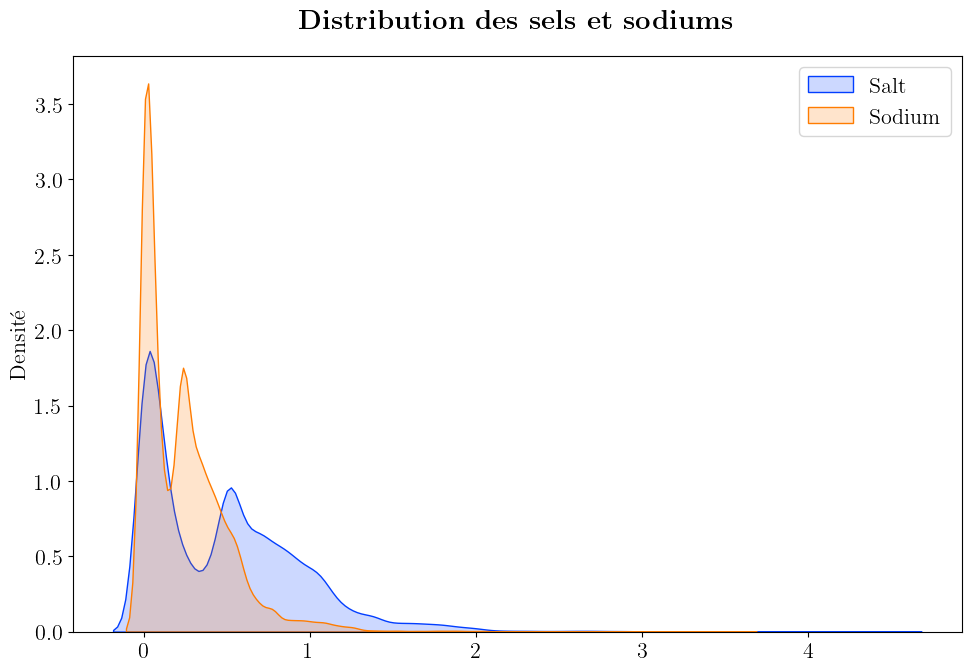

In [105]:
plt.figure(figsize = (10,7))
colors = sns.color_palette("bright", len(features[7:9]))
for idx, feature in enumerate(features[7:9]):
    label_feature = feature.replace('_100g', '').capitalize()
    
    data_log = (data_global[feature] + 1).apply(np.log)
    sns.kdeplot(data=data_log, color=colors[idx], fill = True, alpha = 0.2, bw_adjust = 1.2, label = label_feature)
    plt.xlabel('')
    plt.ylabel('Densité')
    plt.title(f"\\textbf{{Distribution des sels et sodiums}}", fontsize = 20, pad = 20)
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.legend()
#plt.savefig(f"distrib_salt_sodium.pdf", bbox_inches='tight')
# Afficher le graphique
plt.show()

### 4.2 Analyse multivariée
***

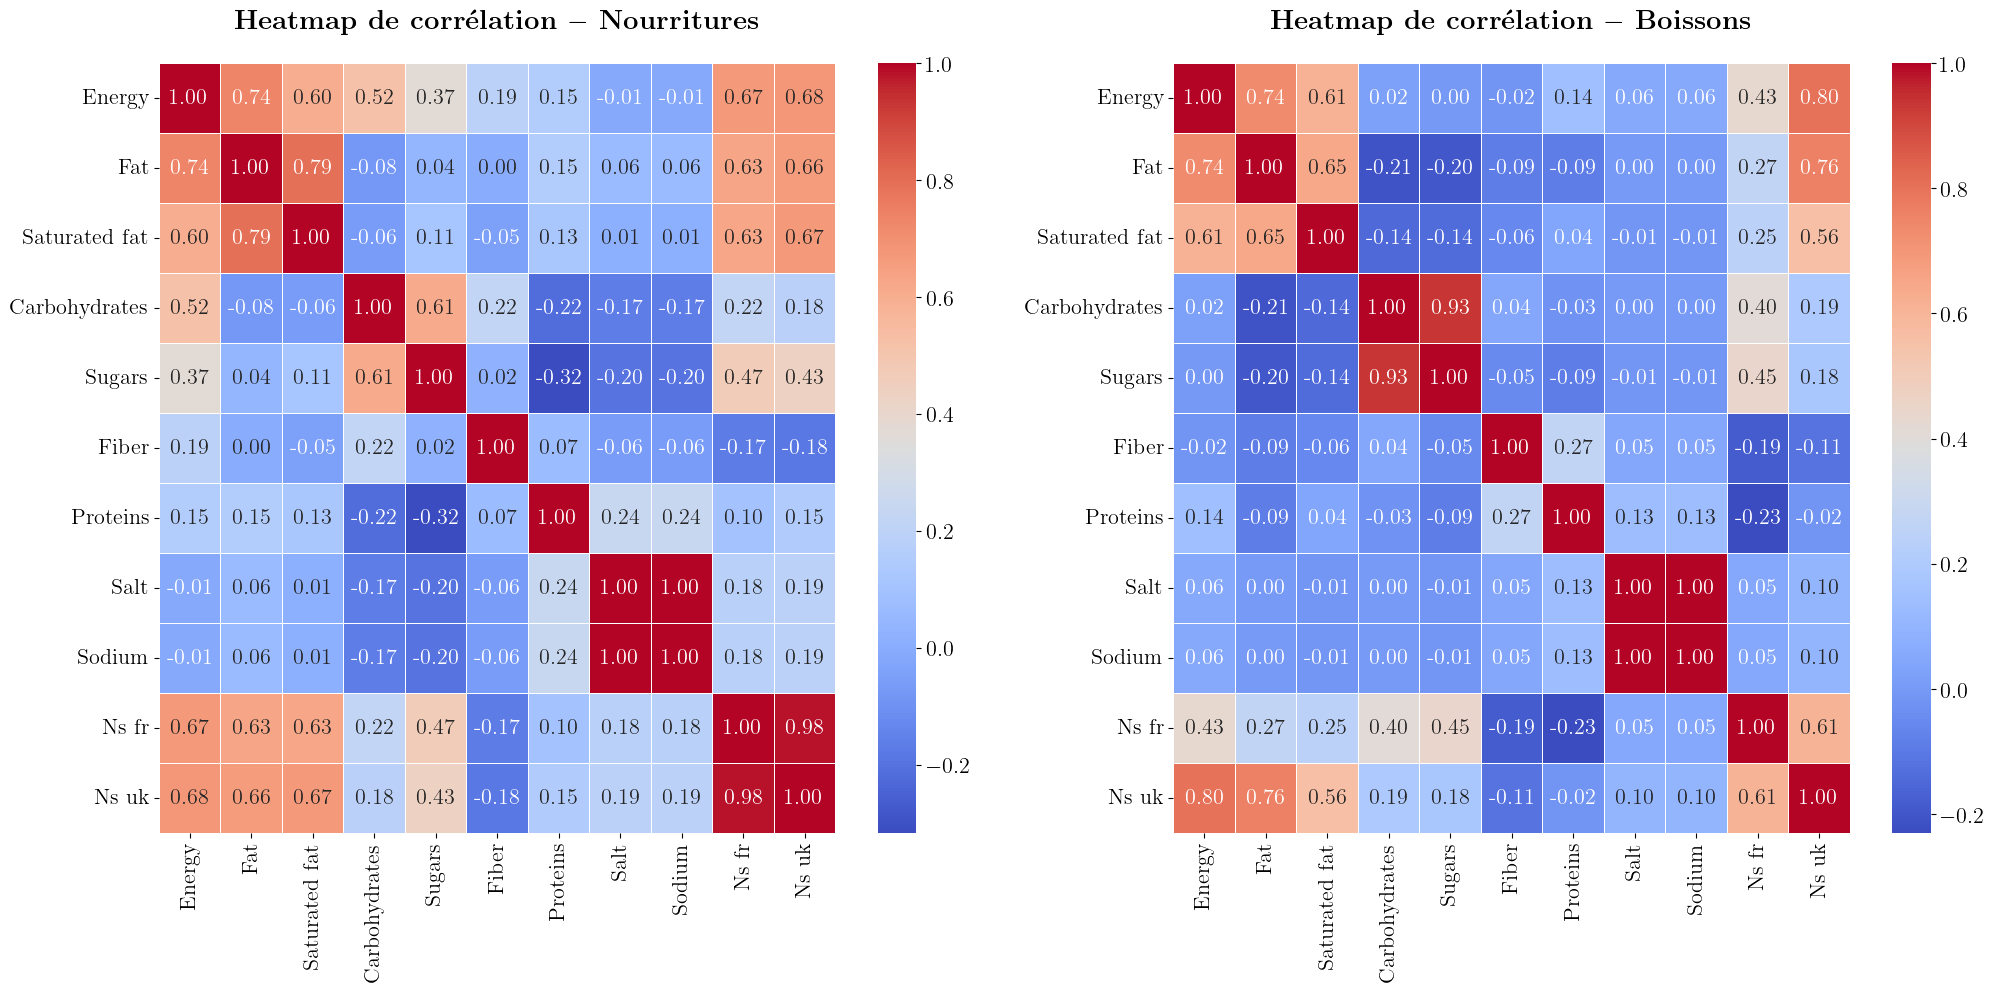

In [98]:
#Maintenant que les dataframes sont remplis, sans valeurs manquantes ni aberrantes, on peut s'intéresser de nouveaux aux corrélations.

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

fig, axes = plt.subplots(1,2, figsize = (24,10))

new_labels = features.str.replace('_100g', '')
new_labels = new_labels.str.replace('-', ' ')
new_labels = new_labels.str.capitalize()

heatmap_food = sns.heatmap(data_food[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax = axes[0])
heatmap_food.set_xticklabels(new_labels, size = 16)
heatmap_food.set_yticklabels(new_labels, size = 16)
heatmap_food.set_title(f"\\textbf{{Heatmap de corrélation $-$ Nourritures}}", pad = 25, size = 20)

heatmap_drink = sns.heatmap(data_drink[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, ax = axes[1])
heatmap_drink.set_xticklabels(new_labels, size = 16)
heatmap_drink.set_yticklabels(new_labels, size = 16)
heatmap_drink.set_title(f"\\textbf{{Heatmap de corrélation $-$ Boissons}}", pad = 25, size = 20)

#plt.savefig(f"heatmap_food_drink.pdf", bbox_inches='tight')
plt.show()

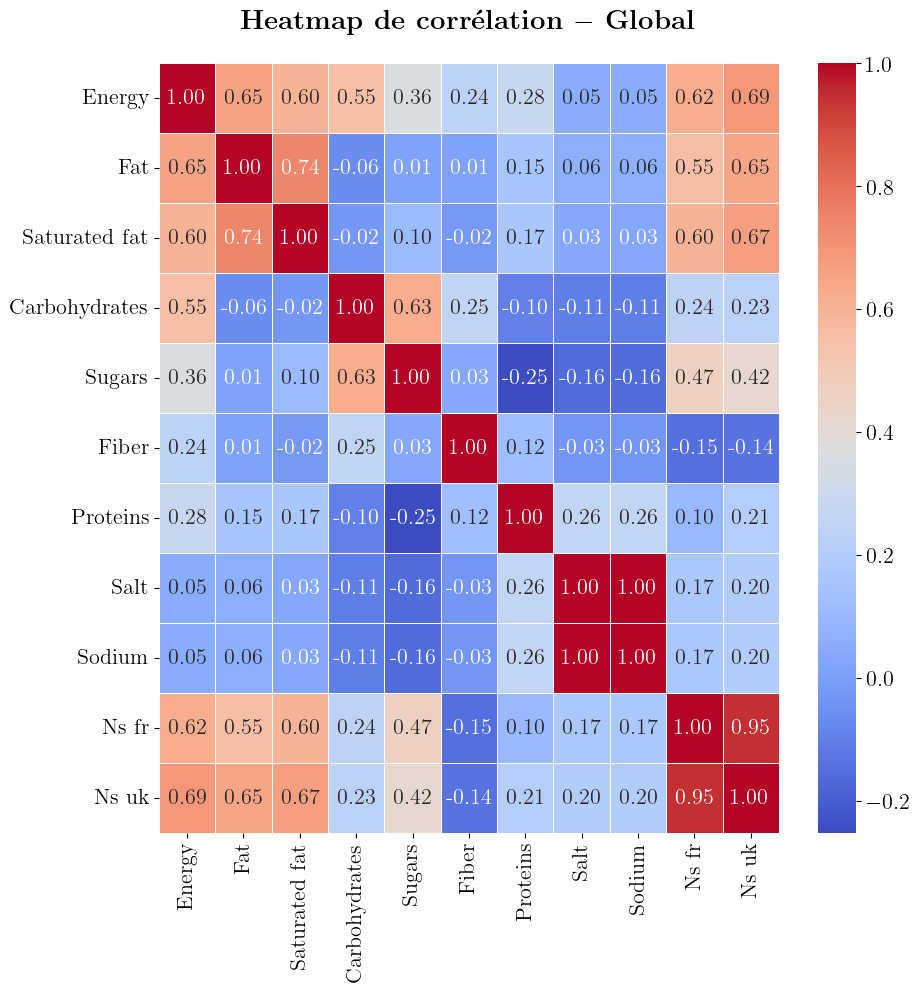

In [106]:
#On affiche la matrice de corrélation du data_global

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)
plt.figure(figsize=(10,10))

new_labels = features.str.replace('_100g', '')
new_labels = new_labels.str.replace('-', ' ')
new_labels = new_labels.str.capitalize()

heatmap_global = sns.heatmap(data_global[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
heatmap_global.set_xticklabels(new_labels, size = 16)
heatmap_global.set_yticklabels(new_labels, size = 16)
heatmap_global.set_title(f"\\textbf{{Heatmap de corrélation $-$ Global}}", pad = 25, size = 20)
cbar = heatmap_global.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
#plt.savefig(f"heatmap_global.pdf", bbox_inches='tight')
plt.show()

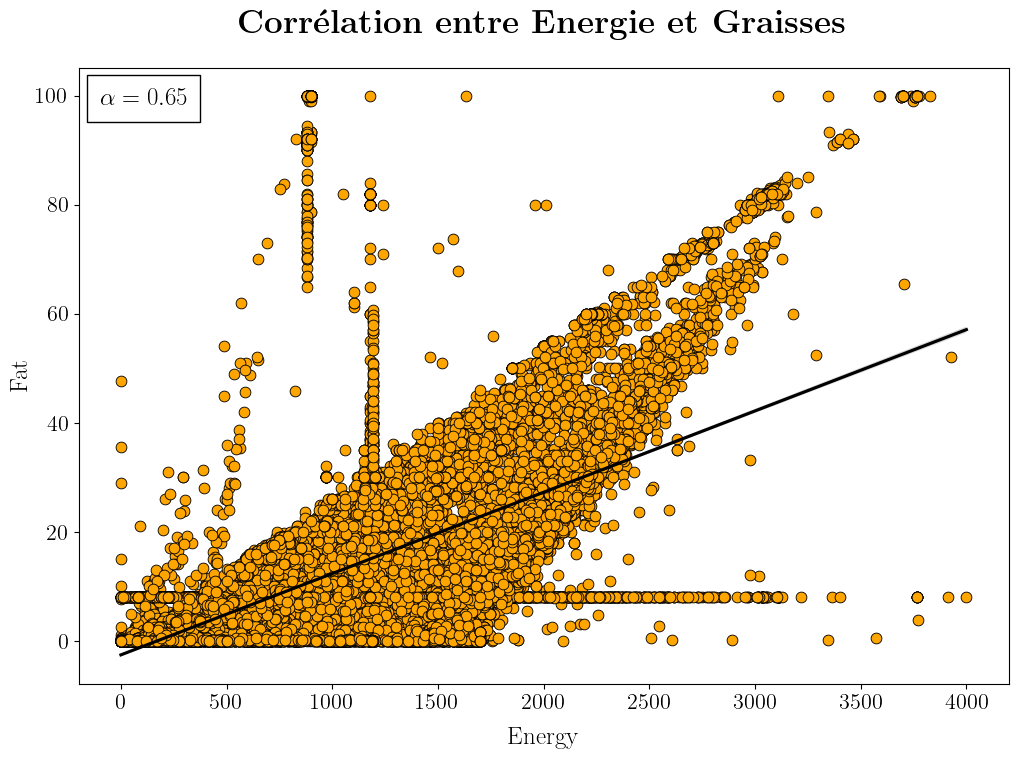

In [168]:
#Scatterplot des features 'energy_100g' et 'fat_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['energy_100g'], data_global['fat_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['energy_100g'], y = data_global['fat_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'energy_100g', y = 'fat_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Energy', fontsize = 18)
plt.ylabel('Fat', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Energie et Graisses}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_energy_fat_global.png", bbox_inches='tight')
plt.show()

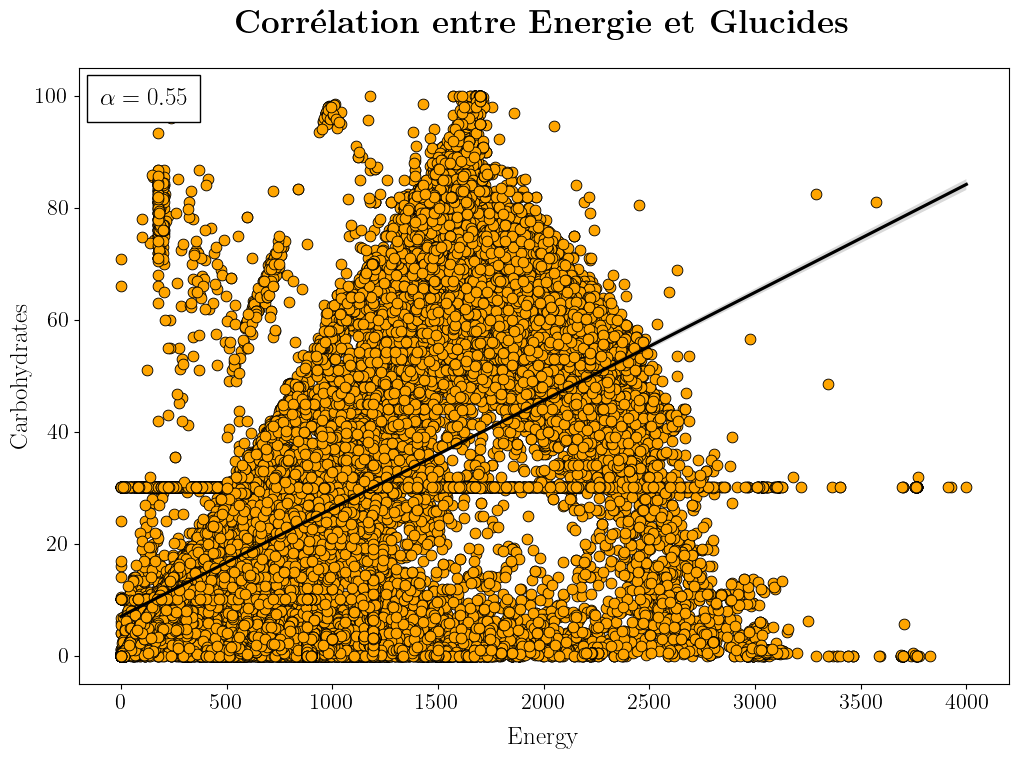

In [169]:
#Scatterplot des features 'energy_100g' et 'carbohydrates_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['energy_100g'], data_global['carbohydrates_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['energy_100g'], y = data_global['carbohydrates_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'energy_100g', y = 'carbohydrates_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Energy', fontsize = 18)
plt.ylabel('Carbohydrates', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Energie et Glucides}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_energy_carbohydrates_global.png", bbox_inches='tight')
plt.show()

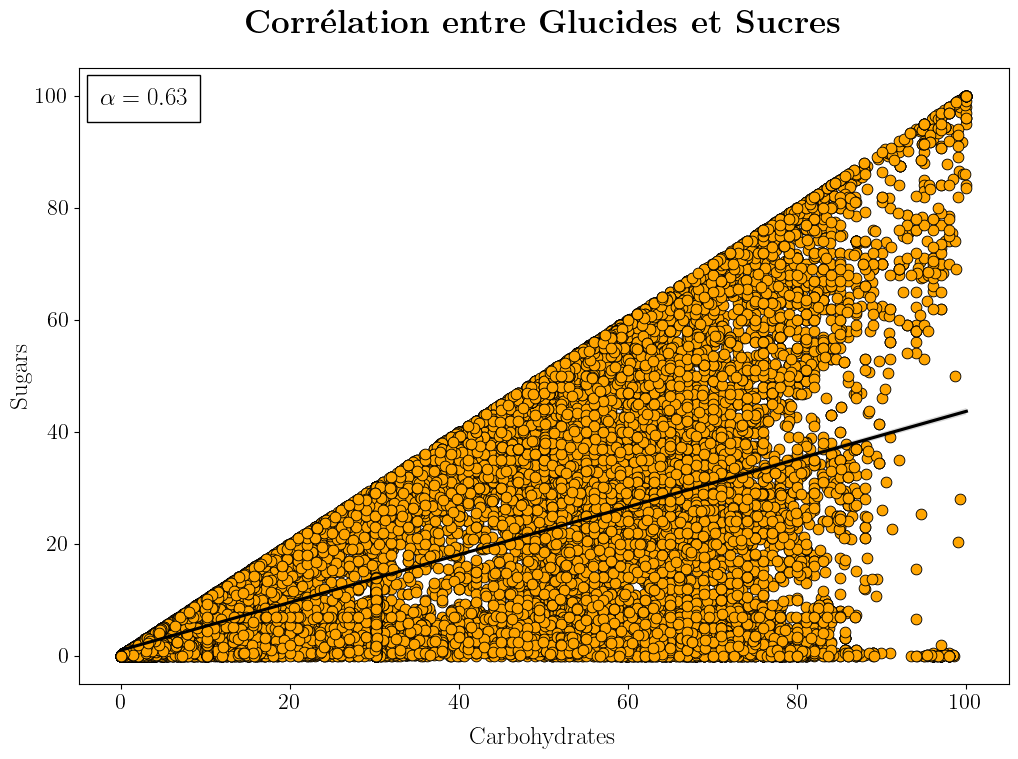

In [170]:
#Scatterplot des features 'carbohydrates_100g' et 'sugars_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['carbohydrates_100g'], data_global['sugars_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['carbohydrates_100g'], y = data_global['sugars_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'carbohydrates_100g', y = 'sugars_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Carbohydrates', fontsize = 18)
plt.ylabel('Sugars', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Glucides et Sucres}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_carbohydrates_sugars_global.png", bbox_inches='tight')
plt.show()

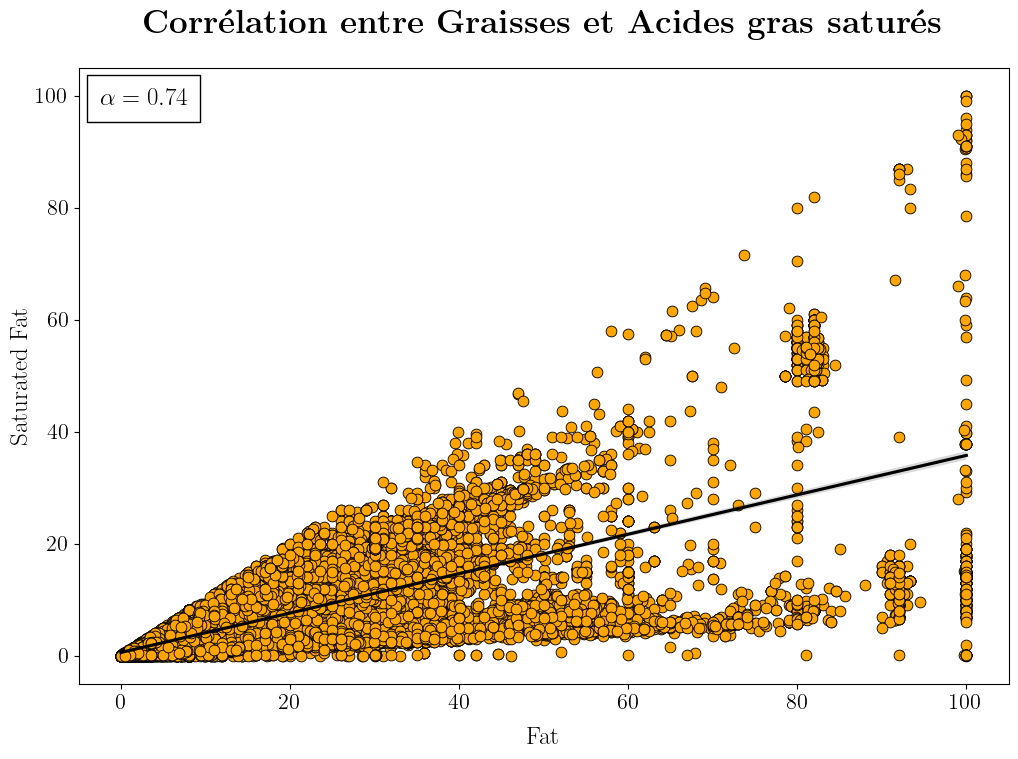

In [171]:
#Scatterplot des features 'fat_100g' et 'saturated-fat_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['fat_100g'], data_global['saturated-fat_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['fat_100g'], y = data_global['saturated-fat_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'fat_100g', y = 'saturated-fat_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Fat', fontsize = 18)
plt.ylabel('Saturated Fat', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Graisses et Acides gras saturés}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_fat_sat-fat.png", bbox_inches='tight')
plt.show()

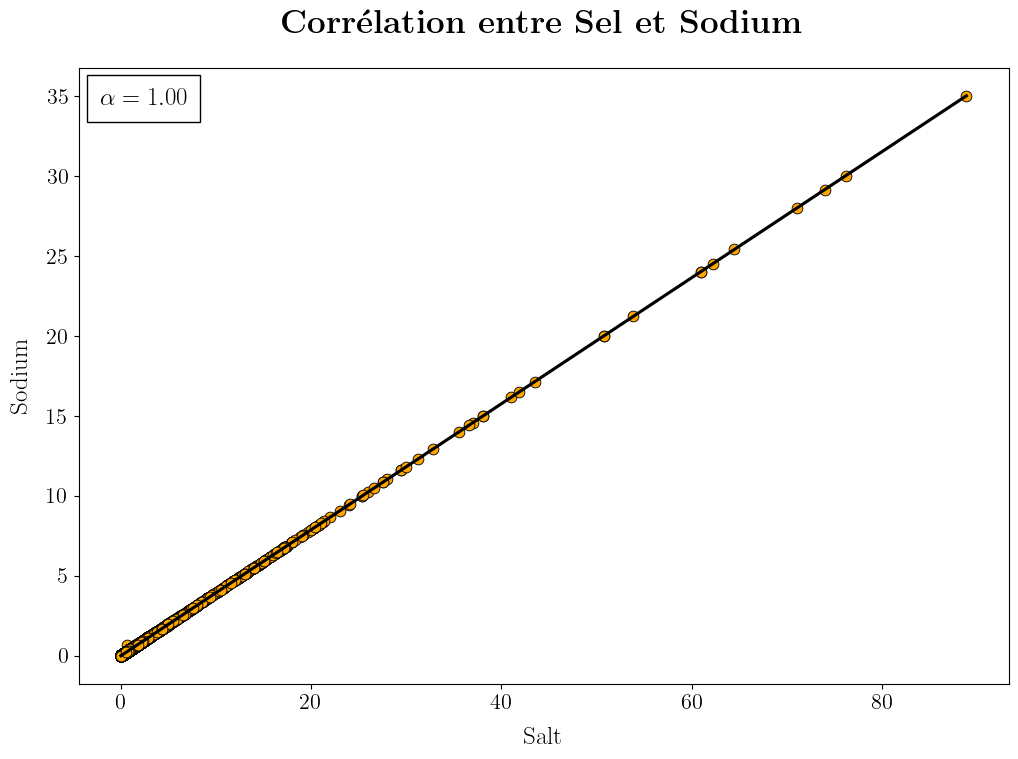

In [111]:
#Scatterplot des features 'salt_100g' et 'sodium_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['salt_100g'], data_global['sodium_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['salt_100g'], y = data_global['sodium_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'salt_100g', y = 'sodium_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Salt', fontsize = 18)
plt.ylabel('Sodium', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Sel et Sodium}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_salt_sodium_global.pdf", bbox_inches='tight')
plt.show()

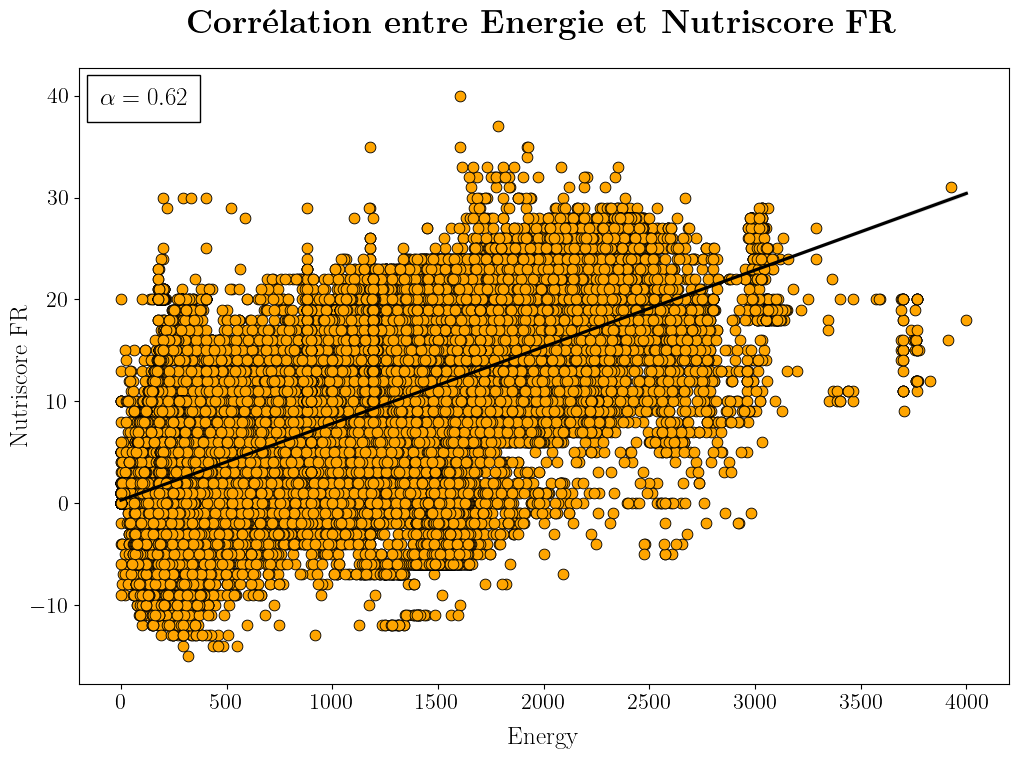

In [112]:
#Scatterplot des features 'energy_100g' et 'ns-fr_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['energy_100g'], data_global['ns-fr_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['energy_100g'], y = data_global['ns-fr_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'energy_100g', y = 'ns-fr_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Energy', fontsize = 18)
plt.ylabel('Nutriscore FR', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Energie et Nutriscore FR}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_energy_ns-fr_global.pdf", bbox_inches='tight')
plt.show()

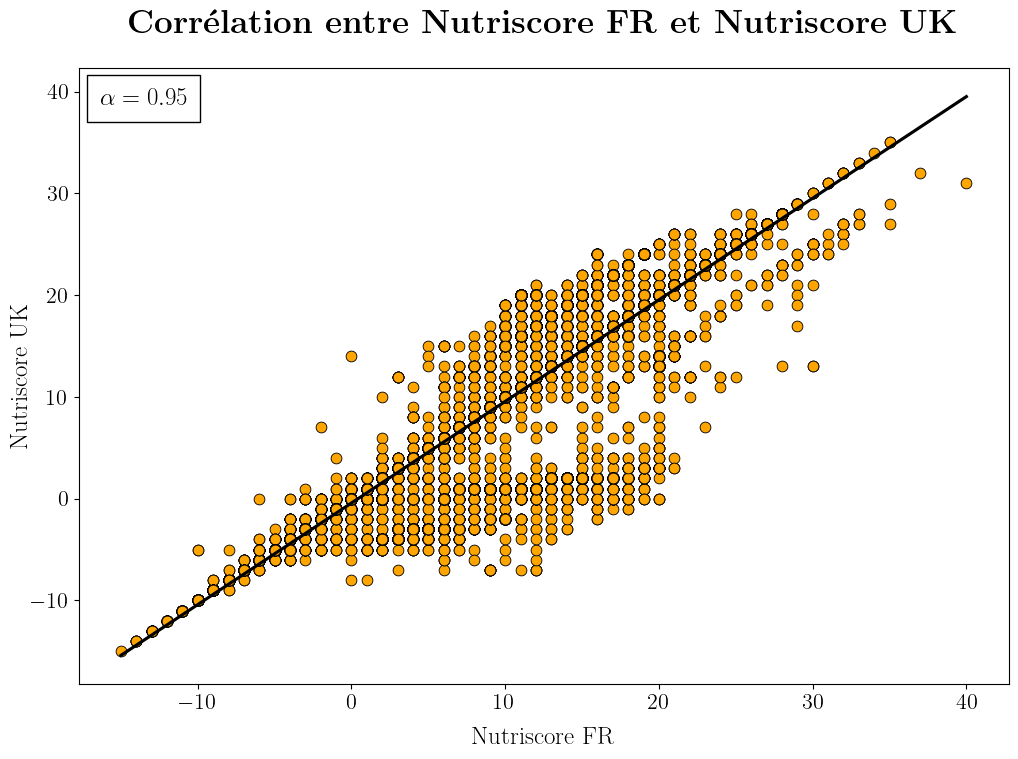

In [172]:
#Scatterplot des features 'energy_100g' et 'ns-uk_100g' pour data_food

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 16)

coef_corr = np.corrcoef(data_global['ns-fr_100g'], data_global['ns-uk_100g'])[0, 1]

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = data_global['ns-fr_100g'], y = data_global['ns-uk_100g'], color = 'orange', marker='o', edgecolor = 'black', s = 60)
sns.regplot(x = 'ns-fr_100g', y = 'ns-uk_100g', data = data_global, scatter = False, line_kws = {'color' : 'black'})
plt.xlabel('Nutriscore FR', fontsize = 18)
plt.ylabel('Nutriscore UK', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.xaxis.set_label_coords(0.5, -0.07)
ax.yaxis.set_label_coords(-0.05,0.5)
plt.title('$\\textbf{Corrélation entre Nutriscore FR et Nutriscore UK}$', fontsize = 24, pad = 25)
plt.text(0.07, 0.95, 
         f'$\\alpha ={coef_corr:.2f}$',
         horizontalalignment='center', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=18, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square, pad = 0.5')
        )
#plt.savefig(f"scatter_ns-fr_ns-uk_global.png", bbox_inches='tight')
plt.show()

In [127]:
from scipy.stats import kruskal

liste_kruskal = [i+1 for i in range(4)]

#On découpe notre variable 'ns-fr_100g' en 4 sous_groupes.
data_global['ns_group'] = pd.qcut(data_global['ns-fr_100g'], 4)

In [128]:
data_global['ns_group'].unique()

[(1.0, 8.0], (8.0, 15.0], (15.0, 40.0], (-15.001, 1.0]]
Categories (4, interval[float64, right]): [(-15.001, 1.0] < (1.0, 8.0] < (8.0, 15.0] < (15.0, 40.0]]

In [130]:
nouveaux_noms_ns = {'(-15.001, 1.0]' : 1,
                    '(1.0, 8.0]' : 2,
                    '(8.0, 15.0]' : 3,
                    '(15.0, 40.0]' : 4}

data_global['ns_group'] = data_global['ns_group'].astype(str)

#On remplace les valeurs de ns_groups par 1,2,3,4
data_global['ns_group'] = data_global['ns_group'].map(nouveaux_noms_ns)

In [132]:
data_global.head()

code                    product_name  quantity  energy_100g  \
0  0000000290616                    Salade Cesar  0.980 kg       1210.0   
1  0000000394710  Danoises à la cannelle roulées  1.150 kg       1520.0   
2  0000001938067    Chaussons tressés aux pommes  1.200 kg       1090.0   
3  0000008237798                 Quiche Lorraine  1 400 kg        478.0   
4  0000008240095                  Pâté au poulet   1250 kg        751.0   

   fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0     12.00            7.000000               23.00        0.000       2.000   
1     14.40            7.433333               54.10       28.100       2.050   
2     10.70            2.000000               38.70       24.700       2.000   
3      6.79            2.860000                7.86        0.714       0.357   
4     10.20            3.266667               16.60        0.000       0.000   

   proteins_100g  salt_100g  sodium_100g  ns-fr_100g  ns-uk_100g  ns_group  
0          22.00      2.160        0.850         6.0         6.0         2  
1           4.79      0.922        0.363        14.0        14.0         3  
2           3.33      0.647        0.255         9.0         9.0         3  
3           5.36      0.499        0.196         2.0         2.0         2  
4          33.90      0.735        0.289         9.0         8.0         3

In [133]:
# Créez un dictionnaire vide pour stocker les données de chaque groupe
data_global_ns_groups = {}

# Bouclez à travers les groupes et stockez les données dans le dictionnaire
for i in liste_kruskal:
    data_global_ns_groups[i] = data_global.loc[data_global['ns_group'] == i, 'ns-fr_100g']

# Maintenant, vous avez un dictionnaire où chaque clé est un groupe et la valeur est les données correspondantes

# Maintenant, vous pouvez passer les données de chaque groupe à la fonction kruskal()
kruskal_stat, p_value = kruskal(*data_global_ns_groups.values())

# Afficher les résultats
print("Kruskal Statistic:", kruskal_stat)
print("p-value:", p_value)

Kruskal Statistic: 52331.61131702664
p-value: 0.0


In [140]:
features

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'ns-fr_100g', 'ns-uk_100g'],
      dtype='object')

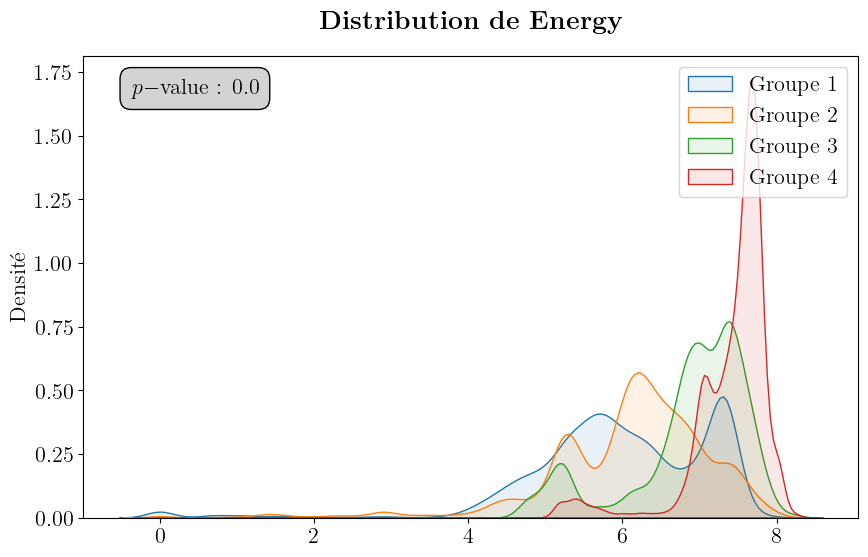

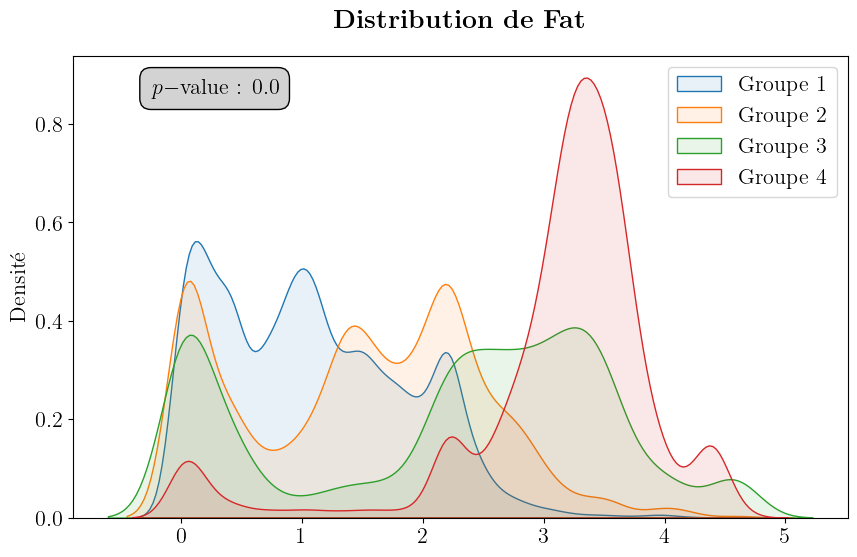

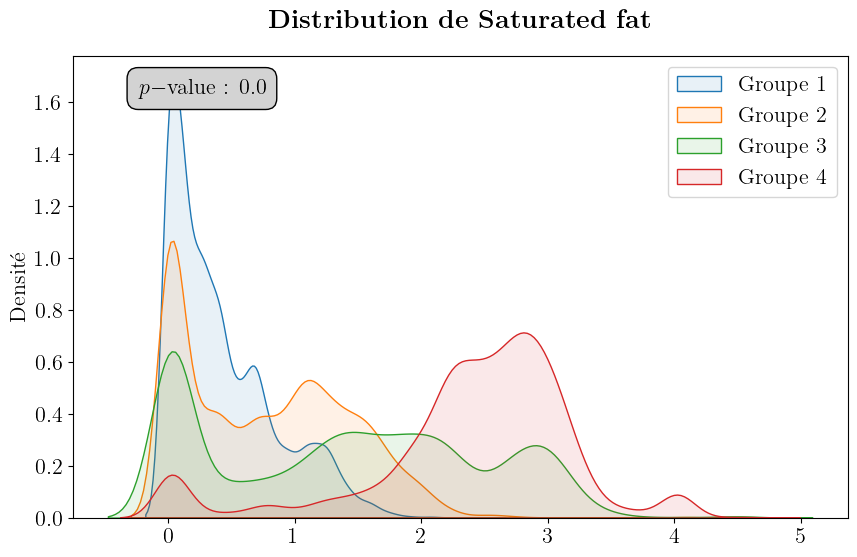

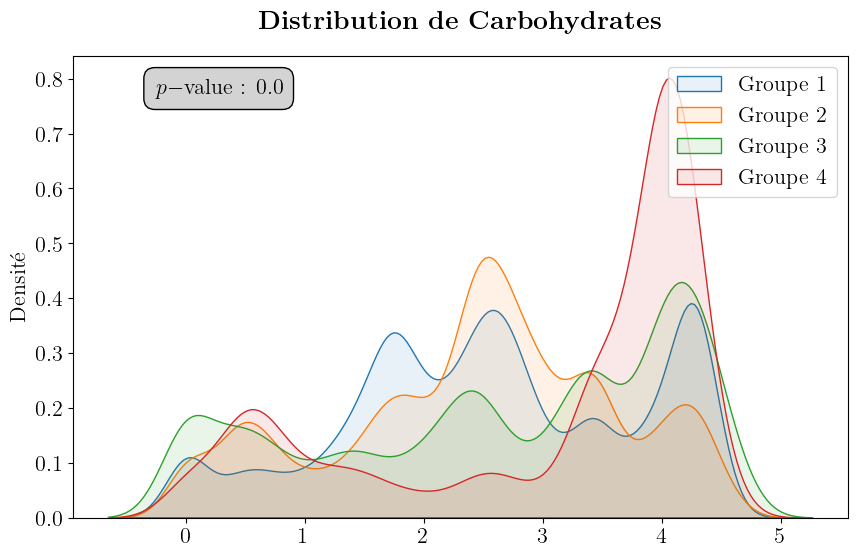

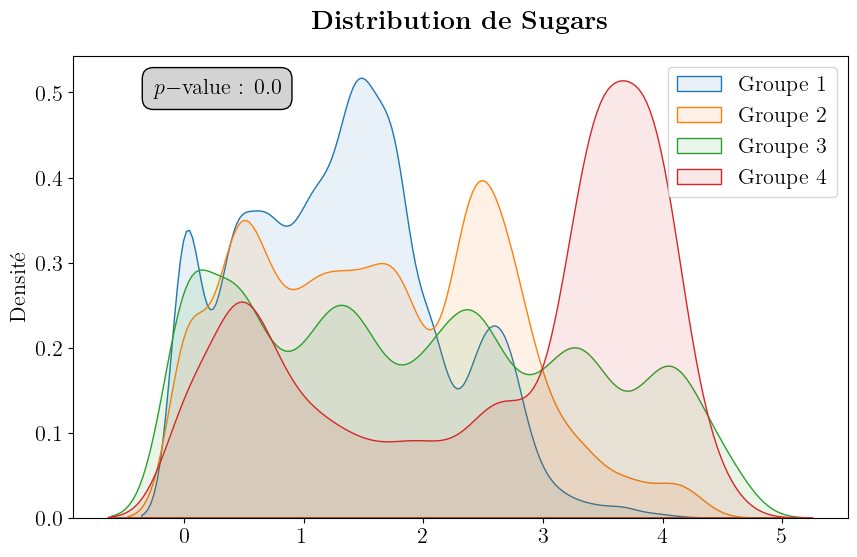

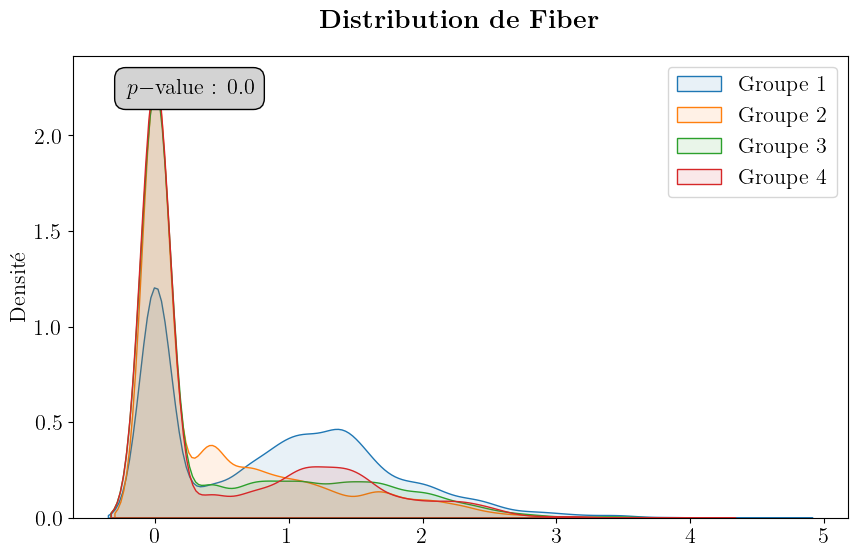

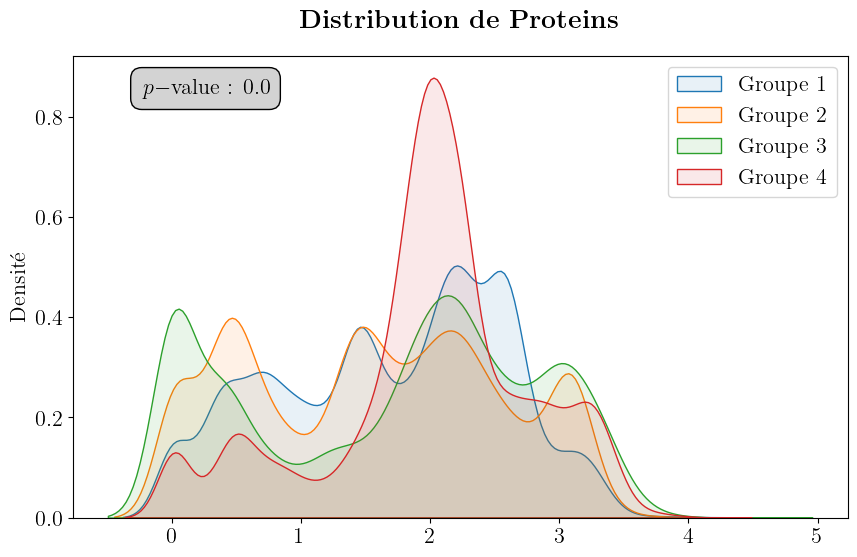

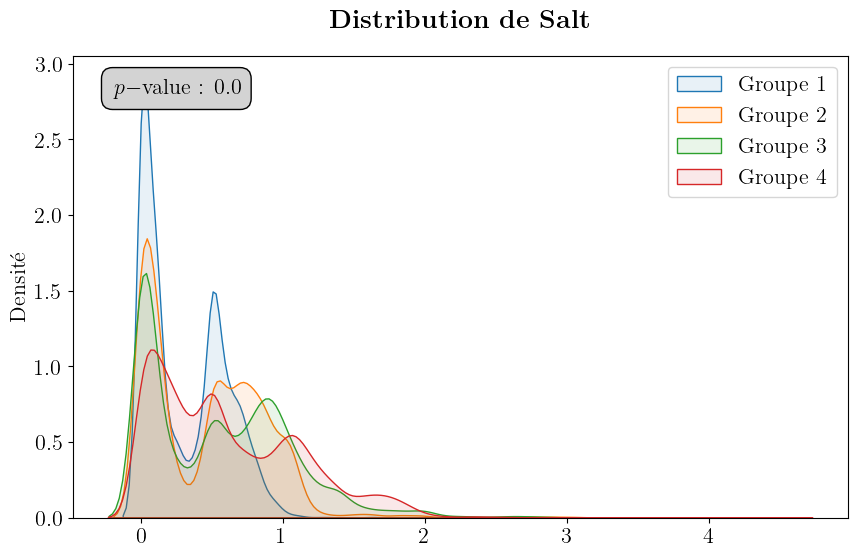

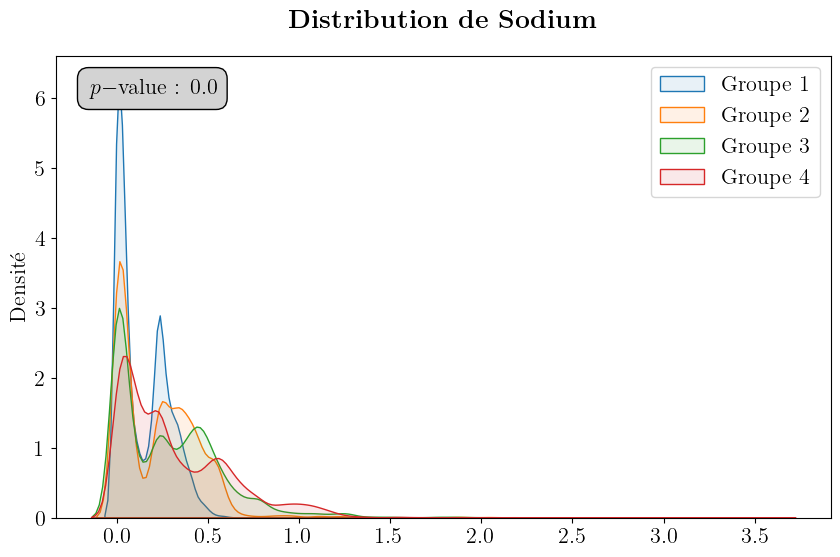

In [167]:
##On va effectuer des tests de kruskal-wallis

#Liste des features que l'on va analyser
features_analyse = features[0:9]
    
#On va boucler sur les features à analyser et analyser leur distribution en fonction du sous-groupe de 'energy_100g'
for feature in features_analyse:
    plt.figure(figsize = (10,6))
    feature_data = data_global[feature]
    
    groups_data = []
    for group in sorted(data_global['ns_group'].unique()):
        group_data = feature_data[data_global['ns_group'] == group]
        groups_data.append(group_data)
        
        title = feature.replace('_100g', '').replace('-', ' ').capitalize()
    
        group_data = (group_data + 1).apply(np.log)
        sns.kdeplot(data=group_data, fill = True, alpha = 0.1, bw_adjust = 1, label = f"Groupe {group}")
    
    #On effectue le test de Kruskal-Wallis
    kruskal_stat, p_value = kruskal(*groups_data)
    p_value = round(p_value, 2)
    
    plt.title(f"\\textbf{{Distribution de {title}}}", pad = 20)
    plt.xlabel('')
    plt.ylabel('Densité')
    
    plt.text(0.05 * plt.gca().get_xlim()[1],
             0.95 * plt.gca().get_ylim()[1],
             f"$p-$value : {p_value}",
             ha = 'center', va = 'top',
             fontsize = 16,
             bbox=dict(facecolor='lightgray', edgecolor='black', boxstyle='round,pad=0.5'))
    
    #plt.savefig(f"dist_{feature}_ns_groups.pdf", bbox_inches='tight')
    plt.legend()
    plt.show()

## 5. Analyse en composantes principales

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats as st
from sklearn.cluster import KMeans
import re
from matplotlib.patches import Patch

In [196]:
#Création d'une fonction qui affichera l'éboulis des valeurs propres
def eboulis(X):   
    #On instancie notre PCA
    n_components = len(features)
    pca = PCA(n_components=n_components)
    pca.fit(X)
    
    scree = (pca.explained_variance_ratio_*100).round(2)
    scree_cum = scree.cumsum().round()
    x_list = [i for i in range(1, n_components + 1)]
    
    #On crée le barplot de l'éboulis des valeurs propres
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif', size = 16)
    
    plt.figure(figsize=(12,6))
    
    #Barplot
    sns.barplot(x = x_list, y = scree, color = 'green', alpha = 0.7)
    
    #Courbe de tendance
    sns.lineplot(x = [x - 1 for x in x_list], y = scree_cum, color = 'red', marker = 'o')
    
    #Etiquettes
    plt.xlabel("Rang de l'axe d'inertie", size = 16)
    plt.ylabel("Pourcentage d'inertie", size = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)
    plt.title(f"\\textbf{{Eboulis des valeurs propres}}", pad = 20, size = 20)
    #plt.savefig(f"eboulis_vp.pdf", bbox_inches = 'tight')
    plt.show()

In [197]:
#Création d'une fonction qui affichera le dataframe des composants de l'ACP
def data_pcs(X,n_components):
    n_components = len(features)
    x_list = [i for i in range(1, n_components + 1)]
    
    pca = PCA(n_components=n_components)
    pca.fit(X)
    pcs = pca.components_
    pcs = pd.DataFrame(pcs)
    colonnes = features.str.replace('_100g', '')
    colonnes = colonnes.str.capitalize()
    pcs.columns = colonnes
    pcs.index = [f"F{i}" for i in x_list]
    pcs = pcs.T.round(2)
    
    display(pcs)

In [218]:
#Création d'une fonction qui affichera le cercle des corrélations
def correlation_graph(X, x, y, n_components):
    
    n_components = len(features)
    pca = PCA(n_components=n_components)
    pca.fit(X)
    
    #print('Variance expliquée : ', pca.explained_variance_ratio_)
    plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.size': 14
    })
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """
    
    #Creation d'une palette
    cmap = sns.color_palette('tab20', n_colors = n_components)

    # Extrait x et y
    x = int(x)
    y = int(y)
    a = x - 1
    b = y - 1

    # Taille de l'image (en inches)
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif', size = 16)
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Le cercle 
    circle = plt.Circle((0,0), 1, color = 'black', linewidth = 2, fill = False)  # Add a unit circle for scale
    plt.gca().add_artist(circle)
    
    #Les axes
    plt.plot([-1, 1], [0, 0], color='black', ls='--', linewidth = 1.5, alpha = 0.7, zorder = 5)
    plt.plot([0, 0], [-1, 1], color='black', ls='--', linewidth = 1.5, alpha = 0.7, zorder = 5)
    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        plt.arrow(0,0, 
                pca.components_[a, i],  
                pca.components_[b, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02,
                #color = sns.color_palette('tab20')[i],
                fc=cmap[i], 
                ec ='black',
                linewidth = 2,
                alpha = 1,
                zorder = 15,
                label = re.sub(r"_100g", "", re.sub(r"([A-Z])", r" \1",features[i])).capitalize()
                )

    #legend_elements = [Patch(facecolor=cmap[i], edgecolor='black', label=re.sub(r"([A-Z])", r" \1",features[i]).capitalize()) for i in range(len(features))]
    plt.legend(loc = 'lower center', bbox_to_anchor = (1.2, 0.25), title = "Légende", ncol = 1, fontsize = 16)
    # Affichage des lignes horizontales et verticales
    

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}\%)'.format(x, round(100*pca.explained_variance_ratio_[a],1)), size = 16)
    plt.ylabel('F{} ({}\%)'.format(y, round(100*pca.explained_variance_ratio_[b],1)), size = 16)
    plt.xticks(fontsize = 16)
    plt.yticks(fontsize = 16)

    # J'ai copié collé le code sans le lire
    plt.title(f"\\textbf{{Cercle des corrélations (F{x} et F{y})}}", pad = 20, size = 20)

    
    # Axes et display
    plt.axis('equal')
    #plt.savefig(f"correlation_circle.pdf", bbox_inches = 'tight')
    plt.show(block=False)

In [219]:
#Création de la fonction ACP finale

def acp(data, features):
    print("\n \033[1mBienvenue dans l'ACP !\033[0m \n")
    print(' *'*12)
    print('\n')
    #On sélectionne les valeurs de notre data
    X = data[features].values
    
    #On définit notre scaler et notre PCA
    n_components = len(features)
    scaler = StandardScaler()
    pca = PCA(n_components=n_components)
    
    #On fit notre X
    X_scaled = scaler.fit_transform(X)
    
    print(f"\033[1m1 -\033[0m Eboulis des valeurs propres \n")
    eb = input(f"Voulez-vous l'afficher ? (y/n)")
    if eb == 'y':
        print('\n')
        eboulis(X_scaled)
        print('_'*111)
    else:
        print('\n')
        
    print('\n')
    
    
    print(f"\n\033[1m2 -\033[0m Dataframe PCS \n")
    pcs = input(f"Voulez-vous l'afficher ? (y/n)")
    if pcs == 'y':
        print('\n')
        data_pcs(X_scaled, n_components)
        print('_'*111)
    else:
        print('\n')
        
    print('\n')
    
          
    print(f"\n\033[1m3 -\033[0m Cercle des corrélations \n")
    corrcircle = input(f"Voulez-vous afficher le cercle des corrélations ? (y/n)")
    if corrcircle == 'y':
        print('\n')
        x = input(f"Veuillez entrer le numéro de la première composante : ")
        y = input(f"Veuillez entrer le numéro de la deuxième composante : ")
        print('\n')
        correlation_graph(X_scaled, x, y, n_components)


 Bienvenue dans l'ACP ! 

 * * * * * * * * * * * *


1 - Eboulis des valeurs propres 



Voulez-vous l'afficher ? (y/n) y


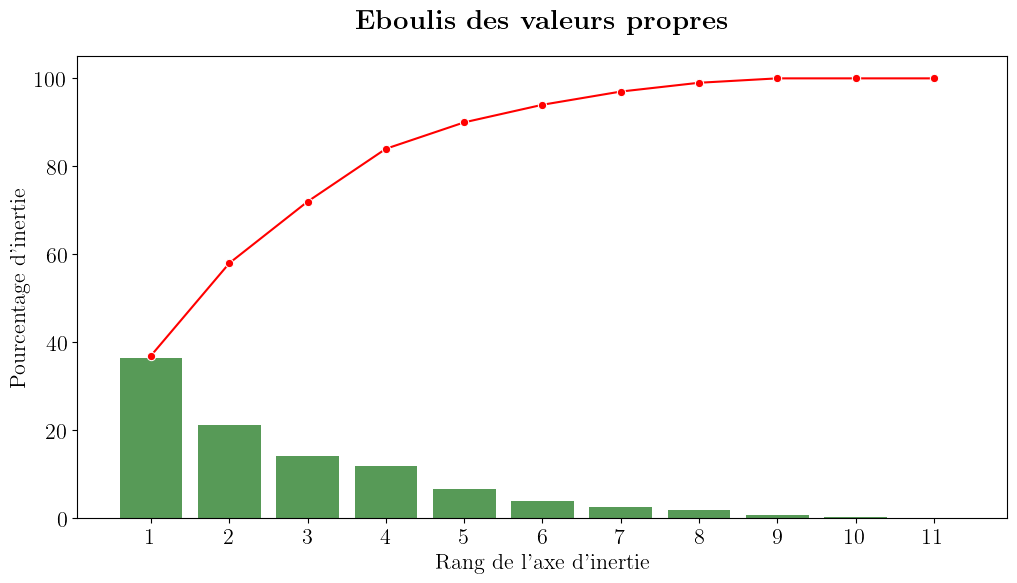

_______________________________________________________________________________________________________________



2 - Dataframe PCS 



Voulez-vous l'afficher ? (y/n) y


F1    F2    F3    F4    F5    F6    F7    F8    F9   F10  \
Energy         0.43 -0.11  0.09  0.28 -0.03 -0.40 -0.09  0.02  0.74 -0.04   
Fat            0.38  0.07 -0.36  0.13  0.31 -0.23 -0.31  0.55 -0.38  0.14   
Saturated-fat  0.38  0.04 -0.34  0.07  0.20  0.01  0.79 -0.23 -0.08  0.04   
Carbohydrates  0.17 -0.36  0.52  0.09 -0.11 -0.49  0.06 -0.23 -0.50  0.06   
Sugars         0.22 -0.38  0.37 -0.27 -0.05  0.37  0.29  0.61  0.09  0.03   
Fiber          0.01 -0.09  0.26  0.70  0.42  0.48 -0.10 -0.11 -0.05 -0.03   
Proteins       0.12  0.30 -0.02  0.46 -0.77  0.13  0.10  0.18 -0.14  0.09   
Salt           0.10  0.55  0.37 -0.11  0.17 -0.05  0.07  0.05  0.01  0.01   
Sodium         0.10  0.55  0.37 -0.11  0.17 -0.05  0.07  0.05  0.01  0.01   
Ns-fr          0.44 -0.01 -0.00 -0.26 -0.09  0.33 -0.31 -0.37  0.02  0.62   
Ns-uk          0.47  0.02 -0.03 -0.17 -0.12  0.22 -0.23 -0.19 -0.15 -0.76   

                F11  
Energy        -0.00  
Fat           -0.00  
Saturated-fat  0.00  
Carbohydrates  0.00  
Sugars        -0.00  
Fiber          0.00  
Proteins       0.00  
Salt          -0.71  
Sodium         0.71  
Ns-fr          0.00  
Ns-uk         -0.00

_______________________________________________________________________________________________________________



3 - Cercle des corrélations 



Voulez-vous afficher le cercle des corrélations ? (y/n) y


Veuillez entrer le numéro de la première composante :  1
Veuillez entrer le numéro de la deuxième composante :  2


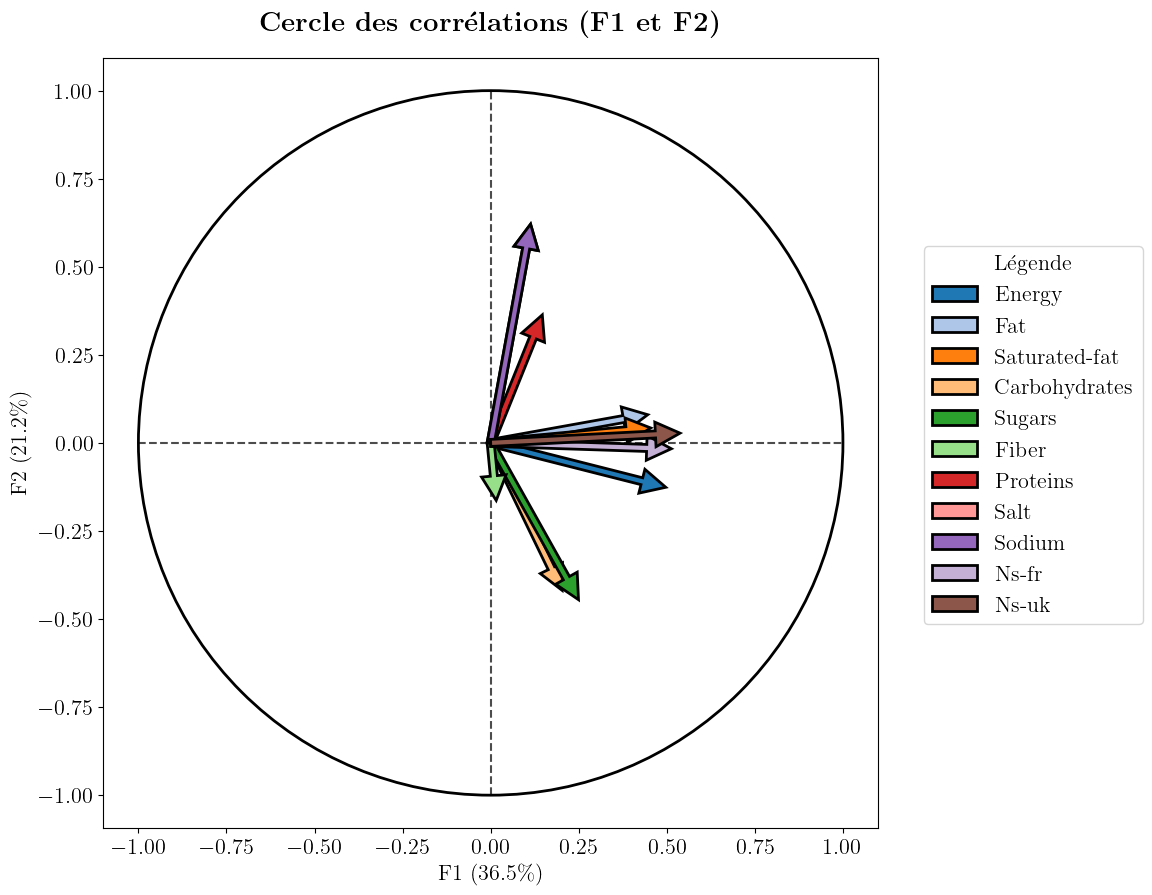

In [220]:
#C'est parti pour l'ACP sur data_global

acp(data_global, features)


 Bienvenue dans l'ACP ! 

 * * * * * * * * * * * *


1 - Eboulis des valeurs propres 



Voulez-vous l'afficher ? (y/n) y


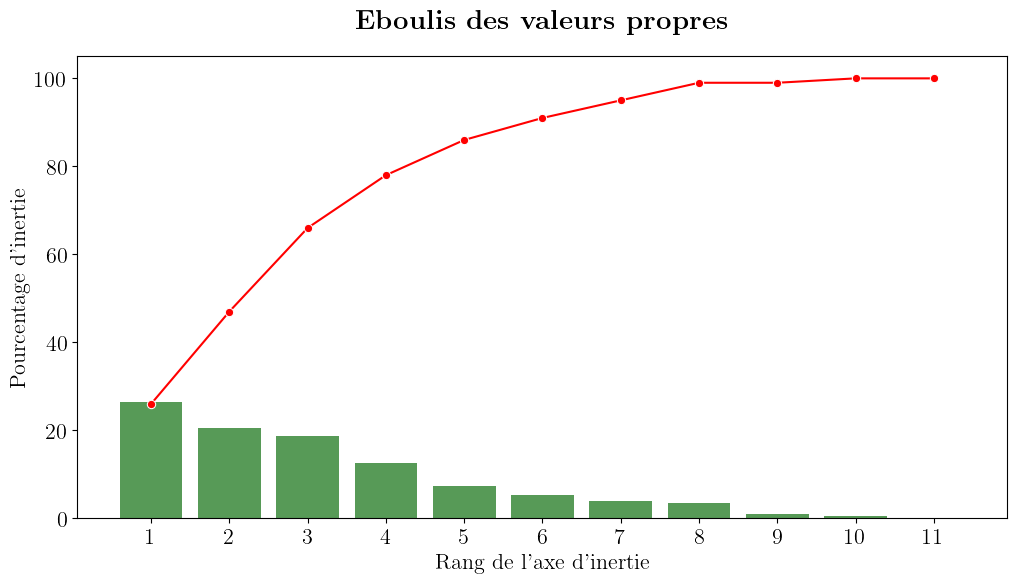

_______________________________________________________________________________________________________________



2 - Dataframe PCS 



Voulez-vous l'afficher ? (y/n) y


F1    F2    F3    F4    F5    F6    F7    F8    F9   F10  \
Energy         0.31  0.09  0.09  0.43 -0.45 -0.64  0.22 -0.17 -0.11 -0.00   
Fat            0.40 -0.39 -0.10 -0.03  0.20  0.16 -0.10 -0.47 -0.62  0.06   
Saturated-fat  0.36 -0.34 -0.07  0.12  0.04  0.24  0.63  0.52  0.04  0.00   
Carbohydrates  0.22  0.58 -0.01  0.07  0.11  0.24  0.18 -0.13  0.01  0.70   
Sugars         0.22  0.58 -0.03 -0.01  0.07  0.24  0.17 -0.08 -0.17 -0.69   
Fiber         -0.10  0.02  0.16  0.53  0.78 -0.25 -0.03  0.07  0.01 -0.06   
Proteins      -0.04 -0.04  0.25  0.63 -0.33  0.52 -0.37  0.13 -0.08 -0.01   
Salt           0.09 -0.02  0.66 -0.21  0.02 -0.00  0.06 -0.00 -0.02  0.00   
Sodium         0.09 -0.02  0.66 -0.21  0.02 -0.00  0.06 -0.00 -0.02  0.00   
Ns-fr          0.45  0.16 -0.07 -0.17  0.05 -0.23 -0.54  0.59 -0.20  0.06   
Ns-uk          0.54 -0.14 -0.02  0.03  0.08  0.07 -0.23 -0.30  0.73 -0.11   

                F11  
Energy        -0.00  
Fat           -0.00  
Saturated-fat -0.00  
Carbohydrates -0.00  
Sugars         0.00  
Fiber          0.00  
Proteins      -0.00  
Salt          -0.71  
Sodium         0.71  
Ns-fr          0.00  
Ns-uk          0.00

_______________________________________________________________________________________________________________



3 - Cercle des corrélations 



Voulez-vous afficher le cercle des corrélations ? (y/n) y


Veuillez entrer le numéro de la première composante :  1
Veuillez entrer le numéro de la deuxième composante :  2


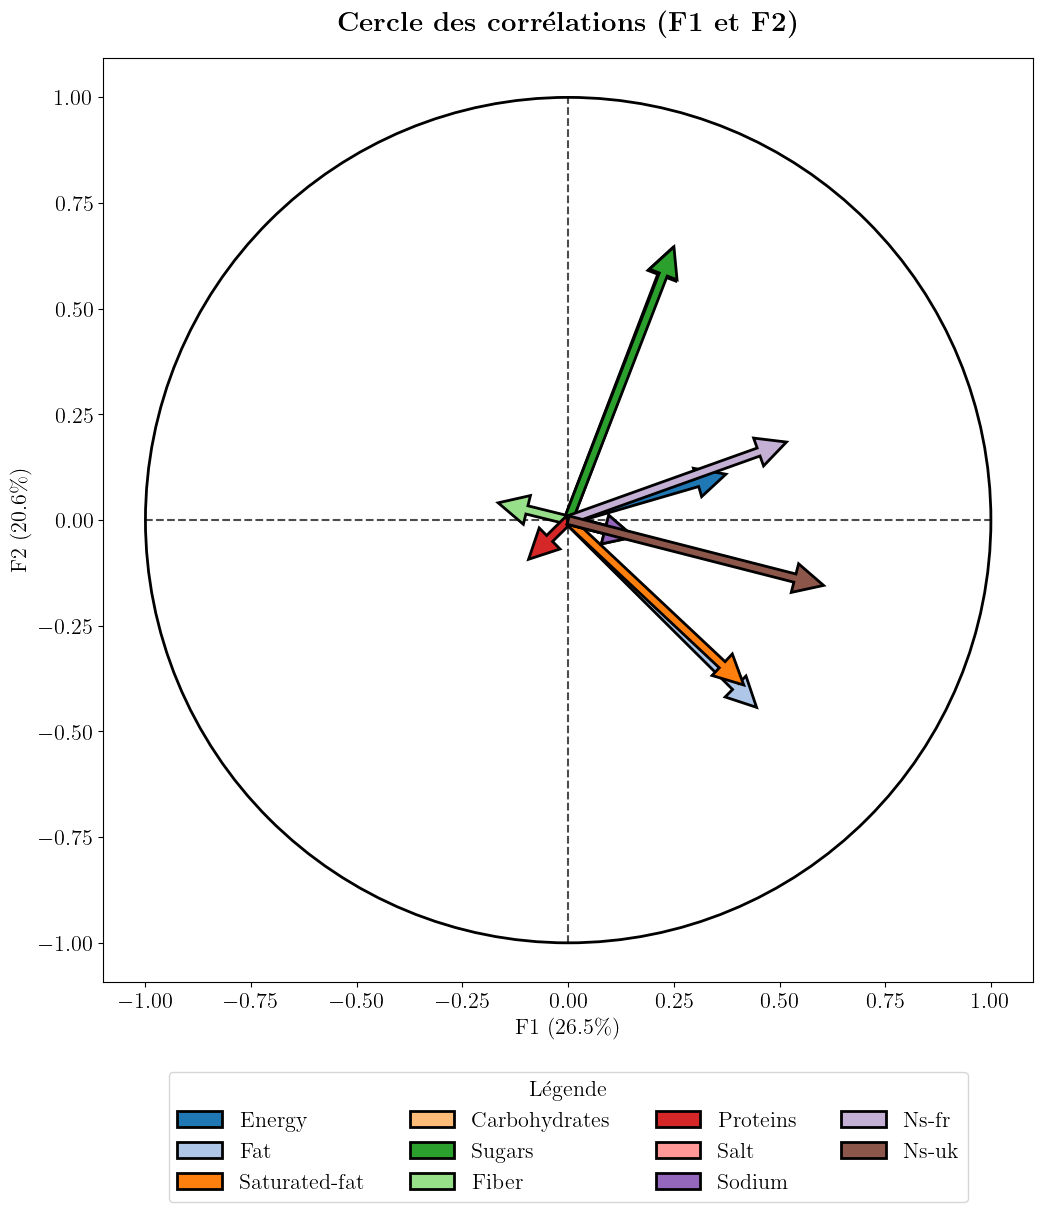

In [97]:
#Et encore, pour data_drink

acp(data_drink, features)


 Bienvenue dans l'ACP ! 

 * * * * * * * * * * * *


1 - Eboulis des valeurs propres 



Voulez-vous l'afficher ? (y/n) y


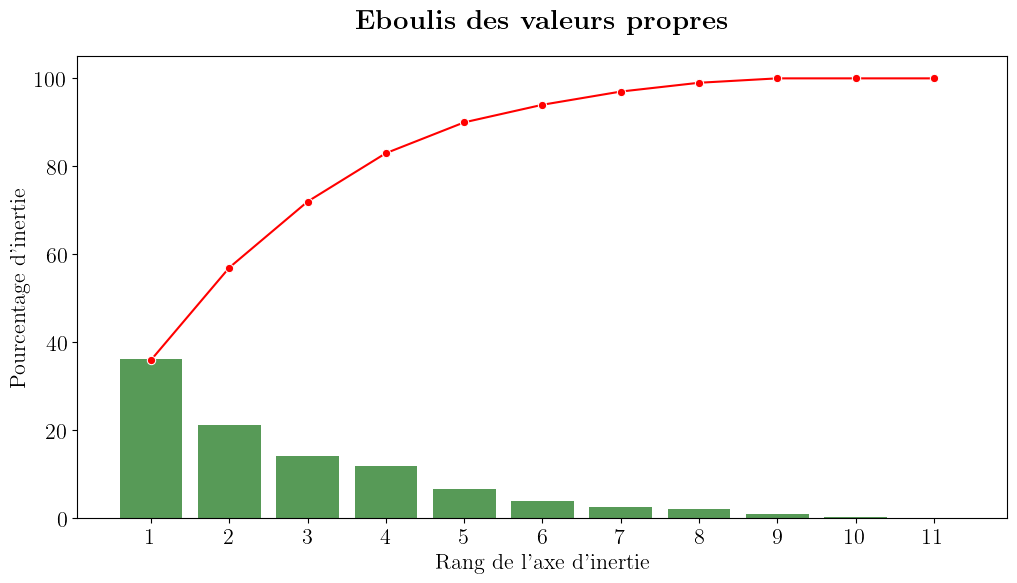

_______________________________________________________________________________________________________________



2 - Dataframe PCS 



Voulez-vous l'afficher ? (y/n) y


F1    F2    F3    F4    F5    F6    F7    F8    F9   F10  \
Energy         0.42 -0.11  0.12  0.28 -0.05 -0.40 -0.05 -0.03 -0.74 -0.02   
Fat            0.37  0.07 -0.35  0.14  0.31 -0.22 -0.35  0.58  0.30  0.12   
Saturated-fat  0.39  0.04 -0.34  0.09  0.20 -0.03  0.79 -0.21  0.15  0.05   
Carbohydrates  0.17 -0.36  0.53  0.06 -0.10 -0.48  0.01 -0.18  0.54  0.05   
Sugars         0.22 -0.38  0.35 -0.29 -0.05  0.38  0.30  0.59 -0.11  0.03   
Fiber          0.01 -0.09  0.29  0.68  0.45  0.47 -0.09 -0.11  0.05 -0.03   
Proteins       0.12  0.30 -0.00  0.47 -0.76  0.16  0.08  0.19  0.16  0.09   
Salt           0.10  0.55  0.36 -0.13  0.16 -0.05  0.07  0.06 -0.00  0.01   
Sodium         0.10  0.55  0.36 -0.13  0.16 -0.05  0.07  0.06 -0.00  0.01   
Ns-fr          0.45 -0.01 -0.02 -0.25 -0.08  0.33 -0.31 -0.38  0.00  0.62   
Ns-uk          0.47  0.03 -0.05 -0.17 -0.11  0.23 -0.22 -0.19  0.12 -0.76   

                F11  
Energy        -0.00  
Fat           -0.00  
Saturated-fat  0.00  
Carbohydrates  0.00  
Sugars        -0.00  
Fiber          0.00  
Proteins       0.00  
Salt          -0.71  
Sodium         0.71  
Ns-fr          0.00  
Ns-uk         -0.00

_______________________________________________________________________________________________________________



3 - Cercle des corrélations 



Voulez-vous afficher le cercle des corrélations ? (y/n) y


Veuillez entrer le numéro de la première composante :  1
Veuillez entrer le numéro de la deuxième composante :  2


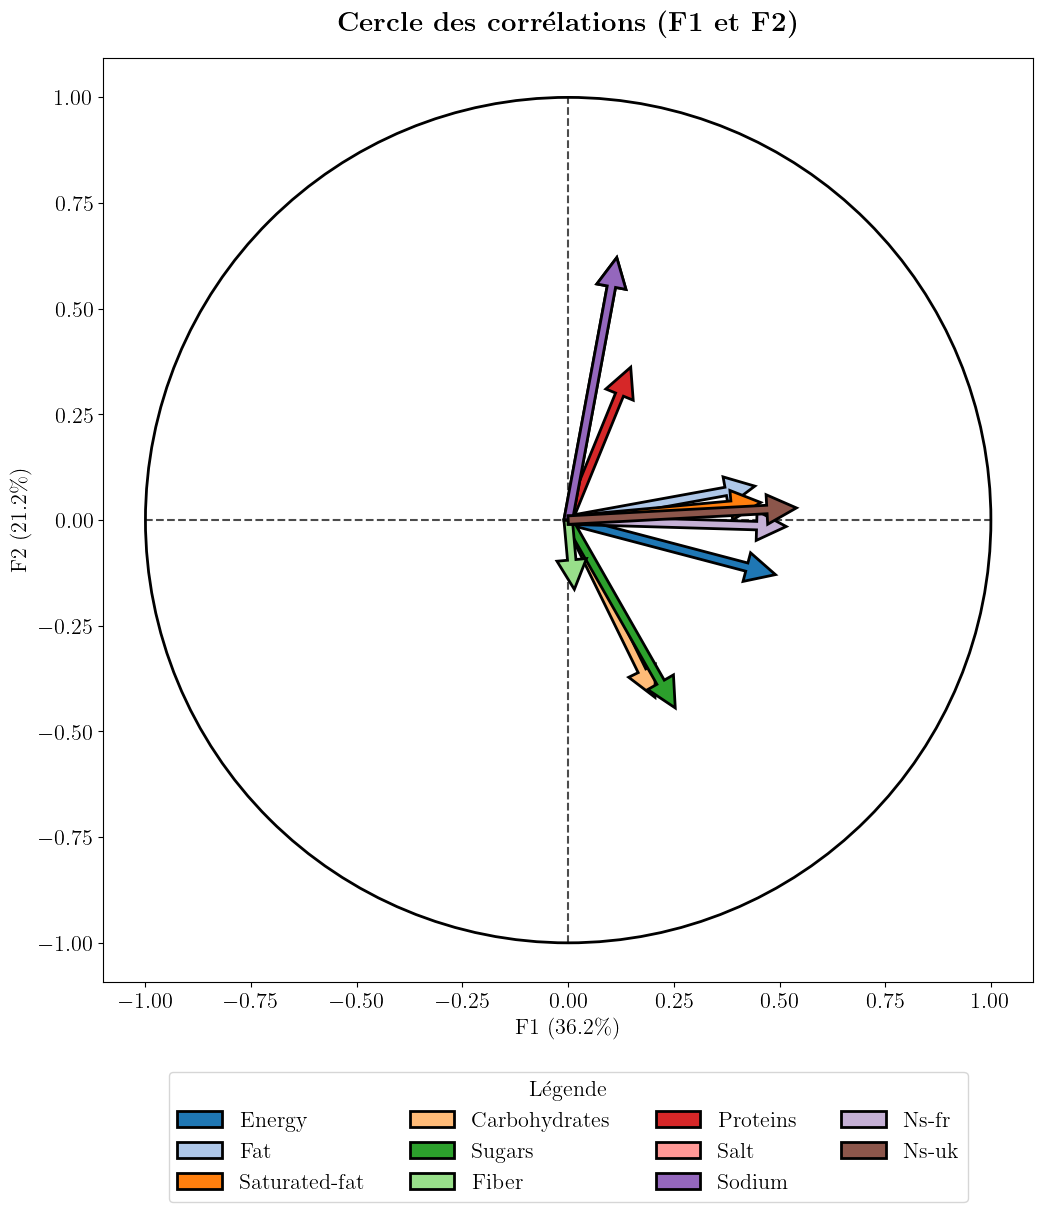

In [97]:
#On réalise une ACP sur le data_global

acp(data_global, features)